In [1]:
ENV["JULIA_REVISE_POLL"]=1

1

In [ ]:
# include("run_CT_MPS_XEB.jl")

In [2]:
using Pkg
Pkg.activate("CT")
using Revise
using CT

  Activating project at `~/CT_MPS/CT`


In [3]:
CT.greet()

Hello World! How are 121?

In [4]:
using Random
using ITensors
using Plots
using Statistics
using Profile
using BenchmarkTools



In [64]:
# i=0
# ct_f=CT.CT_MPS(L=20,seed=3,folded=true,store_op=false,store_vec=false,ancilla=1)
# ct=CT.CT_MPS(L=4,seed=3,folded=false,store_op=true,store_vec=true,ancilla=0,x0=6//2^4)
ct=CT.CT_MPS(L=12,seed=0,seed_C=0,seed_m=0,folded=true,store_op=true,store_vec=false,ancilla=0,_maxdim0=60,xj=Set([1 // 3, 2 // 3]),debug=true,simplified_U=true, x0=8//2^12,)

CT.CT_MPS(12, false, true, false, 0, nothing, 0, 0, 1//512, Set(Rational{Int64}[2//3, 1//3]), 1.0e-10, 0, true, MersenneTwister(0), MersenneTwister(0), MersenneTwister(0), MersenneTwister(0), Index{Int64}[(dim=2|id=942|"Qubit,Site,n=1"), (dim=2|id=509|"Qubit,Site,n=2"), (dim=2|id=230|"Qubit,Site,n=3"), (dim=2|id=109|"Qubit,Site,n=4"), (dim=2|id=318|"Qubit,Site,n=5"), (dim=2|id=783|"Qubit,Site,n=6"), (dim=2|id=416|"Qubit,Site,n=7"), (dim=2|id=70|"Qubit,Site,n=8"), (dim=2|id=196|"Qubit,Site,n=9"), (dim=2|id=184|"Qubit,Site,n=10"), (dim=2|id=983|"Qubit,Site,n=11"), (dim=2|id=75|"Qubit,Site,n=12")], [1, 3, 5, 7, 9, 11, 12, 10, 8, 6, 4, 2], [1, 12, 2, 11, 3, 10, 4, 9, 5, 8, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 60, 1.0e-10, 9223372036854775807, MPS
[1] ((dim=2|id=942|"Qubit,Site,n=1"), (dim=1|id=258|"Link,l=1"))
[2] ((dim=1|id=258|"Link,l=1"), (dim=2|id=509|"Qubit,Site,n=2"), (dim=1|id=704|"Link,l=2"))
[3] ((dim=1|id=704|"Link,l=2"), (dim=2|id=230|"Qubit,Site,n=3"), (dim=1|id=527|

In [65]:
mps_new = apply(ct.adder[1], ct.mps)

MPS
[1] ((dim=1|id=580|"Link,l=1"), (dim=2|id=942|"Qubit,Site,n=1"))
[2] ((dim=2|id=509|"Qubit,Site,n=2"), (dim=1|id=257|"Link,l=2"), (dim=1|id=580|"Link,l=1"))
[3] ((dim=2|id=230|"Qubit,Site,n=3"), (dim=1|id=979|"Link,l=3"), (dim=1|id=257|"Link,l=2"))
[4] ((dim=2|id=109|"Qubit,Site,n=4"), (dim=1|id=375|"Link,l=4"), (dim=1|id=979|"Link,l=3"))
[5] ((dim=2|id=318|"Qubit,Site,n=5"), (dim=1|id=683|"Link,l=5"), (dim=1|id=375|"Link,l=4"))
[6] ((dim=2|id=783|"Qubit,Site,n=6"), (dim=1|id=880|"Link,l=6"), (dim=1|id=683|"Link,l=5"))
[7] ((dim=2|id=416|"Qubit,Site,n=7"), (dim=1|id=201|"Link,l=7"), (dim=1|id=880|"Link,l=6"))
[8] ((dim=2|id=70|"Qubit,Site,n=8"), (dim=1|id=245|"Link,l=8"), (dim=1|id=201|"Link,l=7"))
[9] ((dim=2|id=196|"Qubit,Site,n=9"), (dim=1|id=248|"Link,l=9"), (dim=1|id=245|"Link,l=8"))
[10] ((dim=2|id=184|"Qubit,Site,n=10"), (dim=1|id=722|"Link,l=10"), (dim=1|id=248|"Link,l=9"))
[11] ((dim=2|id=983|"Qubit,Site,n=11"), (dim=1|id=472|"Link,l=11"), (dim=1|id=722|"Link,l=10"))
[12] 

In [66]:
CT.mps_element(ct.mps,"0"^12)

0.0 + 0.0im

In [45]:
# CT.mps_element(mps_new,"001010101011")
# CT.mps_element(mps_new,"0011")
CT.mps_element(mps_new,"0101")

0.9999999999999988 + 0.0im

In [44]:
"0011"[ct.ram_phy]

"0101"

In [67]:
CT.mps_element(ct.mps,"000000001000"[ct.ram_phy])

1.0 + 0.0im

In [70]:
# CT.mps_element(mps_new,"001010101011"[ct.ram_phy])
CT.mps_element(mps_new,"001010110011"[ct.ram_phy])

0.9999999999995284 + 0.0im

In [76]:
ct.ram_phy

12-element Vector{Int64}:
  1
 12
  2
 11
  3
 10
  4
  9
  5
  8
  6
  7

In [74]:
"001010110011"[ct.ram_phy]

"010110001101"

In [81]:
result = parse(Int, "001010101011", base=2) + parse(Int, "000000001000", base=2)
lpad(string(result, base=2),12,'0')

"001010110011"

In [80]:
reverse(lpad(string(2843-1, base=2),12,'0')[ct.phy_ram])

"010100110011"

In [ ]:
result = parse(Int, "010101010101", base=2) + parse(Int, "011001110110", base=2)
string(result, base=2)

"101111001011"

In [61]:
"001010110011"[ct.ram_phy]

"010110001101"

In [ ]:
[parse(Int, string(x)) + 1 for x in "001010101011"]

12-element Vector{Int64}:
 1
 1
 2
 1
 2
 1
 2
 1
 2
 1
 2
 2

In [12]:
"0"^12

"000000000000"

In [ ]:
CT.mps_element(ct.mps,"0100000000")

0.19180405645596765 - 0.1954652706801649im

In [ ]:
abs(0.008462678629959357 - 0.100854855032274im) ^2

0.010243318713174973

In [ ]:
vec_ = CT.display_mps_element(ct)

RAM       =>Physical
0000000000=>0000000000: 0.48038897327610786 - 0.10997547893093602im
0000000001=>0000010000: 0.0 + 0.0im
0000000010=>0000100000: 0.0 + 0.0im
0000000011=>0000110000: 0.0 + 0.0im
0000000100=>0000001000: 0.0 + 0.0im
0000000101=>0000011000: 0.0 + 0.0im
0000000110=>0000101000: 0.0 + 0.0im
0000000111=>0000111000: 0.0 + 0.0im
0000001000=>0001000000: 0.0 + 0.0im
0000001001=>0001010000: 0.0 + 0.0im
0000001010=>0001100000: 0.0 + 0.0im
0000001011=>0001110000: 0.0 + 0.0im
0000001100=>0001001000: 0.0 + 0.0im
0000001101=>0001011000: 0.0 + 0.0im
0000001110=>0001101000: 0.0 + 0.0im
0000001111=>0001111000: 0.0 + 0.0im
0000010000=>0000000100: 0.0 + 0.0im
0000010001=>0000010100: 0.0 + 0.0im
0000010010=>0000100100: 0.0 + 0.0im
0000010011=>0000110100: 0.0 + 0.0im
0000010100=>0000001100: 0.0 + 0.0im
0000010101=>0000011100: 0.0 + 0.0im
0000010110=>0000101100: 0.0 + 0.0im
0000010111=>0000111100: 0.0 + 0.0im
0000011000=>0001000100: 0.0 + 0.0im
0000011001=>0001010100: 0.0 + 0.0im
0000011010=

1024-element Vector{ComplexF64}:
 0.48038897327610786 - 0.10997547893093602im
 -0.2991214988081149 - 0.032380293741856706im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                     ⋮
                 0.0 + 0.0im
                -0.0 + 0.0im
                 0.0 + 0.0im
                -0.0 + 0.0im
                 0.0 + 0.0im
                -0.0 + 0.0im
                 0.0 + 0.0im
                -0.0 + 0.0im
                 0.0 + 0.0im
                -0.0 + 0.0im
                 0.0 + 0.0im
                -0.0 + 0.0im

In [ ]:
findall(abs.(vec_) .^2 .> 0)

4-element Vector{Int64}:
   1
   2
 513
 514

In [ ]:
abs(vec_[513]) ^2

0.4856117889937889

In [ ]:
CT.random_control_fixed_circuit!(ct, ct.L, data["10_0.20_1"][1:1])
# [["U",3.14159,0.,0.,3.14159,0.,0.,0.,0.,0.,0.,0.,0.]]

U ComplexF64[0.480388973276108 - 0.10997547893093605im -0.29912149880811484 - 0.032380293741856775im 0.32146331157214836 - 0.618282401744427im -0.3088273119020267 + 0.2926150651388193im; 0.2949741460740723 + 0.059265568586607247im 0.42491600611532293 + 0.24962884320199216im 0.3339949273658933 - 0.2635247112068978im 0.6580930596720848 - 0.22918401734244712im; -0.6580930596720848 - 0.22918401734244712im 0.3339949273658933 + 0.2635247112068978im 0.42491600611532293 - 0.24962884320199216im -0.2949741460740723 + 0.059265568586607247im; -0.3088273119020267 - 0.2926150651388193im -0.32146331157214836 - 0.618282401744427im 0.29912149880811484 - 0.032380293741856775im 0.480388973276108 + 0.10997547893093605im] apply to 10


1

In [ ]:
function run_(seed_m)
    ct=CT.CT_MPS(L=10,seed=1,seed_C=11,seed_m=seed_m,folded=true,store_op=true,store_vec=false,ancilla=0,_maxdim0=60,xj=Set([0]),debug=false,simplified_U=true, x0=0//1,)
    CT.random_control_fixed_circuit!(ct, ct.L, data["10_0.50_1"])
    return ct
end
    

run_ (generic function with 1 method)

In [ ]:
mps_=[run_(i) for i in 1:1000]


1000-element Vector{CT.CT_MPS}:
 CT.CT_MPS(10, false, true, false, 1, nothing, 11, 1, 0//1, Set([0]), 1.0e-10, 0, true, MersenneTwister(1), MersenneTwister(1), MersenneTwister(11), MersenneTwister(1, (0, 1002, 0, 53)), Index{Int64}[(dim=2|id=977|"Qubit,Site,n=1"), (dim=2|id=103|"Qubit,Site,n=2"), (dim=2|id=402|"Qubit,Site,n=3"), (dim=2|id=350|"Qubit,Site,n=4"), (dim=2|id=81|"Qubit,Site,n=5"), (dim=2|id=449|"Qubit,Site,n=6"), (dim=2|id=371|"Qubit,Site,n=7"), (dim=2|id=475|"Qubit,Site,n=8"), (dim=2|id=22|"Qubit,Site,n=9"), (dim=2|id=545|"Qubit,Site,n=10")], [1, 3, 5, 7, 9, 10, 8, 6, 4, 2], [1, 10, 2, 9, 3, 8, 4, 7, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 60, 1.0e-10, 9223372036854775807, MPS
[1] ((dim=2|id=977|"Qubit,Site,n=1"), (dim=1|id=822|"Link,l=1"))
[2] ((dim=2|id=103|"Qubit,Site,n=2"), (dim=1|id=822|"Link,l=1"), (dim=1|id=10|"Link,l=2"))
[3] ((dim=2|id=402|"Qubit,Site,n=3"), (dim=1|id=10|"Link,l=2"), (dim=1|id=464|"Link,l=3"))
[4] ((dim=2|id=350|"Qubit,Site,n=4"), (dim=1|id=464|"L

In [ ]:
vec_ = [abs.(CT.display_mps_element(m)) .^2 for m in mps_]

RAM       =>Physical
0000000000=>0000000000: 0.42425456328088273 - 0.26766260488310556im
0000000001=>0000010000: 0.0 + 0.0im
0000000010=>0000100000: -7.803972325269931e-21 - 4.418709171343088e-21im
0000000011=>0000110000: 0.0 - 0.0im
0000000100=>0000001000: 0.0 + 0.0im
0000000101=>0000011000: -0.0 + 0.0im
0000000110=>0000101000: 0.0 + 0.0im
0000000111=>0000111000: 0.0 + 0.0im
0000001000=>0001000000: 0.15601125558378742 + 0.536760774549762im
0000001001=>0001010000: 0.0 + 0.0im
0000001010=>0001100000: 7.135052858142326e-21 - 6.996855234302595e-21im
0000001011=>0001110000: 0.0 + 0.0im
0000001100=>0001001000: 0.0 - 0.0im
0000001101=>0001011000: 0.0 + 0.0im
0000001110=>0001101000: 0.0 + 0.0im
0000001111=>0001111000: -0.0 + 0.0im
0000010000=>0000000100: 4.1651306593864057e-16 - 1.1315611785720332e-15im
0000010001=>0000010100: 0.0 + 0.0im
0000010010=>0000100100: -2.1345708384819177e-35 + 3.0094528583244067e-36im
0000010011=>0000110100: -0.0 + 0.0im
0000010100=>0000001100: 0.0 + 0.0im
00000101

Excessive output truncated after 524293 bytes.

=>0111010010: 0.0 + 0.0im
0011101010=>0111100010: -0.0 + 0.0im
0011101011=>0111110010: 0.0 - 0.0im
0011101100=>0111001010: -0.0 + 0.0im
0011101101=>0111011010: 0.0 - 0.0im
0011101110=>0111101010: 0.0 + 0.0im
0011101111=>0111111010: -0.0 + 0.0im
0011110000=>0110000110: 0.0 + 0.0im
0011110001=>0110010110: 0.0 + 0.0im
0011110010=>0110100110: -0.0 + 0.0im
0011110011=>0110110110: 0.0 - 0.0im
0011110100=>0110001110: -0.0 + 0.0im
0011110101=>0110011110: 0.0 - 0.0im
0011110110=>0110101110: 0.0 + 0.0im
0011110111=>0110111110: -0.0 + 0.0im
0011111000=>0111000110: 0.0 + 0.0im
0011111001=>0111010110: 0.0 + 0.0im
0011111010=>0111100110: -0.0 + 0.0im
0011111011=>0111110110: 0.0 - 0.0im
0011111100=>0111001110: -0.0 + 0.0im
0011111101=>0111011110: 0.0 - 0.0im
0011111110=>0111101110: 0.0 + 0.0im
0011111111=>0111111110: -0.0 + 0.0im
0100000000=>0000000001: 0.0 + 0.0im
0100000001=>0000010001: 0.0 + 0.0im
0100000010=>0000100001: -0.0 + 0.0im
0100000011=>0000110001: 0.0 - 0.0im
0100000100=>0000001001: -0.0

1000-element Vector{Vector{Float64}}:
 [0.2516352045174621, 0.0, 0.0, 0.0, 1.4539138349489352e-30, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.22084338374763784, 2.692849241577851e-38, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.46401334050284115, 2.744856792236305e-38, 0.0, 0.0, 1.6058079559744536e-30, 9.499108086433534e-68, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.5345635150623045, 6.518189187662765e-38, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.10269390290279239, 1.2521959854702686e-38, 0.0, 0.0, 4.61785180562837e-33, 5.630768068069245e-70, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.05110523015477231, 6.231505690937877e-39, 0.0, 0.0, 5.1436363095184386e-33, 6.271882317682062e-70, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.263694465533766

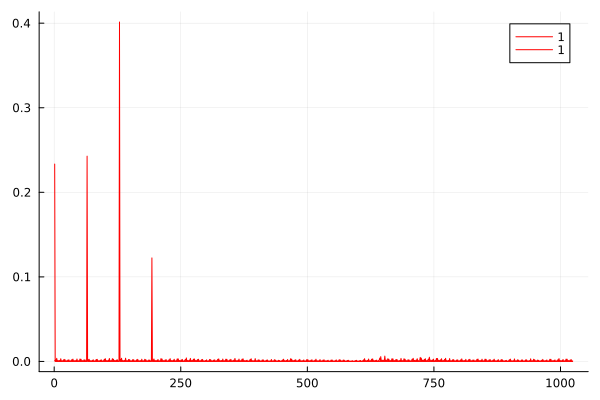

In [ ]:
plot!(mean(vec_,dims=1)[1], label="1", color=:red)

In [ ]:
using Serialization


In [ ]:
serialize("mps.jls", mps_)

In [ ]:
loaded_data = deserialize("MPS_(0,1)_L10_pctrl0.500_sC1_sm1_XEB.jls")

CT.CT_MPS(10, false, false, false, 0, nothing, 0, 1, 0//1, Set([0]), 1.0e-10, 0, true, MersenneTwister(0), MersenneTwister(0), MersenneTwister(0), MersenneTwister(1, (0, 1002, 0, 53)), Index{Int64}[(dim=2|id=346|"Qubit,Site,n=1"), (dim=2|id=449|"Qubit,Site,n=2"), (dim=2|id=211|"Qubit,Site,n=3"), (dim=2|id=581|"Qubit,Site,n=4"), (dim=2|id=67|"Qubit,Site,n=5"), (dim=2|id=656|"Qubit,Site,n=6"), (dim=2|id=197|"Qubit,Site,n=7"), (dim=2|id=400|"Qubit,Site,n=8"), (dim=2|id=929|"Qubit,Site,n=9"), (dim=2|id=622|"Qubit,Site,n=10")], [1, 3, 5, 7, 9, 10, 8, 6, 4, 2], [1, 10, 2, 9, 3, 8, 4, 7, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 60, 1.0e-10, 9223372036854775807, MPS
[1] ((dim=2|id=346|"Qubit,Site,n=1"), (dim=1|id=187|"Link,l=1"))
[2] ((dim=2|id=449|"Qubit,Site,n=2"), (dim=1|id=187|"Link,l=1"), (dim=1|id=958|"Link,l=2"))
[3] ((dim=2|id=211|"Qubit,Site,n=3"), (dim=1|id=958|"Link,l=2"), (dim=1|id=696|"Link,l=3"))
[4] ((dim=2|id=581|"Qubit,Site,n=4"), (dim=1|id=696|"Link,l=3"), (dim=1|id=548|"Link,

In [ ]:
loaded_data[1]

CT.CT_MPS(10, false, true, false, 1, nothing, 11, 1, 0//1, Set([0]), 1.0e-10, 0, true, MersenneTwister(1), MersenneTwister(1), MersenneTwister(11), MersenneTwister(1, (0, 1002, 0, 53)), Index{Int64}[(dim=2|id=977|"Qubit,Site,n=1"), (dim=2|id=103|"Qubit,Site,n=2"), (dim=2|id=402|"Qubit,Site,n=3"), (dim=2|id=350|"Qubit,Site,n=4"), (dim=2|id=81|"Qubit,Site,n=5"), (dim=2|id=449|"Qubit,Site,n=6"), (dim=2|id=371|"Qubit,Site,n=7"), (dim=2|id=475|"Qubit,Site,n=8"), (dim=2|id=22|"Qubit,Site,n=9"), (dim=2|id=545|"Qubit,Site,n=10")], [1, 3, 5, 7, 9, 10, 8, 6, 4, 2], [1, 10, 2, 9, 3, 8, 4, 7, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 60, 1.0e-10, 9223372036854775807, MPS
[1] ((dim=2|id=977|"Qubit,Site,n=1"), (dim=1|id=822|"Link,l=1"))
[2] ((dim=2|id=103|"Qubit,Site,n=2"), (dim=1|id=822|"Link,l=1"), (dim=1|id=10|"Link,l=2"))
[3] ((dim=2|id=402|"Qubit,Site,n=3"), (dim=1|id=10|"Link,l=2"), (dim=1|id=464|"Link,l=3"))
[4] ((dim=2|id=350|"Qubit,Site,n=4"), (dim=1|id=464|"Link,l=3"), (dim=1|id=638|"Link,l=

In [ ]:
using HDF5

In [ ]:
f = h5open("test.h5", "w")


🗂️ HDF5.File: (read-write) test.h5

In [ ]:
close(f)

In [ ]:
write(f,"mps", mps_[1])


LoadError: MethodError: no method matching hdf5_type_id(::Type{Union{Nothing, Int64}}, ::Val{false})

[0mClosest candidates are:
[0m  hdf5_type_id(::Type{T}, ::Val{false}) where T
[0m[90m   @[39m [32mHDF5[39m [90m~/.julia/packages/HDF5/Z859u/src/[39m[90m[4mtypeconversions.jl:81[24m[39m
[0m  hdf5_type_id(::Type{T}) where T
[0m[90m   @[39m [32mHDF5[39m [90m~/.julia/packages/HDF5/Z859u/src/[39m[90m[4mtypeconversions.jl:71[24m[39m
[0m  hdf5_type_id(::Type{T}, [91m::Val{true}[39m) where T
[0m[90m   @[39m [32mHDF5[39m [90m~/.julia/packages/HDF5/Z859u/src/[39m[90m[4mtypeconversions.jl:72[24m[39m


In [ ]:
mean(vec_,dims=1)[1][193]

0.12242288084441984

In [ ]:
data["10_0.50_1"][1:3]

3-element Vector{Any}:
 Any["U", 1.7092600296244376, 1.9685662833980657, 6.2581101168143665, 0.9804716312302331, 0.9482869817460049, 3.1919205872212193, 1.6707252635776426, 5.294114755133639, 5.56062439463339, 0.12930910536873913, 4.116271394053758, 3.645267195504607]
 Any["C"]
 Any["U", 3.0976457435510953, 5.267235374688091, 5.174062994370176, 2.193657635978594, 1.400263256881555, 5.3697320921839555, 2.032868659354542, 1.827747906622541, 5.664365589432614, 3.868596173992828, 5.967313652374507, 1.2594341146657664]

In [ ]:
CT.U_simp(false,nothing,fill(.0, 12))

4×4 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  1.0+0.0im

In [ ]:
mats = [CT.U_simp(true) for i in 1:20000]
CT.frame_potential(mats)

2.1864576597611887

In [ ]:
function run_dw_t(L::Int,p_ctrl::Float64,p_proj::Float64,seed_C::Int,seed_m::Int,simplified_U::Bool)
    ct=CT.CT_MPS(L=L,seed=0,seed_C=seed_C,seed_m=seed_m,folded=true,store_op=true,store_vec=false,ancilla=0,xj=Set([0]),x0=1//2^(L÷2+1) ,simplified_U=simplified_U)
    print("x0: ", ct.x0)
    # x0=1//2^(L÷2+1)   # at the midpoint, without label
    # x0=1//2^L     # at k=1, with label x01
    # x0=random_int(L,2^(L-1),2^L - 1, seed)//2^L # at k=L, with label x12
    # x0=random_int(seed,0,2^L-1)//2^L # at random k, with label x00, here seed needs a redefinition, maybe can be seed_v
    i=L
    # tf=(ct.ancilla ==0) ? 2*ct.L^2 : div(ct.L^2,2)
    tf=(ct.ancilla ==0) ? div(ct.L^2,2) : div(ct.L^2,2) 
    dw_list=zeros(tf+1,2)
    dw_list[1,:]=collect(CT.dw(ct,1))
    O_list=zeros(tf+1,2)
    O_list[1,:]=[CT.Z(ct),CT.Z_sq(ct)]
    for idx in 1:tf
        i=CT.random_control!(ct,i,p_ctrl,p_proj)
        dw_list[idx+1,:]=collect(CT.dw(ct,(i%ct.L)+1))
        O_list[idx+1,:]=[CT.Z(ct),CT.Z_sq(ct)]
    end

    return Dict("O1"=>O_list[:,1],"O2"=>O_list[:,2],"DW1"=>dw_list[:,1],"DW2"=>dw_list[:,2])
            
end

run_dw_t (generic function with 3 methods)

In [ ]:
sC_list = 1:400
L=10
t_list = range(1,div(L^2,2)+1)
O1_list = zeros(length(sC_list),t_list[end])
O2_list = zeros(length(sC_list),t_list[end])
DW1_list = zeros(length(sC_list),t_list[end])
DW2_list = zeros(length(sC_list),t_list[end])
for sC in sC_list
    rs = run_dw_t(L,0.5,0.,sC,0,true)
    O1_list[sC,:] = rs["O1"]
    O2_list[sC,:] = rs["O2"]
    DW1_list[sC,:] = rs["DW1"]
    DW2_list[sC,:] = rs["DW2"]
end

x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x

In [ ]:
sC_list = 1:400
L=10
t_list = range(1,div(L^2,2)+1)

# t_list = range(1,2*L^2+1)
O1_full_list = zeros(length(sC_list),t_list[end])
O2_full_list = zeros(length(sC_list),t_list[end])
DW1_full_list = zeros(length(sC_list),t_list[end])
DW2_full_list = zeros(length(sC_list),t_list[end])
for sC in sC_list
    rs = run_dw_t(L,0.5,0.,sC,0,false)
    O1_full_list[sC,:] = rs["O1"]
    O2_full_list[sC,:] = rs["O2"]
    DW1_full_list[sC,:] = rs["DW1"]
    DW2_full_list[sC,:] = rs["DW2"]
end

x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x0: 1//64x

In [ ]:
mean(DW1_full_list, dims=1)

1×51 Matrix{Float64}:
 5.0  4.995  5.02  5.005  4.99  4.95505  …  4.52088  4.5882  4.56007  4.68325

In [ ]:
varO_list = mean(O2_list, dims=1) - mean(O1_list.^2, dims=1)
# varDW_list = mean(DW2_list, dims=1) - mean(DW1_list.^2, dims=1)
varDW_list = mean(DW1_list.^2, dims=1) - mean(DW1_list, dims=1).^2
# varDW_full_list = mean(DW2_full_list, dims=1) - mean(DW1_full_list.^2, dims=1)
varDW_full_list = mean(DW1_full_list.^2, dims=1) - mean(DW1_full_list, dims=1).^2

1×51 Matrix{Float64}:
 -3.55271e-15  0.999975  1.9196  …  7.94227  7.99404  8.20054  8.07034

In [ ]:
varDW_sm_list = mean(DW1_list[101:150,:].^2, dims=1) - mean(DW1_list[101:150,:], dims=1).^2


1×51 Matrix{Float64}:
 7.10543e-15  0.9936  1.3584  1.9536  …  8.99295  8.9861  8.96191  8.411

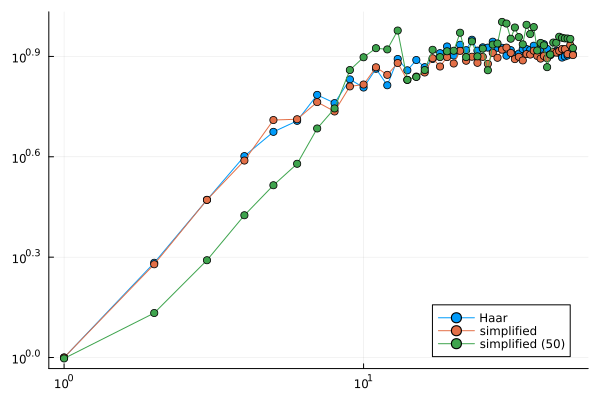

In [ ]:
plot(t_list[2:end].-1,vec(varDW_full_list)[2:end], style=:solid, marker=:circle,label="Haar")
plot!(t_list[2:end].-1,vec(varDW_list)[2:end], style=:solid, marker=:circle, label="simplified")
plot!(t_list[2:end].-1,vec(varDW_sm_list)[2:end], style=:solid, marker=:circle, label="simplified (50)")
xaxis!(xscale=:log10)
yaxis!(yscale=:log10)


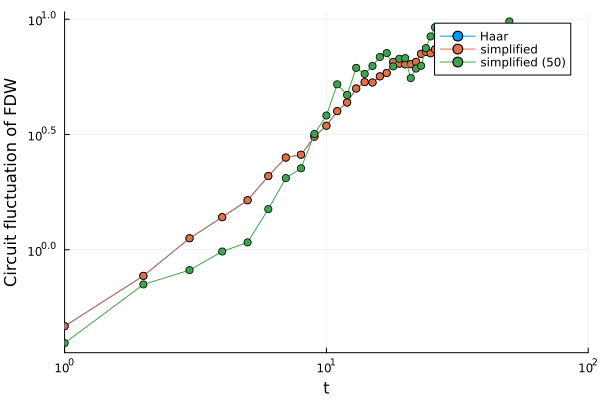

In [ ]:
plot(t_list[2:end].-1,vec(varDW_full_list)[2:end], style=:solid, marker=:circle,label="Haar")
plot!(t_list[2:end].-1,vec(varDW_list)[2:end], style=:solid, marker=:circle, label="simplified")
plot!(t_list[2:end].-1,vec(varDW_sm_list)[2:end], style=:solid, marker=:circle, label="simplified (50)")
xaxis!(xscale=:log10)
yaxis!(yscale=:log10)
xlims!(1, 100)
xlabel!("t")
ylabel!("Circuit fluctuation of FDW")

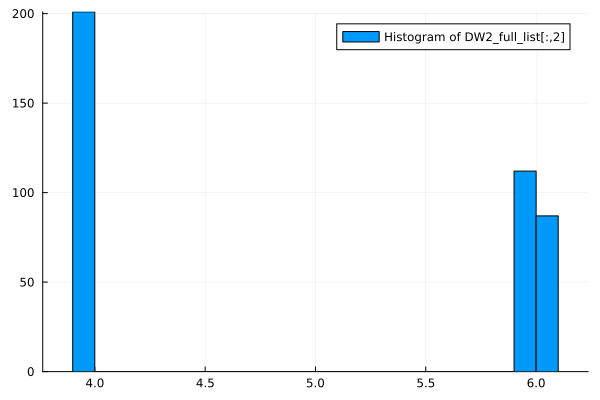

In [ ]:
histogram(DW1_full_list[:,2], label="Histogram of DW2_full_list[:,2]", bins=20)

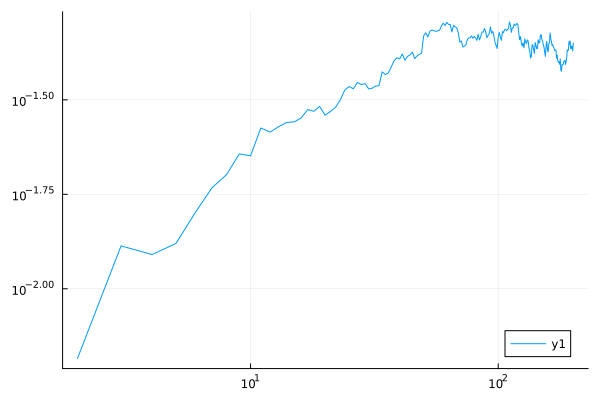

In [ ]:
plot(t_list[2:end],vec(varO_list)[2:end])
xaxis!(xscale=:log10)
yaxis!(yscale=:log10)

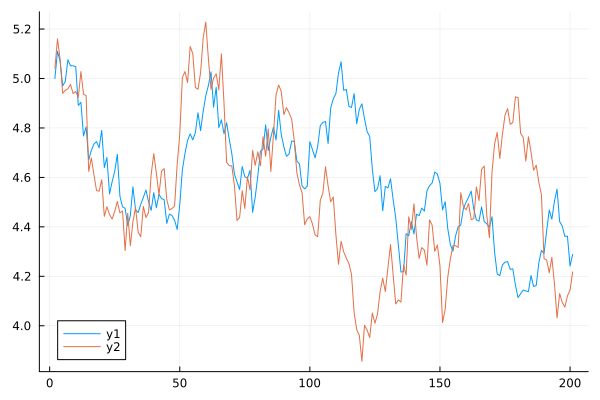

In [ ]:
plot(t_list[2:end],mean(DW1_list,dims=1)[2:end])
plot!(t_list[2:end],mean(DW1_full_list,dims=1)[2:end])
# xaxis!(xscale=:log10)
# yaxis!(yscale=:log10)

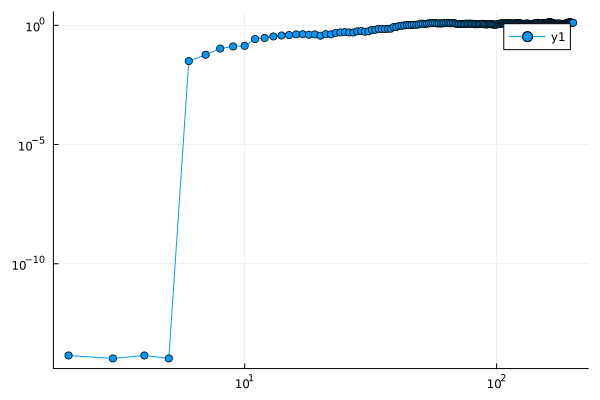

In [ ]:
plot(t_list[2:end],vec(varDW_list)[2:end], style=:solid, marker=:circle)
xaxis!(xscale=:log10)
yaxis!(yscale=:log10)

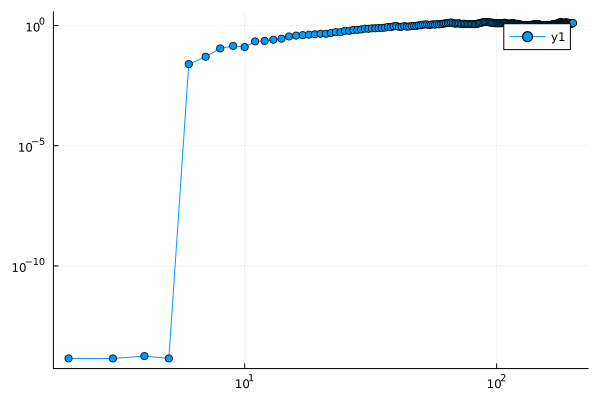

In [ ]:
plot(t_list[2:end],vec(varDW_full_list)[2:end], style=:solid, marker=:circle)
xaxis!(xscale=:log10)
yaxis!(yscale=:log10)

In [ ]:
plot(varO_list[1])

LoadError: Cannot convert Float64 to series data for plotting

In [ ]:
function mps_to_Born_prob(ct)
    wf=array(prod(ct.mps))
    p=((abs.(wf)).^2)
    p_=(permutedims(p, ct.phy_ram))
    return p_
end

mps_to_Born_prob (generic function with 1 method)

In [ ]:
(ct_0["Prob"])

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 0.00279402   0.000102755
 0.000139716  0.00307892

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
 0.00175618   0.000223716
 0.000102879  2.90733e-5

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
 0.000526864  0.000366123
 0.000167454  0.00068564

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 0.000577025  0.000108273
 0.000159445  0.00282249

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 0.000181376  0.000255587
 0.00367638   0.00232672

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 0.00125534  0.0021318
 8.90044e-5  0.000524051

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
 0.000461131  0.00368517
 0.00129243   0.000692668

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
 0.00180112   0.00486054
 0.000440214  0.000524638

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 0.0031899   0.00148433
 0.00130232  0.000515134

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
 0.000229996  0.000314727
 0.00136028   0.00180026

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 0.00104165  0.000994989
 0.00273297  0.000515415

[:, :, 2, 2, 1, 2, 1, 1, 1, 1] 

In [ ]:
ct_1 = run_dw_t(10,0.0,0.,1,0)

In [ ]:
array(ct_1.mps[1])

2×2 Matrix{ComplexF64}:
 -0.428122-2.33646e-15im   0.54981+1.38668e-15im
  0.533828-0.275542im     0.348176-0.179716im

In [ ]:
wf=array(prod(ct_0.mps))
p=((abs.(wf)).^2)
p_=(permutedims(p, ct_0.phy_ram))

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 0.00279402   0.001324
 0.000139716  0.000832029

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
 0.000102755  0.000642304
 0.00307892   0.000314949

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
 0.000744076  0.000774019
 0.00520082   0.000291075

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 0.00166761  0.00382774
 5.08005e-5  0.0030907

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 0.00175618   0.000268452
 0.000102879  0.000551564

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 0.000223716  0.00170463
 2.90733e-5   0.000556133

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
 0.000701843  0.000954996
 0.00136514   0.00205744

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
 0.000628714  4.2246e-5
 0.00137932   0.00221479

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 0.00073772  5.44726e-5
 0.00130517  0.00209118

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
 0.0005321    2.98807e-5
 0.000345272  0.00242326

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 0.000172573  0.00104919
 2.69339e-5   0.000402585

[:, :, 2, 2, 1, 2, 1, 1, 1, 1] =
 

In [ ]:
p_[1,1,1,1,1,1,1,1,1,1]

0.002794017897739926

In [ ]:
# Assuming `p` is your n-dimensional array and `order` is the desired order of axes
order = [2, 1]  # Example order
permuted_array = permutedims(p, order)

(2, 2, 2, 2, 2, 2, 2, 2, 2, 2)

In [ ]:
sum(p.^2)*2^10-1

1.0226032153270403

In [ ]:
idx=[0,1, 1, 1, 1, 1, 1, 1, 0, 1]

10-element Vector{Int64}:
 0
 1
 1
 1
 1
 1
 1
 1
 0
 1

In [ ]:
maximum(p[:])

0.007681629835339404

In [ ]:
(argmax(p))

CartesianIndex(1, 1, 2, 1, 1, 2, 1, 2, 2, 1)

In [ ]:
parse.(Int,collect(lpad(string(n, base=2), 10, '0')))

10-element Vector{Int64}:
 0
 1
 1
 1
 1
 1
 1
 1
 0
 1

In [ ]:
# idx=[0,0, 0, 0, 0, 0, 0, 0,0,0]
n = 604

# idx=parse.(Int, collect(string(n, base=2)))
idx = parse.(Int,collect(lpad(string(n, base=2), 10, '0')))

idx=idx.+1
idx[ct_1.ram_phy]
p[idx[ct_1.ram_phy]...]

0.007681629835339404

In [ ]:
length("1001011100")

10

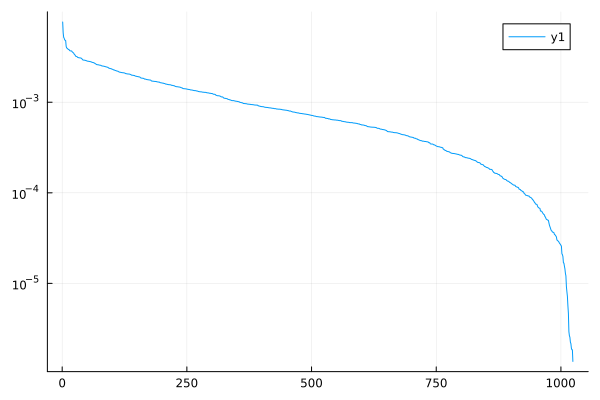

In [ ]:
# using Plots

# Flatten the n-dimensional array
# data = rand(100, 100)
# flattened_data = data[:]
    
# Plot the histogram
# histogram(p[:], bins = 10, yscale=:log10)
plot(sort(p[:], rev=true),yscale=:log10)
# plot(sort(p[:], rev=true))

In [ ]:
sum(fdw["fdw"][2,:])

1.0000000000000007

In [ ]:
CT.trace_0(ct.mps,ct,fill(0,8),1)

[0, 0, 0, 0, 0, 0, 0, 0]


0.408734457627798 + 0.0im

In [ ]:
array(conj(mps_c)[1])

2×2 Matrix{ComplexF64}:
 -0.127206-0.705734im   -0.0125496-0.696851im
  0.696649+0.0209545im   -0.704148-0.13571im

In [ ]:
array(mps_c[1])

2×2 Matrix{ComplexF64}:
 -0.127206+0.705734im   -0.0125496+0.696851im
  0.696649-0.0209545im   -0.704148+0.13571im

In [ ]:
array(ct.mps[1])

2×2 Matrix{ComplexF64}:
 -0.127206+0.705734im   -0.0125496+0.696851im
  0.696649-0.0209545im   -0.704148+0.13571im

In [ ]:
CT.fdw_weights(ct,ct.L)

9-element Vector{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [ ]:
CT.fdw_weights(ct,1)

9-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [ ]:
[CT.fdw_weights(ct,k,ct.L) for k in 0:4]

MethodError: MethodError: no method matching fdw_weights(::CT.CT_MPS, ::Int64, ::Int64)

Closest candidates are:
  fdw_weights(::CT.CT_MPS, ::Int64)
   @ CT /mnt/d/Rutgers/CT_MPS/CT/src/CT.jl:822


In [ ]:
zz=[CT.l1_coherence_0(ct.mps,ct,i,i,1)[2] for i in 0:4]

In [ ]:
sum(zz)

1.0

In [ ]:
[CT.fdw_weight(ct,i,ct.L) for i in 0:4]

[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, -1]
[0, 1, -1, -1]
[1, -1, -1, -1]


5-element Vector{Float64}:
 0.18838890890353943
 0.03347762352432234
 0.11969577097735595
 0.1591985731467525
 0.49923912344802984

In [ ]:

ram_idx

4-element Vector{Int64}:
 3
 4
 2
 1

In [ ]:
[ct.phy_ram[mod(ct.phy_list[phy_idx] + i1-1  ,ct.L)+1] for phy_idx in 1:ct.L]

4-element Vector{Int64}:
 3
 4
 2
 1

In [ ]:
[ct.ram_phy[ram_idx] for ram_idx in 1:ct.L]

4-element Vector{Int64}:
 1
 4
 2
 3

In [ ]:
i1=1
ram_idx=[ct.phy_ram[mod(ct.phy_list[phy_idx] + i1-1  ,ct.L)+1] for phy_idx in 1:ct.L]
ct.qubit_site[ram_idx]

4-element Vector{Index{Int64}}:
 (dim=2|id=922|"Qubit,Site,n=3")
 (dim=2|id=595|"Qubit,Site,n=4")
 (dim=2|id=541|"Qubit,Site,n=2")
 (dim=2|id=157|"Qubit,Site,n=1")

In [ ]:
ct_0,rs_0=run_dw_t(20,0.,0.5,0,0);

x0: 1//2048

In [ ]:
ct_1,rs_1=run_dw_t(20,0.,0.5,0,1);

x0: 1//2048

In [ ]:
rs_0["O1"]

In [ ]:
rs_0["O2"]-rs_0["O1"].^2

In [ ]:
sum((rs_0["O2"]-rs_0["O1"].^2)[ct_0.L^2:end].<1e-5)

0

In [ ]:
sum((rs_1["O2"]-rs_1["O1"].^2)[ct_1.L^2:end].<1e-5)

0

In [ ]:
48/64

0.75

In [ ]:
sum((rs_0["DW2"]-rs_0["DW1"].^2)[ct_0.L^2:end].<1e-5)/ct_0.L^2

0.3

In [ ]:
sum((rs_1["DW2"]-rs_1["DW1"].^2)[ct_1.L^2:end].<1e-5)/ct_1.L^2

0.28

In [ ]:
rs_0["DW2"]

129-element Vector{Float64}:
 15.999999999999998
 25.00000000000001
 35.999999999999986
 49.00000000000006
 63.99999999999995
 36.0
 48.999999999999964
 63.99999999999999
  9.000000000000004
 15.999999999999995
  ⋮
 48.99999999999999
 63.999999999999986
 54.3892340431796
 40.825931322957
 54.56838229571956
 64.00000000000003
 64.00000000000006
 64.00000000000011
 47.28738057692233

In [ ]:
rs_0["DW1"]

129-element Vector{Float64}:
 3.9999999999999973
 5.000000000000003
 5.999999999999997
 7.000000000000008
 7.999999999999994
 5.999999999999998
 6.999999999999996
 7.999999999999999
 2.9999999999999982
 3.9999999999999996
 ⋮
 6.999999999999997
 7.999999999999998
 7.276430272632159
 6.371225486381304
 7.371225486381299
 8.000000000000004
 8.000000000000007
 8.000000000000014
 6.830200090042427

In [ ]:
rs_1

Dict{String, Vector{Float64}} with 4 entries:
  "O1"  => [0.75, 0.75, 0.75, 0.56577, 0.5, 0.527743, 0.5, 0.356212, 0.25, 0.20…
  "DW2" => [16.0, 25.0, 36.0, 49.0, 64.0, 4.0, 9.0, 16.0, 25.0, 36.0  …  36.0, …
  "DW1" => [4.0, 5.0, 6.0, 7.0, 8.0, 2.0, 3.0, 4.0, 5.0, 6.0  …  6.0, 7.0, 8.0,…
  "O2"  => [0.5625, 0.5625, 0.5625, 0.332213, 0.25, 0.284679, 0.25, 0.142159, 0…

In [ ]:
ct_0.op_history[end-10:end]

11-element Vector{Vector{Any}}:
 [Dict{String, Any}("Site" => [5, 6], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [6], "Outcome" => [0], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [6, 7], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [6], "Outcome" => [1], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [7, 8], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [7], "Outcome" => [1], "Type" => "Projection"), Dict{String, Any}("Site" => [8], "Outcome" => [1], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [8, 1], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [8], "Outcome" => [1], "Type" => "Projection"), Dict{String, Any}("Site" => [1], "Outcome" => [1], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [1, 2], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [2], "Outcome" => [0], "Type" => "Projection")]
 [Dict{String, A

In [ ]:
(ct_1.op_history)

10-element Vector{Vector{Any}}:
 [Dict{String, Any}("Site" => [8, 1], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [8], "Outcome" => [0], "Type" => "Projection"), Dict{String, Any}("Site" => [1], "Outcome" => [0], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [1, 2], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [1], "Outcome" => [0], "Type" => "Projection"), Dict{String, Any}("Site" => [2], "Outcome" => [0], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [2, 3], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [2], "Outcome" => [0], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [3, 4], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [3], "Outcome" => [0], "Type" => "Projection"), Dict{String, Any}("Site" => [4], "Outcome" => [1], "Type" => "Projection")]
 [Dict{String, Any}("Site" => [4, 5], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any

In [ ]:
ct,O=run_dw_t(8,0.,0.8,0,0)

x0: 1//32

(CT.CT_MPS(8, false, false, false, 0, nothing, 0, 0, 1//32, Set([0]), 1.0e-10, 0, true, MersenneTwister(0), MersenneTwister(0), MersenneTwister(0, (0, 5010, 4008, 555)), MersenneTwister(0, (0, 1002, 0, 204)), Index{Int64}[(dim=2|id=945|"Qubit,Site,n=1"), (dim=2|id=377|"Qubit,Site,n=2"), (dim=2|id=969|"Qubit,Site,n=3"), (dim=2|id=464|"Qubit,Site,n=4"), (dim=2|id=90|"Qubit,Site,n=5"), (dim=2|id=39|"Qubit,Site,n=6"), (dim=2|id=648|"Qubit,Site,n=7"), (dim=2|id=259|"Qubit,Site,n=8")], [1, 3, 5, 7, 8, 6, 4, 2], [1, 8, 2, 7, 3, 6, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8], 10, 1.0e-10, 9223372036854775807, MPS
[1] ((dim=2|id=945|"Qubit,Site,n=1"), (dim=1|id=745|"Link,l=1"))
[2] ((dim=2|id=377|"Qubit,Site,n=2"), (dim=1|id=510|"Link,l=2"), (dim=1|id=745|"Link,l=1"))
[3] ((dim=2|id=969|"Qubit,Site,n=3"), (dim=1|id=559|"Link,l=3"), (dim=1|id=510|"Link,l=2"))
[4] ((dim=2|id=464|"Qubit,Site,n=4"), (dim=1|id=116|"Link,l=4"), (dim=1|id=559|"Link,l=3"))
[5] ((dim=2|id=90|"Qubit,Site,n=5"), (dim=1|id=74|"Link,l=

In [ ]:
ct_1,O_1=run_dw_t(8,0.,0.8,0,1)

x0: 1//32

(CT.CT_MPS(8, false, false, false, 0, nothing, 0, 1, 1//32, Set([0]), 1.0e-10, 0, true, MersenneTwister(0), MersenneTwister(0), MersenneTwister(0, (0, 5010, 4008, 555)), MersenneTwister(1, (0, 1002, 0, 204)), Index{Int64}[(dim=2|id=368|"Qubit,Site,n=1"), (dim=2|id=619|"Qubit,Site,n=2"), (dim=2|id=965|"Qubit,Site,n=3"), (dim=2|id=105|"Qubit,Site,n=4"), (dim=2|id=87|"Qubit,Site,n=5"), (dim=2|id=48|"Qubit,Site,n=6"), (dim=2|id=719|"Qubit,Site,n=7"), (dim=2|id=500|"Qubit,Site,n=8")], [1, 3, 5, 7, 8, 6, 4, 2], [1, 8, 2, 7, 3, 6, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8], 10, 1.0e-10, 9223372036854775807, MPS
[1] ((dim=2|id=368|"Qubit,Site,n=1"), (dim=1|id=797|"Link,l=1"))
[2] ((dim=2|id=619|"Qubit,Site,n=2"), (dim=1|id=808|"Link,l=2"), (dim=1|id=797|"Link,l=1"))
[3] ((dim=2|id=965|"Qubit,Site,n=3"), (dim=1|id=123|"Link,l=3"), (dim=1|id=808|"Link,l=2"))
[4] ((dim=2|id=105|"Qubit,Site,n=4"), (dim=1|id=936|"Link,l=4"), (dim=1|id=123|"Link,l=3"))
[5] ((dim=2|id=87|"Qubit,Site,n=5"), (dim=1|id=453|"Link,l

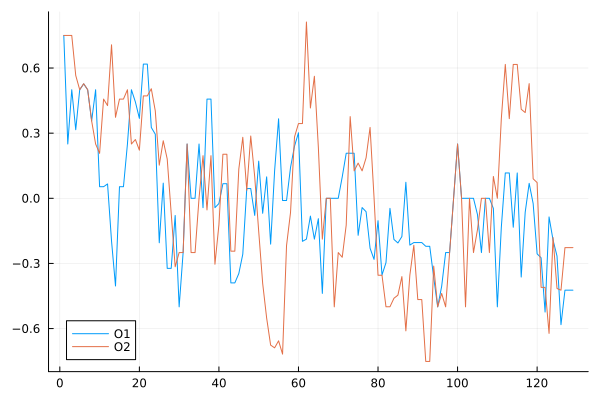

In [ ]:
Plots.plot(O["O1"],label="O1")
Plots.plot!(O_1["O1"],label="O2")


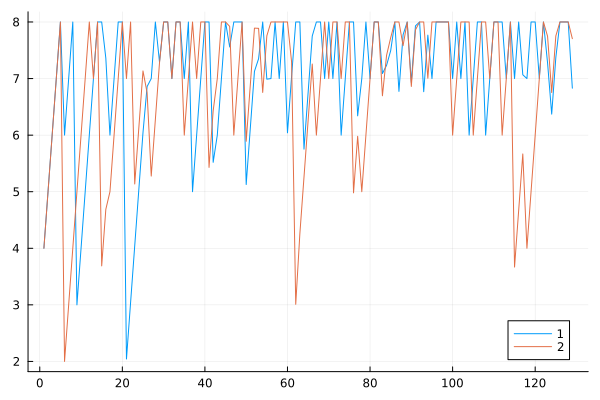

In [ ]:
Plots.plot(O["DW1"],label="1")
Plots.plot!(O_1["DW1"],label="2")


In [ ]:
(array(prod(ct.mps)).^2)

2×2 Matrix{Float64}:
 0.150083  0.382703
 0.22809   0.239124

In [ ]:
CT.bitstring_sample(ct)

2-element Vector{Int64}:
 2
 2

In [ ]:
bitstring=[CT.bitstring_sample(ct) for i in 1:1000]

In [ ]:
bit_num=(transpose(hcat(bitstring...)).-1) * [1,2]

In [ ]:
count(x -> x == 0, bit_num),
count(x -> x == 1, bit_num),
count(x -> x == 2, bit_num),
count(x -> x == 3, bit_num)

(153, 217, 393, 237)

In [ ]:
hcat(bitstring...) * [1,2]

MethodError: MethodError: no method matching *(::Vector{Vector{Int64}}, ::Vector{Int64})

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:587
  *(!Matched::ChainRulesCore.NotImplemented, ::Any)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_arithmetic.jl:37
  *(::Any, !Matched::ChainRulesCore.ZeroTangent)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_arithmetic.jl:105
  ...


In [ ]:
CT.Z_bitstring(bitstring)

0.5

In [ ]:
rho=CT.get_DM(ct.mps)

In [ ]:
prod(rho)

In [ ]:
ct.mps

MPS
[1] ((dim=2|id=865|"Qubit,Site,n=1"), (dim=1|id=561|"Link,l=1"))
[2] ((dim=2|id=224|"Qubit,Site,n=2"), (dim=1|id=561|"Link,l=1"))


In [ ]:
CT.abs_mps(ct.mps)

In [ ]:
coherence_matrix, fdw = CT.get_coherence_matrix(ct,ct.L)

In [ ]:
CT.l1_coherence_0(ct.mps,ct,ct.L+1,ct.L+1,ct.L)

()
((dim=60|id=191|"Link,l=1"),)
((dim=60|id=138|"Link,l=2"),)
((dim=60|id=697|"Link,l=3"),)
((dim=60|id=110|"Link,l=4"),)
((dim=60|id=392|"Link,l=5"),)
((dim=60|id=148|"Link,l=6"),)
((dim=60|id=173|"Link,l=7"),)
((dim=60|id=222|"Link,l=8"),)
((dim=60|id=452|"Link,l=9"),)
((dim=60|id=552|"Link,l=10"),)
((dim=60|id=147|"Link,l=11"),)
((dim=60|id=536|"Link,l=12"),)
((dim=60|id=339|"Link,l=13"),)
((dim=60|id=110|"Link,l=14"),)
((dim=32|id=363|"Link,l=15"),)
((dim=16|id=280|"Link,l=16"),)
((dim=8|id=477|"Link,l=17"),)
((dim=4|id=50|"Link,l=18"),)
((dim=2|id=594|"Link,l=19"),)


4.427863976977948

In [ ]:
CT.get_total_coherence_0(ct,ct.L)

-0.3390912336594145

In [ ]:
coherence_matrix_, fdw_ = CT.get_coherence_matrix_0(ct,ct.L)

In [ ]:
sum(coherence_matrix_)

4.427863976977947

In [ ]:
sum(abs.(coherence_matrix_ - coherence_matrix))

3.0599327263274304e-13

In [ ]:
sum(abs.(fdw_ - fdw))

2.0177666849469833e-15

In [ ]:
fdw

3-element Vector{Float64}:
 0.15008315843628095
 0.2280901002985099
 0.6218267412652101

In [ ]:
mps_conj = conj(ct.mps)

MPS
[1] ((dim=2|id=81|"Qubit,Site,n=1"), (dim=2|id=573|"Link,l=1"))
[2] ((dim=2|id=573|"Link,l=1"), (dim=2|id=270|"Qubit,Site,n=2"))


In [ ]:
(prod(ct.mps))[1,1] + (prod(ct.mps))[1,2]

1.0060355328614503

In [ ]:
array(prod(ct.mps))[1,1] * array(prod(mps_conj))[1,2]

0.23966071808196654

In [ ]:
array(prod(ct.mps))[1,1] * (array(prod(mps_conj))[2,1]+array(prod(mps_conj))[2,2])

-0.374462724232875

In [ ]:
array(prod(ct.mps))[1,2] * (array(prod(mps_conj))[2,1]+array(prod(mps_conj))[2,2])

-0.597961865405984

In [ ]:
CT.get_reduced_state(ct.mps,ct,[0,-1],2)[1]

1.00603553286145

In [ ]:
CT.l1_coherence_0(ct.mps,ct,0,0,2)

0.15008315843628067

In [ ]:
CT.

In [ ]:
let L=4
    k1 = 4
    (k1 == 0) ? fill(0,L) : vcat(fill(0, L - k1), [1], fill(-1, k1 - 1))
end

4-element Vector{Int64}:
  1
 -1
 -1
 -1

In [ ]:
fdw

3-element Vector{Float64}:
 0.15008315843628095
 0.3827028987796086
 0.46721394278411116

In [ ]:
(array(prod(mps))[2,1]+array(prod(mps))[2,2]) * (array(prod(mps_conj))[2,1]+array(prod(mps_conj))[2,2])  - fdw[3]

0.46708363797635105

In [ ]:
array(prod(mps_conj))

2×2 Matrix{Float64}:
  0.387406   0.61863
 -0.477588  -0.489003

In [ ]:
mps=run_dw_t(20,0.8,0.0,30,1)

x0: 1//1048576i:4


CT.CT_MPS(20, false, false, false, 1, nothing, nothing, nothing, 1//1048576, Set([0]), 1.0e-10, 0, true, MersenneTwister(1, (0, 8016, 7014, 400)), MersenneTwister(1, (0, 8016, 7014, 400)), MersenneTwister(1, (0, 8016, 7014, 400)), MersenneTwister(1, (0, 8016, 7014, 400)), Index{Int64}[(dim=2|id=12|"Qubit,Site,n=1"), (dim=2|id=209|"Qubit,Site,n=2"), (dim=2|id=376|"Qubit,Site,n=3"), (dim=2|id=641|"Qubit,Site,n=4"), (dim=2|id=175|"Qubit,Site,n=5"), (dim=2|id=961|"Qubit,Site,n=6"), (dim=2|id=660|"Qubit,Site,n=7"), (dim=2|id=34|"Qubit,Site,n=8"), (dim=2|id=894|"Qubit,Site,n=9"), (dim=2|id=216|"Qubit,Site,n=10"), (dim=2|id=873|"Qubit,Site,n=11"), (dim=2|id=788|"Qubit,Site,n=12"), (dim=2|id=893|"Qubit,Site,n=13"), (dim=2|id=405|"Qubit,Site,n=14"), (dim=2|id=4|"Qubit,Site,n=15"), (dim=2|id=306|"Qubit,Site,n=16"), (dim=2|id=330|"Qubit,Site,n=17"), (dim=2|id=182|"Qubit,Site,n=18"), (dim=2|id=756|"Qubit,Site,n=19"), (dim=2|id=160|"Qubit,Site,n=20")], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 20, 18, 16

In [ ]:
using Plots

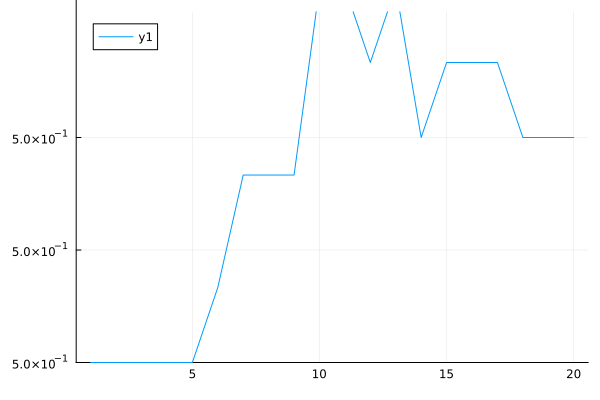

GKS: Possible loss of precision in routine SET_WINDOW


In [ ]:
plot(abs.(expect(mps.mps,"Sz")))

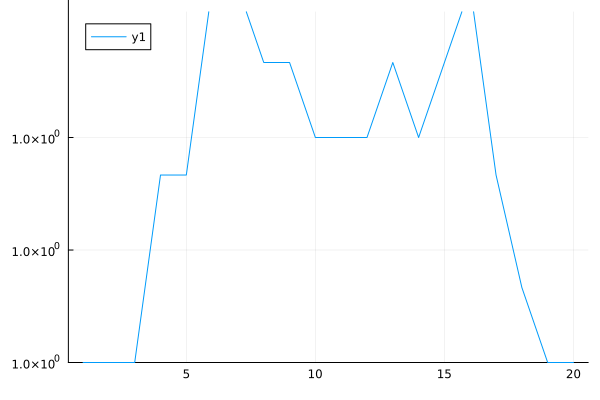

In [ ]:
plot(abs.(CT.Zi(mps)))

In [ ]:
include("run_CT_MPS_coherence.jl")

  Activating project at `/mnt/d/Rutgers/CT_MPS/CT`


In [ ]:
rs=run_dw_t(50,0.5,0.0,30,1)

x0: 1//1125899906842624Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 86739.5

In [ ]:
rs=run_dw_t(50,0.5,0.0,60,1)

x0: 1//1125899906842624Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 0.00013067064684540492 ranks 62 after 5 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 86774.7

In [ ]:
rs=run_dw_t(50,0.5,0.0,120,1)

x0: 1//1125899906842624Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 4.674022016681119e-6 ranks 121 after 6 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 86773.7

In [ ]:
rs=run_dw_t(50,0.5,0.0,180,1)

x0: 1//1125899906842624Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 4.960273044115993e-7 ranks 181 after 6 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 86773.7

In [ ]:
rs=run_dw_t(50,0.5,0.0,30,1)

x0: 1//1125899906842624Start crossinterpolate
End crossinterpolate with error 0.0030221175691799796 ranks 31 after 5 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 86735.6

In [ ]:
rs=run_dw_t(20,0.5,0.0,30,1)

x0: 1//1048576Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.80707

In [ ]:
rs=run_dw_t(20,0.5,0.0,30,1)

x0: 1//1048576Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 1.3872843181316923e-49 ranks 2 after 4 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.80707

In [ ]:
rs=run_dw_t(20,0.5,0.0,60,1)

x0: 1//1048576Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 1.3872843181316923e-49 ranks 2 after 4 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.80707

In [ ]:
rs=run_dw_t(20,0.5,0.0,120,1)

x0: 1//1048576Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 1.3872843181316923e-49 ranks 2 after 4 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.80707

In [ ]:
rs=run_dw_t(70,0.5,0.0,100,1)

x0: 1//1180591620717411303424Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 989.243

In [ ]:
rs=run_dw_t(70,0.5,0.0,100,1)

x0: 1//1180591620717411303424Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 989.243

In [ ]:
rs=run_dw_t(60,0.5,0.0,30,1)

x0: 1//1152921504606846976Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 1.62531e6

In [ ]:
rs=run_dw_t(60,0.5,0.0,60,1)

x0: 1//1152921504606846976Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 1.62528e6

In [ ]:
rs=run_dw_t(40,0.5,0.0,100,1)

x0: 1//1099511627776Start crossinterpolate
End crossinterpolate


Dict{String, Float64} with 1 entry:
  "coh_mat" => 213.43

In [ ]:
# rs=run_dw_t(40,0.5,0.0,30,2,1995)
rs=run_dw_t(30,0.5,0.0,30,2,784)

x0: 1//1073741824

CT.CT_MPS(30, false, false, false, 784, nothing, nothing, nothing, 1//1073741824, Set([0]), 1.0e-10, 0, true, MersenneTwister(784, (0, 35070, 34068, 196)), MersenneTwister(784, (0, 35070, 34068, 196)), MersenneTwister(784, (0, 35070, 34068, 196)), MersenneTwister(784, (0, 35070, 34068, 196)), Index{Int64}[(dim=2|id=653|"Qubit,Site,n=1"), (dim=2|id=126|"Qubit,Site,n=2"), (dim=2|id=564|"Qubit,Site,n=3"), (dim=2|id=764|"Qubit,Site,n=4"), (dim=2|id=298|"Qubit,Site,n=5"), (dim=2|id=549|"Qubit,Site,n=6"), (dim=2|id=735|"Qubit,Site,n=7"), (dim=2|id=794|"Qubit,Site,n=8"), (dim=2|id=347|"Qubit,Site,n=9"), (dim=2|id=552|"Qubit,Site,n=10")  …  (dim=2|id=893|"Qubit,Site,n=21"), (dim=2|id=429|"Qubit,Site,n=22"), (dim=2|id=291|"Qubit,Site,n=23"), (dim=2|id=119|"Qubit,Site,n=24"), (dim=2|id=822|"Qubit,Site,n=25"), (dim=2|id=667|"Qubit,Site,n=26"), (dim=2|id=306|"Qubit,Site,n=27"), (dim=2|id=641|"Qubit,Site,n=28"), (dim=2|id=173|"Qubit,Site,n=29"), (dim=2|id=104|"Qubit,Site,n=30")], [1, 3, 5, 7, 9, 11

In [ ]:
import TensorCrossInterpolation as TCI

In [ ]:
mps_tci=TCI.TensorTrain(rs.mps)

(::TensorCrossInterpolation.TensorTrain{ComplexF64, 3}) (generic function with 1 method)

In [ ]:
mps_abs_func_cache = TCI.CachedFunction{ComplexF64}(mps_tci,fill(2, rs.L))

(::TensorCrossInterpolation.CachedFunction{ComplexF64, UInt128}) (generic function with 3 methods)

In [ ]:
mps_tci(fill(1,30))

1.2644373385480863e-7 + 2.2810105567418317e-7im

In [ ]:
using IterTools


In [ ]:
binary_iterator = IterTools.product((1:2 for _ in 1:rs.L)...)


Base.Iterators.ProductIterator{NTuple{30, UnitRange{Int64}}}((1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2, 1:2))

In [ ]:
total_norm=0
counter = 0
for bits in binary_iterator
    total_norm+=abs(mps_abs_func_cache(collect(bits)))
    # total_norm+=abs(mps_tci(collect(bits)))
    counter+=1
    if counter>2^21
        break
    end
    if counter % 2^20 == 0
        println("Progress: Processed $(counter/2^20) iterations...")
    end
end

Progress: Processed 1.0 iterations...
Progress: Processed 2.0 iterations...
Progress: Processed 2.0 iterations...


In [ ]:
2^30/2^20*16/3600

4.551111111111111

In [ ]:
2^20

1048576

In [ ]:
total_norm


1.0301234239526091

In [ ]:
Base.summarysize(dense_mat)/2^10*2^30/1024^3

17.703125

In [ ]:
dense_mat = prod(rs.mps)

ITensor ord=10 (dim=2|id=983|"Qubit,Site,n=1") (dim=2|id=735|"Qubit,Site,n=2") (dim=2|id=481|"Qubit,Site,n=3") (dim=2|id=694|"Qubit,Site,n=4") (dim=2|id=283|"Qubit,Site,n=5") (dim=2|id=615|"Qubit,Site,n=6") (dim=2|id=345|"Qubit,Site,n=7") (dim=2|id=322|"Qubit,Site,n=8") (dim=2|id=459|"Qubit,Site,n=9") (dim=2|id=944|"Qubit,Site,n=10")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [ ]:
sum(abs.(dense_mat ))

7.039610288334845 + 0.0im

In [ ]:
conj(rs.mps)+rs.mps

MPS
[1] ((dim=2|id=983|"Qubit,Site,n=1"), (dim=2|id=417|"Link,l=1"))
[2] ((dim=2|id=735|"Qubit,Site,n=2"), (dim=4|id=438|"Link,l=2"), (dim=2|id=417|"Link,l=1"))
[3] ((dim=2|id=481|"Qubit,Site,n=3"), (dim=4|id=712|"Link,l=3"), (dim=4|id=438|"Link,l=2"))
[4] ((dim=2|id=694|"Qubit,Site,n=4"), (dim=4|id=672|"Link,l=4"), (dim=4|id=712|"Link,l=3"))
[5] ((dim=2|id=283|"Qubit,Site,n=5"), (dim=4|id=95|"Link,l=5"), (dim=4|id=672|"Link,l=4"))
[6] ((dim=2|id=615|"Qubit,Site,n=6"), (dim=4|id=84|"Link,l=6"), (dim=4|id=95|"Link,l=5"))
[7] ((dim=2|id=345|"Qubit,Site,n=7"), (dim=4|id=874|"Link,l=7"), (dim=4|id=84|"Link,l=6"))
[8] ((dim=2|id=322|"Qubit,Site,n=8"), (dim=4|id=102|"Link,l=8"), (dim=4|id=874|"Link,l=7"))
[9] ((dim=2|id=459|"Qubit,Site,n=9"), (dim=2|id=681|"Link,l=9"), (dim=4|id=102|"Link,l=8"))
[10] ((dim=2|id=944|"Qubit,Site,n=10"), (dim=2|id=681|"Link,l=9"))


In [ ]:
rs=run_dw_t(40,0.5,0.0,60,1995)

x0: 1//1099511627776Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 0.0009814711722913331 ranks 65 after 5 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 3.21502e10

In [ ]:
rs=run_dw_t(40,0.5,0.0,120,1995)

x0: 1//1099511627776Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 0.0002619047002833174 ranks 125 after 5 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 3.21367e10

In [ ]:
rs=run_dw_t(40,0.5,0.0,180,1995)

x0: 1//1099511627776Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 8.240123173791033e-5 ranks 185 after 5 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 3.21373e10

In [ ]:
rs=run_dw_t(40,0.5,0.0,500,1995)

x0: 1//1099511627776Start crossinterpolate
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
End crossinterpolate with error 6.8267910930121475e-6 ranks 505 after 6 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 3.21388e10

In [ ]:
rs=run_dw_t(30,0.5,0.0,30,784)

x0: 1//1073741824End crossinterpolate with error 0.13666306077268542 ranks 35 after 4 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.20709e8

In [ ]:
rs=run_dw_t(30,0.5,0.0,60,784)

x0: 1//1073741824End crossinterpolate with error 0.038999976621931956 ranks 65 after 5 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.23859e8

In [ ]:
rs=run_dw_t(30,0.5,0.0,500,784)

x0: 1//1073741824End crossinterpolate with error 0.0001947680864641421 ranks 505 after 6 iterations


Dict{String, Float64} with 1 entry:
  "coh_mat" => 2.24044e8

In [ ]:
rs=run_dw_t(40,0.5,0.0,60,258,4)


x0: 1//1099511627776End crossinterpolate with error 7.370373985665103e-7 ranks 66 after 6 iterations


Dict{String, Real} with 3 entries:
  "errors"  => 7.37037e-7
  "coh_mat" => 1.55774e5
  "ranks"   => 66

In [ ]:
rs=run_dw_t(40,0.5,0.0,60,258,6)


x0: 1//1099511627776End crossinterpolate with error 2.5209597231529662e-20 ranks 33 after 20 iterations


Dict{String, Real} with 3 entries:
  "errors"  => 2.52096e-20
  "coh_mat" => 684.414
  "ranks"   => 33

In [ ]:
# rs=run_dw_t(30,0.5,0.0,30,784)
rs=run_dw_t(40,0.5,0.0,60,8,258)
# rs=run_dw_t(30,0.5,0.0,30,1080)

x0: 1//1099511627776End crossinterpolate with error 2.343475178465134e-6 ranks 79 after 4 iterations


Dict{String, Real} with 3 entries:
  "errors"  => 2.34348e-6
  "coh_mat" => 1.84349e6
  "ranks"   => 79

In [ ]:
rs=run_dw_t(40,0.5,0.0,60,258,10)

x0: 1//1099511627776End crossinterpolate with error 2.073375882267711e-6 ranks 80 after 4 iterations


Dict{String, Real} with 3 entries:
  "errors"  => 2.07338e-6
  "coh_mat" => 1.57393e10
  "ranks"   => 80

In [ ]:
# tci,ranks, errors=CT.abs_mps(rs.mps,normalized=false,maxbonddim=120, )
tci_0,ranks_0, errors_0=CT.abs_mps(rs.mps,normalized=false,maxbonddim=120, )

End crossinterpolate with error 1.4793679650024669e-5 ranks 140 after 4 iterations


(TensorCrossInterpolation.TensorCI2{Float64} with rank 120, [25, 140, 140, 140], [0.0, 4.175960298743634e-8, 1.6157259149093286e-5, 1.4793679650024669e-5])

In [ ]:
rs.mps

In [ ]:
errors[end]

8.562167402378169e-6

In [ ]:
sum(tci)

328346.98429370136

In [ ]:
sum(tci)

328550.79761244706

In [ ]:
sum(tci)

394.6840161319425

In [ ]:
sum(tci)

26.18040902870957

In [ ]:
this is kind of a obstacle , 
1: some very coherent states are very hard to be represted in MPS
2. these states are on the other hand, very important because it is an ensemble of a lot of small value and a few large value
3. these are hard because the "error" exponentially decay with "max-bond-dim", which means, it is very hard to suprress the error, because to suppress the error by one magnitude, we need to exponentially increase the bond-dim
So I come up with 2 ways to solve this:
1. just admit the error, and do the data collapse, and critical exponent fitting "within" the error, saying something like "although the curve bent downwards", but we have estimated the error, and this is still within the errorbar.
2. We can look at very long time, and then the proportionally of "large coherence state" should be small, to a level that , within say L<40, almost every abs(state) can be presentated by MPS.
But the trade off is that, the data collapse may be inaccurate, because we are dealing with curves all with very small value. 
So we need to choose the balance. 

In [ ]:
mps_abs_func_cache(true_err[1][1])

0.00014133430047350422

In [ ]:
tci(true_err[1][1])

3.0294904865502946e-5

In [ ]:
mps_abs_func_cache(true_err[1][1])

1.1673280104334136e-5

In [ ]:
tci(true_err[1][1])

1.1731514162843478e-5

In [ ]:
1.2424370105381248e-5

In [ ]:
0.0002443871884447433

In [ ]:
ranks

4-element Vector{Int64}:
 25
 50
 50
 50

In [ ]:
errors

4-element Vector{Float64}:
 0.0
 2.7375540494597505e-5
 2.4973176940858734e-5
 2.5195095399583895e-5

In [ ]:
sum(tci)^2

1.0821783351437804e11

In [ ]:
2.5195095399583895e-5 

In [ ]:
2.5195095399583895e-5 

2.5195095399583895e-5

In [ ]:
true_err

In [ ]:
import TensorCrossInterpolation as TCI


In [ ]:
using Plots

In [ ]:
tci.maxsamplevalue

5.579050018954206e-8

In [ ]:
tci.pivoterrors[end]/tci.maxsamplevalue

0.0

In [ ]:
plot(tci_0.pivoterrors/tci_0.maxsamplevalue,yscale=:log10,xscale=:log10,xlabel="max bond dim",ylabel="relative error",label="L=30")
plot!(tci.pivoterrors/tci.maxsamplevalue,yscale=:log10,xscale=:log10,xlabel="max bond dim",ylabel="relative error",label="L=40")

# savefig("error_vs_bondim.png")

"/mnt/d/Rutgers/CT_MPS/error_vs_bondim.png"

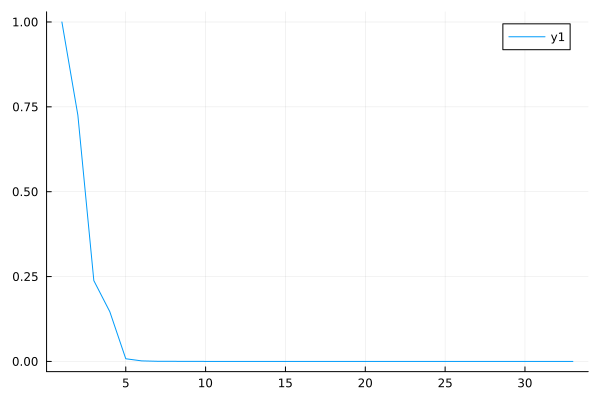

In [ ]:
plot(tci.pivoterrors/tci.maxsamplevalue,)


In [ ]:
tci=CT.abs_mps(rs.mps,normalized=true,maxbonddim=30)

  Walltime 5.420000000000001e-7 sec: starting 2site sweep
  Walltime 0.013130424000000002 sec: start searching global pivots
  Found 5 global pivots: max error 4.5099590278547653e-8
  Walltime 0.019884513000000003 sec: done searching global pivots
  Walltime 0.01995606 sec: starting 2site sweep
  Walltime 0.7878839950000001 sec: start searching global pivots
  Found 5 global pivots: max error 2.4513623791720786e-9
  Walltime 0.795413578 sec: done searching global pivots
  Walltime 0.795494762 sec: starting 2site sweep
  Walltime 1.7316028570000002 sec: start searching global pivots
  Found 5 global pivots: max error 1.3386452153199646e-9
  Walltime 1.738582762 sec: done searching global pivots
  Walltime 1.7386513000000001 sec: starting 2site sweep
  Walltime 2.081286967 sec: start searching global pivots
  Found 5 global pivots: max error 1.9839607145896976e-9
  Walltime 2.090184627 sec: done searching global pivots
End crossinterpolate with error 7.164291272163948e-9 ranks 35 after 4

(::TensorCrossInterpolation.TensorCI2{Float64}) (generic function with 1 method)

In [ ]:
tci=CT.abs_mpo(rs.mps;pivotpos=2)

End crossinterpolate with error 0.121022143965718 ranks 35 after 4 iterations


(::TensorCrossInterpolation.TensorCI2{Float64}) (generic function with 1 method)

In [ ]:
CT.l1_coherence_0(MPS(tci,sites=siteinds(rs.mps)),rs,rs.L+1,rs.L+1,1)

6.051654324762341

In [ ]:
sum(tci)^2

0.20908318771944867

In [ ]:
sum(tci)^2

0.20868342267672726

In [ ]:
sum(tci)^2

0.20864849140576905

In [ ]:
sum(tci)^2/2^30

0.20731907597088273

In [ ]:
sum(tci)

2.2372068783876228e8

In [ ]:
CT.sum_abs_mps(rs.mps)

ErrorException: Invalid length of x

In [ ]:
so 2 things can be done here:
1. check and honestly report the error bar and say that fitting falls in the error bar and we cannot do any better.
2. trying to use "sum"?
3. you also need to take a look at the "absolute error" because I feel that the absolute value is also very important, as for those large magnitude, even a small "relative error" could make a huge difference for those small magnitude.

In [ ]:
rs["coh_mat"]

2.8070707752022925

In [ ]:
CT.l1_coherence_0((rs["coh_mat"]), rs["ct"], rs["ct"].L+1,rs["ct"].L+1,28)

In [ ]:
(rs["coh_mat"])

MPS
[1] ((dim=2|id=61|"Qubit,Site,n=1"), (dim=1|id=691|"l=1,link"))
[2] ((dim=1|id=691|"l=1,link"), (dim=2|id=462|"Qubit,Site,n=2"), (dim=1|id=502|"l=2,link"))
[3] ((dim=1|id=502|"l=2,link"), (dim=2|id=80|"Qubit,Site,n=3"), (dim=2|id=993|"l=3,link"))
[4] ((dim=2|id=993|"l=3,link"), (dim=2|id=858|"Qubit,Site,n=4"), (dim=2|id=858|"l=4,link"))
[5] ((dim=2|id=858|"l=4,link"), (dim=2|id=476|"Qubit,Site,n=5"), (dim=4|id=812|"l=5,link"))
[6] ((dim=4|id=812|"l=5,link"), (dim=2|id=307|"Qubit,Site,n=6"), (dim=8|id=327|"l=6,link"))
[7] ((dim=8|id=327|"l=6,link"), (dim=2|id=667|"Qubit,Site,n=7"), (dim=16|id=210|"l=7,link"))
[8] ((dim=16|id=210|"l=7,link"), (dim=2|id=696|"Qubit,Site,n=8"), (dim=32|id=877|"l=8,link"))
[9] ((dim=32|id=877|"l=8,link"), (dim=2|id=572|"Qubit,Site,n=9"), (dim=60|id=284|"l=9,link"))
[10] ((dim=60|id=284|"l=9,link"), (dim=2|id=601|"Qubit,Site,n=10"), (dim=60|id=159|"l=10,link"))
[11] ((dim=60|id=159|"l=10,link"), (dim=2|id=774|"Qubit,Site,n=11"), (dim=60|id=697|"l=11,link"

In [ ]:
i=ct.L
tf=1
for idx in 1:tf
    println(idx,':',i)
    i=CT.random_control!(ct,i,0.5,0)
    # coh_mat[idx+1,:,:], _ = CT.get_coherence_matrix(ct,i)
end

1:2
Get projector for inner_prob [0] at Phy [2] at RAM [2]
Get projector [0] at Phy [2]
Born prob for measuring 0 at phy site 2 is 0.37817325873479074
Projecting [0] at Phy [2]
Get projector [0] at Phy [2]
norm is 0.6149579324919637
Control with 2=> Next i is 1


In [ ]:
i=ct.L
tf=4
for idx in 1:tf
    println(idx,':',i)
    i=CT.random_control!(ct,i,0.5,0)
    # coh_mat[idx+1,:,:], _ = CT.get_coherence_matrix(ct,i)
end

1:4
Get projector for inner_prob [0] at Phy [4] at RAM [4]
Get projector [0] at Phy [4]
Born prob for measuring 0 at phy site 4 is 0.748863300646791
Projecting [0] at Phy [4]
Get projector [0] at Phy [4]
norm is 0.865368881256306
Control with 4=> Next i is 3
2:3
U apply to 3
3:4
U apply to 4
4:1
Get projector for inner_prob [0] at Phy [1] at RAM [1]
Get projector [0] at Phy [1]
Born prob for measuring 0 at phy site 1 is 0.3992310111436643
Projecting [0] at Phy [1]
Get projector [0] at Phy [1]
norm is 0.6318473004956687
Control with 1=> Next i is 4


In [ ]:
function run_dw_t(L::Int,p_ctrl::Float64,p_proj::Float64,seed::Int,seed_C::Int,seed_m::Int)
    ct=CT.CT_MPS(L=L,seed=seed,seed_C=seed_C,seed_m=seed_m,folded=true,store_op=true,store_vec=false,ancilla=0,xj=Set([0]),x0=1//2^L,debug=false)
    
    i=L
    tf=(ct.ancilla ==0) ? 2*ct.L^2 : div(ct.L^2,2)
    # tf=8
    # coh_mat=zeros(tf+1,L+1,L+1)
    # coh_mat[1,:,:], _ = CT.get_coherence_matrix(ct,i)
    for idx in 1:tf
        # println(idx,':',i)
        i=CT.random_control!(ct,i,p_ctrl,p_proj)
        # coh_mat[idx+1,:,:], _ = CT.get_coherence_matrix(ct,i)
    end
    # return coh_mat
    return ct
end

run_dw_t (generic function with 1 method)

In [ ]:
ct=run_dw_t(8,0.5,0.,1,12,210)

CT.CT_MPS(8, false, true, false, 1, nothing, 12, 210, 1//256, Set([0]), 1.0e-10, 0, true, MersenneTwister(1), MersenneTwister(1), MersenneTwister(12, (0, 3006, 2004, 275)), MersenneTwister(210, (0, 1002, 0, 66)), Index{Int64}[(dim=2|id=501|"Qubit,Site,n=1"), (dim=2|id=592|"Qubit,Site,n=2"), (dim=2|id=957|"Qubit,Site,n=3"), (dim=2|id=126|"Qubit,Site,n=4"), (dim=2|id=479|"Qubit,Site,n=5"), (dim=2|id=701|"Qubit,Site,n=6"), (dim=2|id=868|"Qubit,Site,n=7"), (dim=2|id=584|"Qubit,Site,n=8")], [1, 3, 5, 7, 8, 6, 4, 2], [1, 8, 2, 7, 3, 6, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8], 10, 1.0e-10, MPS
[1] ((dim=2|id=501|"Qubit,Site,n=1"), (dim=1|id=990|"Link,l=1"))
[2] ((dim=2|id=592|"Qubit,Site,n=2"), (dim=1|id=794|"Link,l=2"), (dim=1|id=990|"Link,l=1"))
[3] ((dim=2|id=957|"Qubit,Site,n=3"), (dim=1|id=715|"Link,l=3"), (dim=1|id=794|"Link,l=2"))
[4] ((dim=2|id=126|"Qubit,Site,n=4"), (dim=1|id=400|"Link,l=4"), (dim=1|id=715|"Link,l=3"))
[5] ((dim=2|id=479|"Qubit,Site,n=5"), (dim=2|id=770|"Link,l=5"), (dim=1|i

In [ ]:
ct.op_history

128-element Vector{Vector{Any}}:
 [Dict{String, Any}("Site" => [8], "Outcome" => [1], "Type" => "Control")]
 [Dict{String, Any}("Site" => [7, 8], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [8], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [7], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [6], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [5], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [4, 5], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [5, 6], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [6, 7], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [7, 8], "Outcome" => nothing, "Type" => "Bernoulli")]
 ⋮
 [Dict{String, Any}("Site" => [1], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [8], "Outcome" => [1], "Type" => "Control")]
 [Dict{String, Any}

In [ ]:
ct.op_history[3]

1-element Vector{Any}:
 Dict{String, Any}("Site" => [8, 1], "Outcome" => nothing, "Type" => "Bernoulli")

In [ ]:
all([x[1]["Type"] == x1[1]["Type"] for (x,x1) in zip(ct.op_history,ct1.op_history)])

true

In [ ]:
ct1=run_dw_t(8,0.5,0.,3,12,210)

CT.CT_MPS(8, false, true, false, 3, nothing, 12, 210, 1//256, Set([0]), 1.0e-10, 0, true, MersenneTwister(3), MersenneTwister(3), MersenneTwister(12, (0, 3006, 2004, 275)), MersenneTwister(210, (0, 1002, 0, 66)), Index{Int64}[(dim=2|id=242|"Qubit,Site,n=1"), (dim=2|id=605|"Qubit,Site,n=2"), (dim=2|id=212|"Qubit,Site,n=3"), (dim=2|id=234|"Qubit,Site,n=4"), (dim=2|id=215|"Qubit,Site,n=5"), (dim=2|id=660|"Qubit,Site,n=6"), (dim=2|id=947|"Qubit,Site,n=7"), (dim=2|id=499|"Qubit,Site,n=8")], [1, 3, 5, 7, 8, 6, 4, 2], [1, 8, 2, 7, 3, 6, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8], 10, 1.0e-10, MPS
[1] ((dim=2|id=242|"Qubit,Site,n=1"), (dim=1|id=75|"Link,l=1"))
[2] ((dim=2|id=605|"Qubit,Site,n=2"), (dim=1|id=287|"Link,l=2"), (dim=1|id=75|"Link,l=1"))
[3] ((dim=2|id=212|"Qubit,Site,n=3"), (dim=1|id=644|"Link,l=3"), (dim=1|id=287|"Link,l=2"))
[4] ((dim=2|id=234|"Qubit,Site,n=4"), (dim=1|id=941|"Link,l=4"), (dim=1|id=644|"Link,l=3"))
[5] ((dim=2|id=215|"Qubit,Site,n=5"), (dim=2|id=456|"Link,l=5"), (dim=1|id=

In [ ]:
ct1.op_history

128-element Vector{Vector{Any}}:
 [Dict{String, Any}("Site" => [8], "Outcome" => [1], "Type" => "Control")]
 [Dict{String, Any}("Site" => [7, 8], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [8], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [7], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [6], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [5], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [4, 5], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [5, 6], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [6, 7], "Outcome" => nothing, "Type" => "Bernoulli")]
 [Dict{String, Any}("Site" => [7, 8], "Outcome" => nothing, "Type" => "Bernoulli")]
 ⋮
 [Dict{String, Any}("Site" => [1], "Outcome" => [0], "Type" => "Control")]
 [Dict{String, Any}("Site" => [8], "Outcome" => [1], "Type" => "Control")]
 [Dict{String, Any}

In [ ]:
all(ct.op_history .== ct1.op_history)

true

In [ ]:
[x[1]["Type"] for x in ct1.op_history]

128-element Vector{String}:
 "Control"
 "Bernoulli"
 "Bernoulli"
 "Control"
 "Control"
 "Control"
 "Bernoulli"
 "Bernoulli"
 "Control"
 "Control"
 ⋮
 "Control"
 "Control"
 "Control"
 "Control"
 "Control"
 "Bernoulli"
 "Bernoulli"
 "Control"
 "Control"

In [ ]:
diff_mps=prod(CT.abs_mps(ct.mps)) - (abs.(prod(ct.mps)))

ITensor ord=10 (dim=2|id=439|"Qubit,Site,n=1") (dim=2|id=678|"Qubit,Site,n=2") (dim=2|id=365|"Qubit,Site,n=3") (dim=2|id=572|"Qubit,Site,n=4") (dim=2|id=962|"Qubit,Site,n=5") (dim=2|id=637|"Qubit,Site,n=6") (dim=2|id=373|"Qubit,Site,n=7") (dim=2|id=145|"Qubit,Site,n=8") (dim=2|id=682|"Qubit,Site,n=9") (dim=2|id=672|"Qubit,Site,n=10")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
sum(abs.(prod(ct.mps)))

23.53171067100928

In [ ]:
sum(abs.(diff_mps)) - 

0.004399938011957099

In [ ]:
coh_mat[5,:,:]

In [ ]:
CT.abs_mps(ct.mps)

MPS
[1] ((dim=2|id=421|"Qubit,Site,n=1"), (dim=1|id=712|"l=1,link"))
[2] ((dim=1|id=712|"l=1,link"), (dim=2|id=623|"Qubit,Site,n=2"), (dim=1|id=507|"l=2,link"))
[3] ((dim=1|id=507|"l=2,link"), (dim=2|id=499|"Qubit,Site,n=3"), (dim=1|id=766|"l=3,link"))
[4] ((dim=1|id=766|"l=3,link"), (dim=2|id=962|"Qubit,Site,n=4"), (dim=1|id=435|"l=4,link"))
[5] ((dim=1|id=435|"l=4,link"), (dim=2|id=397|"Qubit,Site,n=5"), (dim=1|id=711|"l=5,link"))
[6] ((dim=1|id=711|"l=5,link"), (dim=2|id=423|"Qubit,Site,n=6"))


4-element Vector{Int64}:
 1
 3
 4
 2

In [ ]:
[fill(1,ct.L-1)...,2][ct.ram_phy]

4-element Vector{Int64}:
 1
 2
 1
 1

In [ ]:
TCI.TensorTrain(ct.mps)([1,2,1,1,1,1])

1.0 + 0.0im

In [ ]:
i

4

In [ ]:
coherence_matrix, fdw=CT.get_coherence_matrix(ct,i)

ErrorException: maxsamplevalue is zero!

In [ ]:
ones(2, 3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

In [ ]:
coherence_matrix

5×5 Matrix{Float64}:
 0.0       0.124875  0.377852  0.412506  0.463399
 0.124875  0.0       0.176346  0.192519  0.216271
 0.377852  0.176346  0.219328  0.582532  0.654402
 0.412506  0.192519  0.582532  0.406328  0.714419
 0.463399  0.216271  0.654402  0.714419  0.672305

In [ ]:
fdw

5-element Vector{Float64}:
 0.2675670424423901
 0.0582799700527228
 0.3142664172128317
 0.2296302812336155
 0.1302562890584384

In [ ]:
sum(abs.(dm[3:4,3:4])) - (abs.(dm[3,3]) + dm[4,4])

0.21932762874797374 - 0.0im

In [ ]:
(abs.(dm[3,3]) + dm[4,4])

0.3142664172128322 + 0.0im

In [ ]:
vec=CT.display_mps_element(ct)

RAM =>Physical
0000=>0000: -0.5008405532274397 + 0.1293281975642706im
0001=>0010: 0.11872514139718703 + 0.1746425805305502im
0010=>0100: -0.18656151091828657 - 0.10861566770888958im
0011=>0110: -0.18368044577194764 - 0.027805794015198136im
0100=>0001: 0.24077475412083782 + 0.017535330928506968im
0101=>0011: 0.13634847869009756 + 0.5010786559389419im
0110=>0101: -0.005150182913816519 + 0.009251066910420186im
0111=>0111: -0.006782296428689605 + 0.385172618572481im
1000=>1000: 0.1391898936186089 - 0.06171799188565713im
1001=>1010: -0.013360390072485795 - 0.007847493439793646im
1010=>1100: -0.10874404990853619 + 0.04445623575428488im
1011=>1110: 0.10256646662718658 + 0.15463363990364076im
1100=>1001: -0.05940269865337382 + 0.02633343838939465im
1101=>1011: -0.07249887583113773 - 0.18968905562231167im
1110=>1101: 0.0796225698211282 + 0.058273793721930964im
1111=>1111: 0.04105267854373285 - 0.041462446146637424im


16-element Vector{ComplexF64}:
   -0.5008405532274397 + 0.1293281975642706im
   0.24077475412083782 + 0.017535330928506968im
   0.11872514139718703 + 0.1746425805305502im
   0.13634847869009756 + 0.5010786559389419im
  -0.18656151091828657 - 0.10861566770888958im
 -0.005150182913816519 + 0.009251066910420186im
  -0.18368044577194764 - 0.027805794015198136im
 -0.006782296428689605 + 0.385172618572481im
    0.1391898936186089 - 0.06171799188565713im
  -0.05940269865337382 + 0.02633343838939465im
 -0.013360390072485795 - 0.007847493439793646im
  -0.07249887583113773 - 0.18968905562231167im
  -0.10874404990853619 + 0.04445623575428488im
    0.0796225698211282 + 0.058273793721930964im
   0.10256646662718658 + 0.15463363990364076im
   0.04105267854373285 - 0.041462446146637424im

In [ ]:
dm = vec* vec'

16×16 Matrix{ComplexF64}:
    0.267567+0.0im         …    -0.0259231-0.0154568im
   -0.118322-0.0399214im        0.00915739+0.010703im
  -0.0368762-0.102823im        -0.00236712+0.0120922im
 -0.00348525-0.268594im         -0.0151785+0.026224im
   0.0793905+0.0785268im       -0.00315538-0.0121943im
  0.00377584-0.00396725im  …  -0.000595001+0.000166242im
   0.0883985+0.0376813im       -0.00638768-0.00875734im
   0.0532105-0.192033im         -0.0162486+0.0155312im
  -0.0776938+0.0129097im         0.0082731+0.00323746im
   0.0331569-0.00550641im      -0.00353049-0.00138192im
  0.00567652+0.00565822im  …  -0.000223104-0.000876115im
   0.0117782+0.10438im           0.0048887-0.0107932im
   0.0602129-0.00820181im       -0.0063075-0.00268375im
  -0.0323418-0.0394833im       0.000852546+0.00569364im
   -0.031371-0.0907115im       -0.00220086+0.0106008im
  -0.0259231+0.0154568im   …    0.00340446+0.0im

In [ ]:
array(abs.(prod((ct.mps))))

2×2×2×2 Array{ComplexF64, 4}:
[:, :, 1, 1] =
 0.517269+0.0im   0.241412+0.0im
 0.152259+0.0im  0.0649779+0.0im

[:, :, 2, 1] =
 0.215876+0.0im   0.010588+0.0im
  0.11748+0.0im  0.0986691+0.0im

[:, :, 1, 2] =
  0.211177+0.0im  0.519298+0.0im
 0.0154946+0.0im  0.203071+0.0im

[:, :, 2, 2] =
 0.185773+0.0im   0.385232+0.0im
 0.185557+0.0im  0.0583477+0.0im

In [ ]:
array(prod(CT.get_DM(ct.mps)))

2×2×2×2×2×2×2×2 Array{ComplexF64, 8}:
[:, :, 1, 1, 1, 1, 1, 1] =
   0.267567+9.71445e-17im  -0.0776938-0.0129097im
 -0.0776938+0.0129097im     0.0231829+3.1225e-17im

[:, :, 2, 1, 1, 1, 1, 1] =
 -0.118322-0.0399214im    0.0324312+0.0173009im
 0.0331569-0.00550641im  -0.0098935-8.66785e-7im

[:, :, 1, 2, 1, 1, 1, 1] =
 -0.118322+0.0399214im   0.0331569+0.00550641im
 0.0324312-0.0173009im  -0.0098935+8.66785e-7im

[:, :, 2, 2, 1, 1, 1, 1] =
    0.05828-2.35922e-16im  -0.0138409-0.00738207im
 -0.0138409+0.00738207im   0.00422213-7.02563e-17im

[:, :, 1, 1, 2, 1, 1, 1] =
 0.0793905+0.0785268im   -0.0192639-0.0266324im
 0.0602129-0.00820181im  -0.0178798-0.000523606im

[:, :, 2, 1, 2, 1, 1, 1] =
 0.00377584-0.00396725im  -0.00128781+0.000969796im
 -0.0323418-0.0394833im    0.00748612+0.0130253im

[:, :, 1, 2, 2, 1, 1, 1] =
 -0.0468239-0.0228805im  0.00822203+0.0113649im
 -0.0254033+0.0126108im  0.00763038+0.000222784im

[:, :, 2, 2, 2, 1, 1, 1] =
 -0.00107781+0.00231773im  0.000549547-0.000

In [ ]:
mps_new=CT.abs_mps(ct.mps)

(MPS
[1] ((dim=2|id=223|"Qubit,Site,n=1"), (dim=2|id=141|"l=1,link"))
[2] ((dim=2|id=141|"l=1,link"), (dim=2|id=142|"Qubit,Site,n=2"), (dim=4|id=626|"l=2,link"))
[3] ((dim=4|id=626|"l=2,link"), (dim=2|id=0|"Qubit,Site,n=3"), (dim=2|id=81|"l=3,link"))
[4] ((dim=2|id=81|"l=3,link"), (dim=2|id=444|"Qubit,Site,n=4"))
, [0.0, 0.0, 0.0])

In [ ]:
import TensorCrossInterpolation as TCI
using TCIITensorConversion


In [ ]:
function abs_mps(mps::MPS;tolerance::Real=1e-8, maxbonddim::Int=30)
    L=length(mps)
    sites=siteinds(mps)
    mps_tci=TCI.TensorTrain(ct.mps)
    localdims = fill(2, L)
    mps_abs_func(v) = abs(mps_tci(v))
    mps_abs_func_cache = TCI.CachedFunction{Float64}(mps_abs_func,localdims)
    tci, ranks, errors = TCI.crossinterpolate2(Float64, mps_abs_func_cache, localdims; tolerance=tolerance, maxbonddim=maxbonddim,
    )
    return MPS(tci,sites=sites),errors
end

abs_mps (generic function with 3 methods)

In [ ]:
mps_new,errors=abs_mps(ct.mps;maxbonddim=60)

(MPS
[1] ((dim=2|id=478|"Qubit,Site,n=1"), (dim=2|id=533|"l=1,link"))
[2] ((dim=2|id=533|"l=1,link"), (dim=2|id=656|"Qubit,Site,n=2"), (dim=4|id=329|"l=2,link"))
[3] ((dim=4|id=329|"l=2,link"), (dim=2|id=353|"Qubit,Site,n=3"), (dim=8|id=919|"l=3,link"))
[4] ((dim=8|id=919|"l=3,link"), (dim=2|id=507|"Qubit,Site,n=4"), (dim=16|id=981|"l=4,link"))
[5] ((dim=16|id=981|"l=4,link"), (dim=2|id=640|"Qubit,Site,n=5"), (dim=32|id=881|"l=5,link"))
[6] ((dim=32|id=881|"l=5,link"), (dim=2|id=122|"Qubit,Site,n=6"), (dim=60|id=897|"l=6,link"))
[7] ((dim=60|id=897|"l=6,link"), (dim=2|id=767|"Qubit,Site,n=7"), (dim=60|id=312|"l=7,link"))
[8] ((dim=60|id=312|"l=7,link"), (dim=2|id=317|"Qubit,Site,n=8"), (dim=60|id=946|"l=8,link"))
[9] ((dim=60|id=946|"l=8,link"), (dim=2|id=394|"Qubit,Site,n=9"), (dim=60|id=792|"l=9,link"))
[10] ((dim=60|id=792|"l=9,link"), (dim=2|id=769|"Qubit,Site,n=10"), (dim=60|id=389|"l=10,link"))
[11] ((dim=60|id=389|"l=10,link"), (dim=2|id=733|"Qubit,Site,n=11"), (dim=60|id=5|"l=1

In [ ]:
errors

5-element Vector{Float64}:
 7.561565698339346e-17
 5.965833860816713e-17
 0.00764961109833506
 0.007789892366158598
 0.009984218755016675

In [ ]:
mpo_new=outer(mps_new',mps_new)

In [ ]:
sum_of_norm_MPS(mpo_new)

In [ ]:
mpo_new

In [ ]:
abs(TCI.TensorTrain(ct.mps)([fill(1,19)...,1]))

0.008114071559663705

In [ ]:
TCI.TensorTrain(mps_new)([fill(1,19)...,1])

0.007708558855653972 + 0.0im

In [ ]:
1. MPS_cache?
2. anyother optimization?

In [ ]:
sum(abs.(abs.(prod(ct.mps)) - prod(mps_new)))

5.536603565222099e-15 + 0.0im

In [ ]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 -0.0666691  -0.584218
 -0.0855887  -0.264452

[:, :, 2, 1] =
  0.450551   0.14159
 -0.195598  -0.254056

[:, :, 1, 2] =
 -0.127874  0.0551766
 -0.14806   0.080038

[:, :, 2, 2] =
  0.114177   0.250896
 -0.198679  -0.29657

In [ ]:
array(prod(mps_a))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0666691  0.584218
 0.0855887  0.264452

[:, :, 2, 1] =
 0.450551  0.14159
 0.195598  0.254056

[:, :, 1, 2] =
 0.127874  0.0551766
 0.14806   0.080038

[:, :, 2, 2] =
 0.114177  0.250896
 0.198679  0.29657

In [ ]:
CT.display_mps_element(ct)

RAM =>Physical
0000=>0000: -0.06666912757313262
0001=>0001: -0.12787420996739432
0010=>0010: 0.4505509065673295
0011=>0011: 0.11417712169938818
0100=>0100: -0.5842183048982903
0101=>0101: 0.05517662445074417
0110=>0110: 0.1415902001305005
0111=>0111: 0.25089638528259584
1000=>1000: -0.08558873723884644
1001=>1001: -0.14806000808040334
1010=>1010: -0.19559794845153117
1011=>1011: -0.19867948540399966
1100=>1100: -0.26445241614627624
1101=>1101: 0.08003798953106424
1110=>1110: -0.25405614798577036
1111=>1111: -0.2965697741575726


16-element Vector{Float64}:
 -0.06666912757313262
 -0.12787420996739432
  0.4505509065673295
  0.11417712169938818
 -0.5842183048982903
  0.05517662445074417
  0.1415902001305005
  0.25089638528259584
 -0.08558873723884644
 -0.14806000808040334
 -0.19559794845153117
 -0.19867948540399966
 -0.26445241614627624
  0.08003798953106424
 -0.25405614798577036
 -0.2965697741575726

In [ ]:
mps_abs2=CT.elementwise_product(conj(ct.mps),ct.mps)

MPS
[1] ((dim=2|id=714|"Link,l=1"), (dim=2|id=158|"Qubit,Site,n=1"))
[2] ((dim=2|id=375|"Qubit,Site,n=2"), (dim=4|id=551|"Link,l=2"), (dim=2|id=714|"Link,l=1"))
[3] ((dim=2|id=599|"Qubit,Site,n=3"), (dim=8|id=40|"Link,l=3"), (dim=4|id=551|"Link,l=2"))
[4] ((dim=2|id=205|"Qubit,Site,n=4"), (dim=16|id=25|"Link,l=4"), (dim=8|id=40|"Link,l=3"))
[5] ((dim=2|id=462|"Qubit,Site,n=5"), (dim=21|id=145|"Link,l=5"), (dim=16|id=25|"Link,l=4"))
[6] ((dim=2|id=385|"Qubit,Site,n=6"), (dim=16|id=264|"Link,l=6"), (dim=21|id=145|"Link,l=5"))
[7] ((dim=2|id=745|"Qubit,Site,n=7"), (dim=8|id=151|"Link,l=7"), (dim=16|id=264|"Link,l=6"))
[8] ((dim=2|id=598|"Qubit,Site,n=8"), (dim=4|id=967|"Link,l=8"), (dim=8|id=151|"Link,l=7"))
[9] ((dim=2|id=244|"Qubit,Site,n=9"), (dim=2|id=81|"Link,l=9"), (dim=4|id=967|"Link,l=8"))
[10] ((dim=2|id=128|"Qubit,Site,n=10"), (dim=2|id=81|"Link,l=9"))


In [ ]:
@time mps_conj=conj(ct.mps)
for i = 1:3
    @time mps_abs2=CT.elementwise_product(ct.mps,mps_conj;method="densitymatrix")
    @time truncate!(mps_abs2)
end

  0.000028 seconds (32 allocations: 10.250 KiB)
  0.004644 seconds (11.07 k allocations: 4.371 MiB)
  0.002021 seconds (6.94 k allocations: 1.955 MiB)
  0.003934 seconds (11.07 k allocations: 4.371 MiB)
  0.001963 seconds (6.94 k allocations: 1.955 MiB)
  0.004165 seconds (11.07 k allocations: 4.371 MiB)
  0.002037 seconds (6.94 k allocations: 1.955 MiB)


In [ ]:
array(prod(ct.mps))

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 0.018903   0.0317834
 0.031666  -0.0377571

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
  0.0124378   0.00555748
 -0.0283881  -0.017012

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
  0.0204063    0.00128855
 -0.00101227  -0.0220063

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 -0.00276143  -0.00131355
  0.026168     0.0296168

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 -0.0193275  -0.0060868
  0.0067076  -0.00599775

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 -0.0027116  -0.000396999
  0.0252939  -0.0142325

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
  0.00535388  -0.0157151
 -0.0179036    0.000804836

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
 0.0222682   0.0140491
 0.0132435  -0.0046796

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 -0.0353636  -0.0384789
 -0.0291958   0.0351108

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
 -0.0190095  -0.00869759
  0.0408603   0.00595741

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 -0.0213274   -0.00310178
  0.00219538   0.03875

[:, :, 2, 2, 1, 2, 1, 1, 1, 1] =
 -0.0144728  -0

In [ ]:
array(prod(mps_conj))

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 0.018903   0.0317834
 0.031666  -0.0377571

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
  0.0124378   0.00555748
 -0.0283881  -0.017012

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
  0.0204063    0.00128855
 -0.00101227  -0.0220063

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 -0.00276143  -0.00131355
  0.026168     0.0296168

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 -0.0193275  -0.0060868
  0.0067076  -0.00599775

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 -0.0027116  -0.000396999
  0.0252939  -0.0142325

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
  0.00535388  -0.0157151
 -0.0179036    0.000804836

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
 0.0222682   0.0140491
 0.0132435  -0.0046796

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 -0.0353636  -0.0384789
 -0.0291958   0.0351108

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
 -0.0190095  -0.00869759
  0.0408603   0.00595741

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 -0.0213274   -0.00310178
  0.00219538   0.03875

[:, :, 2, 2, 1, 2, 1, 1, 1, 1] =
 -0.0144728  -0

In [ ]:
@btime mps_new=CT.sqrt_mps(mps_abs2)

  3.414 s (1313960 allocations: 3.62 GiB)


MPS
[1] ((dim=2|id=789|"Link,l=1"), (dim=2|id=158|"Qubit,Site,n=1"))
[2] ((dim=2|id=375|"Qubit,Site,n=2"), (dim=4|id=985|"Link,l=2"), (dim=2|id=789|"Link,l=1"))
[3] ((dim=2|id=599|"Qubit,Site,n=3"), (dim=8|id=351|"Link,l=3"), (dim=4|id=985|"Link,l=2"))
[4] ((dim=2|id=205|"Qubit,Site,n=4"), (dim=16|id=825|"Link,l=4"), (dim=8|id=351|"Link,l=3"))
[5] ((dim=2|id=462|"Qubit,Site,n=5"), (dim=32|id=280|"Link,l=5"), (dim=16|id=825|"Link,l=4"))
[6] ((dim=2|id=385|"Qubit,Site,n=6"), (dim=16|id=504|"Link,l=6"), (dim=32|id=280|"Link,l=5"))
[7] ((dim=2|id=745|"Qubit,Site,n=7"), (dim=8|id=204|"Link,l=7"), (dim=16|id=504|"Link,l=6"))
[8] ((dim=2|id=598|"Qubit,Site,n=8"), (dim=4|id=490|"Link,l=8"), (dim=8|id=204|"Link,l=7"))
[9] ((dim=2|id=244|"Qubit,Site,n=9"), (dim=2|id=18|"Link,l=9"), (dim=4|id=490|"Link,l=8"))
[10] ((dim=2|id=128|"Qubit,Site,n=10"), (dim=2|id=18|"Link,l=9"))


In [ ]:
Profile.clear()
@profile mps_new_=CT.sqrt_mps_inverse(mps_abs2)

In [ ]:
array(prod(mps_new_))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0666691  0.584218
 0.0855887  0.264452

[:, :, 2, 1] =
 0.450551  0.14159
 0.195598  0.254056

[:, :, 1, 2] =
 0.127874  0.0551766
 0.14806   0.080038

[:, :, 2, 2] =
 0.114177  0.250896
 0.198679  0.29657

In [ ]:
array(prod(mps_new))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0666688  0.584218
 0.0855887  0.264452

[:, :, 2, 1] =
 0.450551  0.14159
 0.195598  0.254056

[:, :, 1, 2] =
 0.127874  0.0551698
 0.14806   0.080038

[:, :, 2, 2] =
 0.114177  0.250896
 0.198679  0.29657

In [ ]:
array((prod(ct.mps)))

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 0.018903   0.0317834
 0.031666  -0.0377571

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
  0.0124378   0.00555748
 -0.0283881  -0.017012

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
  0.0204063    0.00128855
 -0.00101227  -0.0220063

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 -0.00276143  -0.00131355
  0.026168     0.0296168

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 -0.0193275  -0.0060868
  0.0067076  -0.00599775

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 -0.0027116  -0.000396999
  0.0252939  -0.0142325

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
  0.00535388  -0.0157151
 -0.0179036    0.000804836

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
 0.0222682   0.0140491
 0.0132435  -0.0046796

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 -0.0353636  -0.0384789
 -0.0291958   0.0351108

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
 -0.0190095  -0.00869759
  0.0408603   0.00595741

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 -0.0213274   -0.00310178
  0.00219538   0.03875

[:, :, 2, 2, 1, 2, 1, 1, 1, 1] =
 -0.0144728  -0

In [ ]:
sum(prod(a)-abs.(prod(ct.mps)))

-0.006191420000203173

In [ ]:
diff=a-ct.mps
inner(diff,diff)

1.986492816362777

In [ ]:
array(prod(c))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 -0.990029  -0.39685
 -0.983598  -0.849897

[:, :, 2, 1] =
 -0.602979  -0.955493
 -0.9161    -0.860957

[:, :, 1, 2] =
 -0.963608  -0.993164
 -0.951394  -0.985648

[:, :, 2, 2] =
 -0.970922  -0.864246
 -0.913506  -0.813538

In [ ]:
ct.mps

In [ ]:
mps_abs2=apply(mpo_A,prime(ct.mps;tags="Site"))

MPS
[1] ((dim=2|id=44|"Link,l=1"), (dim=2|id=568|"Qubit,Site,n=1")'')
[2] ((dim=2|id=780|"Qubit,Site,n=2")'', (dim=4|id=766|"Link,l=2"), (dim=2|id=44|"Link,l=1"))
[3] ((dim=2|id=168|"Qubit,Site,n=3")'', (dim=8|id=788|"Link,l=3"), (dim=4|id=766|"Link,l=2"))
[4] ((dim=2|id=561|"Qubit,Site,n=4")'', (dim=16|id=443|"Link,l=4"), (dim=8|id=788|"Link,l=3"))
[5] ((dim=2|id=718|"Qubit,Site,n=5")'', (dim=21|id=917|"Link,l=5"), (dim=16|id=443|"Link,l=4"))
[6] ((dim=2|id=366|"Qubit,Site,n=6")'', (dim=21|id=179|"Link,l=6"), (dim=21|id=917|"Link,l=5"))
[7] ((dim=2|id=78|"Qubit,Site,n=7")'', (dim=21|id=558|"Link,l=7"), (dim=21|id=179|"Link,l=6"))
[8] ((dim=2|id=931|"Qubit,Site,n=8")'', (dim=21|id=338|"Link,l=8"), (dim=21|id=558|"Link,l=7"))
[9] ((dim=2|id=188|"Qubit,Site,n=9")'', (dim=21|id=86|"Link,l=9"), (dim=21|id=338|"Link,l=8"))
[10] ((dim=2|id=791|"Qubit,Site,n=10")'', (dim=21|id=141|"Link,l=10"), (dim=21|id=86|"Link,l=9"))
[11] ((dim=2|id=219|"Qubit,Site,n=11")'', (dim=21|id=262|"Link,l=11"), (

In [ ]:
array(prod(mps_abs2))

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 0.000357324  0.00101018
 0.00100274   0.0014256

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
 0.0001547    3.08856e-5
 0.000805884  0.000289408

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
 0.000416419  1.66037e-6
 1.02469e-6   0.000484278

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 7.6255e-6    1.72542e-6
 0.000684762  0.000877157

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 0.000373552  3.70491e-5
 4.49919e-5   3.5973e-5

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 7.35279e-6   1.57608e-7
 0.000639783  0.000202564

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
 2.8664e-5    0.000246966
 0.000320539  6.47761e-7

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
 0.000495872  0.000197379
 0.00017539   2.18987e-5

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 0.00125058   0.00148062
 0.000852395  0.00123277

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
 0.000361362  7.56481e-5
 0.00166957   3.54907e-5

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 0.000454859  9.62102e-6
 4.8197e-6    0.00150156

[:, :, 2, 2, 1, 2, 1, 1, 1, 1] =

In [ ]:
(array((abs.(prod(ct.mps)))).^2  - array(prod(mps_abs2)))

2×2×2×2×2×2×2×2×2×2 Array{Float64, 10}:
[:, :, 1, 1, 1, 1, 1, 1, 1, 1] =
 -2.77556e-17   2.88398e-17
  1.75641e-17  -3.36103e-17

[:, :, 2, 1, 1, 1, 1, 1, 1, 1] =
  2.55872e-17  -5.17029e-17
 -6.93889e-18   4.22839e-18

[:, :, 1, 2, 1, 1, 1, 1, 1, 1] =
 5.42101e-19  5.14234e-18
 6.008e-18    3.45318e-17

[:, :, 2, 2, 1, 1, 1, 1, 1, 1] =
 7.52843e-18  -1.11978e-17
 4.22839e-18  -1.17094e-17

[:, :, 1, 1, 2, 1, 1, 1, 1, 1] =
 -1.17636e-17   8.26027e-18
 -7.33869e-18  -5.67173e-18

[:, :, 2, 1, 2, 1, 1, 1, 1, 1] =
 5.82505e-18   3.747e-17
 9.54098e-18  -1.02999e-18

[:, :, 1, 2, 2, 1, 1, 1, 1, 1] =
  3.60396e-17  7.04731e-19
 -1.7293e-17   2.57015e-17

[:, :, 2, 2, 2, 1, 1, 1, 1, 1] =
  2.25514e-17  -6.91179e-18
 -3.59142e-17  -4.41812e-18

[:, :, 1, 1, 1, 2, 1, 1, 1, 1] =
 -4.11997e-18   2.01662e-17
  9.75782e-19  -6.72205e-18

[:, :, 2, 1, 1, 2, 1, 1, 1, 1] =
  1.14925e-17  -1.1235e-17
 -5.42101e-18   1.87025e-18

[:, :, 1, 2, 1, 2, 1, 1, 1, 1] =
 2.27682e-18  7.39121e-18
 8.85149e-18  

In [ ]:
imag(ct.mps)

MPS
[1] ((dim=2|id=248|"Qubit,Site,n=1"), (dim=6|id=382|"Link,l=1"))
[2] ((dim=6|id=382|"Link,l=1"), (dim=2|id=822|"Qubit,Site,n=2"), (dim=4|id=432|"Link,l=2"))
[3] ((dim=4|id=432|"Link,l=2"), (dim=2|id=361|"Qubit,Site,n=3"), (dim=2|id=52|"Link,l=3"))
[4] ((dim=2|id=52|"Link,l=3"), (dim=2|id=471|"Qubit,Site,n=4"))


In [ ]:
mps_t=randomMPS(ComplexF64,ct.qubit_site)

MPS
[1] ((dim=2|id=248|"Qubit,Site,n=1"), (dim=1|id=612|"Link,l=1"))
[2] ((dim=1|id=612|"Link,l=1"), (dim=2|id=822|"Qubit,Site,n=2"), (dim=1|id=151|"Link,l=2"))
[3] ((dim=1|id=151|"Link,l=2"), (dim=2|id=361|"Qubit,Site,n=3"), (dim=1|id=822|"Link,l=3"))
[4] ((dim=1|id=822|"Link,l=3"), (dim=2|id=471|"Qubit,Site,n=4"))


In [ ]:
array(prod(mps_t))

2×2×2×2 Array{ComplexF64, 4}:
[:, :, 1, 1] =
 -0.0121408+0.0432635im  0.0171273-0.0739258im
 -0.0233531+0.0167708im   0.038096-0.0301023im

[:, :, 2, 1] =
 -0.0100754-0.0430455im    0.020334+0.0718357im
  0.0121631-0.0255381im  -0.0185392+0.0440252im

[:, :, 1, 2] =
 0.105816-0.28352im     -0.15653+0.486496im
 0.166161-0.0994152im  -0.272603+0.180593im

[:, :, 2, 2] =
 0.0434039+0.294554im  -0.0960561-0.493542im
 -0.095995+0.164549im    0.149185-0.285033im

In [ ]:
array(prod((mps_t+conj(mps_t))/2))

2×2×2×2 Array{ComplexF64, 4}:
[:, :, 1, 1] =
 -0.0121408+0.0im  0.0171273+0.0im
 -0.0233531+0.0im   0.038096+0.0im

[:, :, 2, 1] =
 -0.0100754+0.0im    0.020334+0.0im
  0.0121631+0.0im  -0.0185392+0.0im

[:, :, 1, 2] =
 0.105816+0.0im   -0.15653+0.0im
 0.166161+0.0im  -0.272603+0.0im

[:, :, 2, 2] =
 0.0434039+0.0im  -0.0960561+0.0im
 -0.095995+0.0im    0.149185+0.0im

In [ ]:
array(prod((mps_t-conj(mps_t))/2))

2×2×2×2 Array{ComplexF64, 4}:
[:, :, 1, 1] =
 0.0+0.0432635im  0.0-0.0739258im
 0.0+0.0167708im  0.0-0.0301023im

[:, :, 2, 1] =
 0.0-0.0430455im  0.0+0.0718357im
 0.0-0.0255381im  0.0+0.0440252im

[:, :, 1, 2] =
 0.0-0.28352im    0.0+0.486496im
 0.0-0.0994152im  0.0+0.180593im

[:, :, 2, 2] =
 0.0+0.294554im  0.0-0.493542im
 0.0+0.164549im  0.0-0.285033im

In [ ]:
rho=CT.get_DM(ct.mps)
CT.l1_coherence_2(rho,ct,ct.L,ct.L,ct.L)

In [ ]:
rho=CT.get_DM(ct.mps)
CT.l1_coherence_2(rho,ct,ct.L,ct.L,ct.L)

(151.41922621139702, 0.5448767373483352)

In [ ]:
(sum(abs.(prod(ct.mps))))

In [ ]:
mps_new=MPS(ct.qubit_site)

MPS
[1] ((dim=1|id=34|"Link,l=1"), (dim=2|id=520|"Qubit,Site,n=1"))
[2] ((dim=1|id=34|"Link,l=1"), (dim=2|id=433|"Qubit,Site,n=2"), (dim=1|id=252|"Link,l=2"))
[3] ((dim=1|id=252|"Link,l=2"), (dim=2|id=33|"Qubit,Site,n=3"), (dim=1|id=893|"Link,l=3"))
[4] ((dim=1|id=893|"Link,l=3"), (dim=2|id=474|"Qubit,Site,n=4"))


In [ ]:
(array(prod(ct.mps)))

2×2×2×2×2×2×2×2 Array{Float64, 8}:
[:, :, 1, 1, 1, 1, 1, 1] =
 0.0935268  -0.0249122
 0.0738676  -0.0232691

[:, :, 2, 1, 1, 1, 1, 1] =
 0.00184629  -0.0421697
 0.0305622    0.00171904

[:, :, 1, 2, 1, 1, 1, 1] =
 -0.0987126   0.0563916
 -0.0617685  -0.0118415

[:, :, 2, 2, 1, 1, 1, 1] =
 -0.0543497  -0.045791
 -0.0271625  -0.0362997

[:, :, 1, 1, 2, 1, 1, 1] =
 0.0337947  0.0979829
 0.0107824  0.0235104

[:, :, 2, 1, 2, 1, 1, 1] =
  0.121897    0.0268563
 -0.0328295  -0.0637003

[:, :, 1, 2, 2, 1, 1, 1] =
 -0.0481113  0.112439
  0.0291182  0.0318528

[:, :, 2, 2, 2, 1, 1, 1] =
 -0.00622195  -0.0436957
 -0.0337094    0.0327243

[:, :, 1, 1, 1, 2, 1, 1] =
  0.0783254  -0.0552938
 -0.0169072  -0.105143

[:, :, 2, 1, 1, 2, 1, 1] =
 -0.0569484  -0.0368806
  0.117965   -0.0318143

[:, :, 1, 2, 1, 2, 1, 1] =
  0.0488499  -0.0863559
 -0.0319861  -0.00172163

[:, :, 2, 2, 1, 2, 1, 1] =
 0.0631787   0.0885701
 0.0177442  -0.0232113

[:, :, 1, 1, 2, 2, 1, 1] =
 0.0628753  -0.0568944
 0.0438527  

In [ ]:
uniqueinds(mps_new[1],mps_new[2])

1-element Vector{Index{Int64}}:
 (dim=2|id=520|"Qubit,Site,n=1")

In [ ]:
uniqueinds(mps_new[2],mps_new[3])

2-element Vector{Index{Int64}}:
 (dim=1|id=34|"Link,l=1")
 (dim=2|id=433|"Qubit,Site,n=2")

In [ ]:
temp_tensor = (prod(ct.mps))


ITensor ord=4 (dim=2|id=520|"Qubit,Site,n=1") (dim=2|id=433|"Qubit,Site,n=2") (dim=2|id=33|"Qubit,Site,n=3") (dim=2|id=474|"Qubit,Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
(ct.mps)

MPS
[1] ((dim=2|id=572|"Qubit,Site,n=1"), (dim=6|id=614|"Link,l=1"))
[2] ((dim=6|id=614|"Link,l=1"), (dim=2|id=156|"Qubit,Site,n=2"), (dim=6|id=209|"Link,l=2"))
[3] ((dim=6|id=209|"Link,l=2"), (dim=2|id=268|"Qubit,Site,n=3"), (dim=6|id=283|"Link,l=3"))
[4] ((dim=6|id=283|"Link,l=3"), (dim=2|id=816|"Qubit,Site,n=4"), (dim=6|id=660|"Link,l=4"))
[5] ((dim=6|id=660|"Link,l=4"), (dim=2|id=817|"Qubit,Site,n=5"), (dim=6|id=812|"Link,l=5"))
[6] ((dim=6|id=812|"Link,l=5"), (dim=2|id=519|"Qubit,Site,n=6"), (dim=4|id=171|"Link,l=6"))
[7] ((dim=4|id=171|"Link,l=6"), (dim=2|id=18|"Qubit,Site,n=7"), (dim=2|id=897|"Link,l=7"))
[8] ((dim=2|id=897|"Link,l=7"), (dim=2|id=218|"Qubit,Site,n=8"))


In [ ]:
(sum(prod(mps_new)))

In [ ]:
tensor=abs.(prod(ct.mps))

ITensor ord=30 (dim=2|id=620|"Qubit,Site,n=1") (dim=2|id=878|"Qubit,Site,n=2") (dim=2|id=194|"Qubit,Site,n=3") (dim=2|id=885|"Qubit,Site,n=4") (dim=2|id=601|"Qubit,Site,n=5") (dim=2|id=471|"Qubit,Site,n=6") (dim=2|id=700|"Qubit,Site,n=7") (dim=2|id=500|"Qubit,Site,n=8") (dim=2|id=406|"Qubit,Site,n=9") (dim=2|id=918|"Qubit,Site,n=10") (dim=2|id=913|"Qubit,Site,n=11") (dim=2|id=990|"Qubit,Site,n=12") (dim=2|id=13|"Qubit,Site,n=13") (dim=2|id=715|"Qubit,Site,n=14") (dim=2|id=87|"Qubit,Site,n=15") (dim=2|id=934|"Qubit,Site,n=16") (dim=2|id=313|"Qubit,Site,n=17") (dim=2|id=982|"Qubit,Site,n=18") (dim=2|id=789|"Qubit,Site,n=19") (dim=2|id=613|"Qubit,Site,n=20") (dim=2|id=64|"Qubit,Site,n=21") (dim=2|id=546|"Qubit,Site,n=22") (dim=2|id=694|"Qubit,Site,n=23") (dim=2|id=486|"Qubit,Site,n=24") (dim=2|id=641|"Qubit,Site,n=25") (dim=2|id=576|"Qubit,Site,n=26") (dim=2|id=256|"Qubit,Site,n=27") (dim=2|id=245|"Qubit,Site,n=28") (dim=2|id=446|"Qubit,Site,n=29") (dim=2|id=281|"Qubit,Site,n=30")
NDTenso

In [ ]:
mps_new=MPS(tensor,ct.qubit_site;cutoff=1e-8,maxdim=20)

MPS
[1] ((dim=2|id=620|"Qubit,Site,n=1"), (dim=2|id=743|"Link,n=1"))
[2] ((dim=2|id=743|"Link,n=1"), (dim=2|id=878|"Qubit,Site,n=2"), (dim=4|id=804|"Link,n=2"))
[3] ((dim=4|id=804|"Link,n=2"), (dim=2|id=194|"Qubit,Site,n=3"), (dim=8|id=818|"Link,n=3"))
[4] ((dim=8|id=818|"Link,n=3"), (dim=2|id=885|"Qubit,Site,n=4"), (dim=16|id=885|"Link,n=4"))
[5] ((dim=16|id=885|"Link,n=4"), (dim=2|id=601|"Qubit,Site,n=5"), (dim=20|id=934|"Link,n=5"))
[6] ((dim=20|id=934|"Link,n=5"), (dim=2|id=471|"Qubit,Site,n=6"), (dim=20|id=795|"Link,n=6"))
[7] ((dim=20|id=795|"Link,n=6"), (dim=2|id=700|"Qubit,Site,n=7"), (dim=20|id=370|"Link,n=7"))
[8] ((dim=20|id=370|"Link,n=7"), (dim=2|id=500|"Qubit,Site,n=8"), (dim=20|id=840|"Link,n=8"))
[9] ((dim=20|id=840|"Link,n=8"), (dim=2|id=406|"Qubit,Site,n=9"), (dim=20|id=361|"Link,n=9"))
[10] ((dim=20|id=361|"Link,n=9"), (dim=2|id=918|"Qubit,Site,n=10"), (dim=20|id=980|"Link,n=10"))
[11] ((dim=20|id=980|"Link,n=10"), (dim=2|id=913|"Qubit,Site,n=11"), (dim=20|id=405|"Li

In [ ]:
rho_new = CT.get_DM(mps_new)

MPO
[1] ((dim=2|id=256|"Qubit,Site,n=1")', (dim=2|id=256|"Qubit,Site,n=1"), (dim=4|id=946|"Link,n=1"))
[2] ((dim=2|id=264|"Qubit,Site,n=2")', (dim=2|id=264|"Qubit,Site,n=2"), (dim=16|id=688|"Link,n=2"), (dim=4|id=946|"Link,n=1"))
[3] ((dim=2|id=575|"Qubit,Site,n=3")', (dim=2|id=575|"Qubit,Site,n=3"), (dim=64|id=101|"Link,n=3"), (dim=16|id=688|"Link,n=2"))
[4] ((dim=2|id=924|"Qubit,Site,n=4")', (dim=2|id=924|"Qubit,Site,n=4"), (dim=256|id=984|"Link,n=4"), (dim=64|id=101|"Link,n=3"))
[5] ((dim=2|id=939|"Qubit,Site,n=5")', (dim=2|id=939|"Qubit,Site,n=5"), (dim=900|id=96|"Link,n=5"), (dim=256|id=984|"Link,n=4"))
[6] ((dim=2|id=766|"Qubit,Site,n=6")', (dim=2|id=766|"Qubit,Site,n=6"), (dim=900|id=271|"Link,n=6"), (dim=900|id=96|"Link,n=5"))
[7] ((dim=2|id=814|"Qubit,Site,n=7")', (dim=2|id=814|"Qubit,Site,n=7"), (dim=900|id=628|"Link,n=7"), (dim=900|id=271|"Link,n=6"))
[8] ((dim=2|id=316|"Qubit,Site,n=8")', (dim=2|id=316|"Qubit,Site,n=8"), (dim=900|id=173|"Link,n=8"), (dim=900|id=628|"Link,n=

In [ ]:
CT.l1_coherence(rho_new,ct,ct.L,ct.L,ct.L)

(88008.54937554356, 0.5198070241973697)

In [ ]:
function test()
    mps_abs2 = CT.elementwise_product(conj(ct.mps),ct.mps)
    mps_new=CT.sqrt_mps(mps_abs2)
    rho_new = CT.get_DM(mps_new)
    CT.l1_coherence(rho_new,ct,ct.L,ct.L,ct.L)
end

test (generic function with 1 method)

In [ ]:
test()

(247.9710633831803, 0.2483387375996679)

In [ ]:
mps_new=MPS(abs.(prod(ct.mps)),ct.qubit_site;cutoff=1e-8,maxdim=30)
rho_new = CT.get_DM(mps_new)
CT.l1_coherence(rho_new,ct,ct.L,ct.L,ct.L)

Contraction resulted in ITensor with 14 indices, which is greater
            than or equal to the ITensor order warning threshold 14.
            You can modify the threshold with macros like `@set_warn_order N`,
            `@reset_warn_order`, and `@disable_warn_order` or functions like
            `ITensors.set_warn_order(N::Int)`, `ITensors.reset_warn_order()`, and
            `ITensors.disable_warn_order()`.

Stacktrace:
  [1] _contract(A::ITensor, B::ITensor)
    @ ITensors ~/.julia/packages/ITensors/Gf9aD/src/tensor_operations/tensor_algebra.jl:20
  [2] contract(A::ITensor, B::ITensor)
    @ ITensors ~/.julia/packages/ITensors/Gf9aD/src/tensor_operations/tensor_algebra.jl:104
  [3] *
    @ ~/.julia/packages/ITensors/Gf9aD/src/tensor_operations/tensor_algebra.jl:91 [inlined]
  [4] mul_prod
    @ ./reduce.jl:35 [inlined]
  [5] BottomRF
    @ ./reduce.jl:86 [inlined]
  [6] _foldl_impl
    @ ./reduce.jl:62 [inlined]
  [7] foldl_impl
    @ ./reduce.jl:48 [inlined]
  [8] mapfoldl_imp

(13036.896294185364, 0.9129063148674574)

In [ ]:
mps_new

In [ ]:
array(prod(mps_new))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0666691  0.584218
 0.0855887  0.264452

[:, :, 2, 1] =
 0.450551  0.14159
 0.195598  0.254056

[:, :, 1, 2] =
 0.127874  0.0551766
 0.14806   0.080038

[:, :, 2, 2] =
 0.114177  0.250896
 0.198679  0.29657

In [ ]:
U, S, V = svd(temp_tensor, uniqueinds(mps_new[1],mps_new[1+1]))

ITensors.TruncSVD(ITensor ord=1
Dim 1: (dim=1|id=635|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}
 1-element
 1.0, ITensor ord=2
Dim 1: (dim=1|id=635|"Link,u")
Dim 2: (dim=1|id=975|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}
 1×1
 1.0, ITensor ord=5
Dim 1: (dim=2|id=520|"Qubit,Site,n=1")
Dim 2: (dim=2|id=433|"Qubit,Site,n=2")
Dim 3: (dim=2|id=33|"Qubit,Site,n=3")
Dim 4: (dim=2|id=474|"Qubit,Site,n=4")
Dim 5: (dim=1|id=975|"Link,v")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2×1
[:, :, 1, 1, 1] =
 -0.06666912757313259  -0.5842183048982903
 -0.08558873723884644  -0.26445241614627624

[:, :, 2, 1, 1] =
  0.4505509065673295    0.14159020013050047
 -0.19559794845153117  -0.25405614798577036

[:, :, 1, 2, 1] =
 -0.12787420996739432  0.055176624450744165
 -0.14806000808040334  0.08003798953106424

[:, :, 2, 2, 1] =
  0.11417712169938816   0.25089638528259584
 -0.19867948540399966  -0.2965697741575726, Spectrum{Vector{Float64}, Float64}([1.0], 0.0), (dim=1|id=635|"Link,u"),

In [ ]:
U

ITensor ord=1 (dim=1|id=635|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
S

ITensor ord=2 (dim=1|id=635|"Link,u") (dim=1|id=975|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}

In [ ]:
V

ITensor ord=5 (dim=2|id=520|"Qubit,Site,n=1") (dim=2|id=433|"Qubit,Site,n=2") (dim=2|id=33|"Qubit,Site,n=3") (dim=2|id=474|"Qubit,Site,n=4") (dim=1|id=975|"Link,v")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
temp_tensor = (prod(ct.mps))
for i in 1:length(ct.qubit_site)-1
    U, S, V = svd(temp_tensor, uniqueinds(mps_new[i],mps_new[i+1]))
    mps_new[i] *= U
    temp_tensor = S * V
end

In [ ]:
mps_new

MPS
[1] ((dim=1|id=34|"Link,l=1"), (dim=2|id=296|"Link,u"))
[2] ((dim=1|id=34|"Link,l=1"), (dim=1|id=252|"Link,l=2"), (dim=2|id=593|"Link,u"))
[3] ((dim=1|id=252|"Link,l=2"), (dim=1|id=893|"Link,l=3"), (dim=2|id=96|"Link,u"))
[4] ((dim=1|id=893|"Link,l=3"), (dim=2|id=474|"Qubit,Site,n=4"))


In [ ]:
mpsI=MPS(ct.qubit_site)

MPS
[1] ((dim=1|id=324|"Link,l=1"), (dim=2|id=269|"Qubit,Site,n=1"))
[2] ((dim=1|id=324|"Link,l=1"), (dim=2|id=638|"Qubit,Site,n=2"), (dim=1|id=71|"Link,l=2"))
[3] ((dim=1|id=71|"Link,l=2"), (dim=2|id=650|"Qubit,Site,n=3"), (dim=1|id=898|"Link,l=3"))
[4] ((dim=1|id=898|"Link,l=3"), (dim=2|id=686|"Qubit,Site,n=4"))


In [ ]:
array(prod(mpsI))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  1.0
 1.0  1.0

[:, :, 2, 1] =
 1.0  1.0
 1.0  1.0

[:, :, 1, 2] =
 1.0  1.0
 1.0  1.0

[:, :, 2, 2] =
 1.0  1.0
 1.0  1.0

In [ ]:
size([[2,2]])

(1,)

In [ ]:
size([2,2])

(2,)

In [ ]:
ITensor([2,2],inds(mpsI[1])...)

ITensor ord=2 (dim=1|id=324|"Link,l=1") (dim=2|id=269|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
ITensor([2,2],inds(mpsI[2])...)

ITensor ord=3 (dim=1|id=324|"Link,l=1") (dim=2|id=638|"Qubit,Site,n=2") (dim=1|id=71|"Link,l=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
for i in 1:ct.L
    mpsI[i]=ITensor([1,1],inds(mpsI[i])...)
end

In [ ]:
mpsI

MPS
[1] ((dim=1|id=324|"Link,l=1"), (dim=2|id=269|"Qubit,Site,n=1"))
[2] ((dim=1|id=324|"Link,l=1"), (dim=2|id=638|"Qubit,Site,n=2"), (dim=1|id=71|"Link,l=2"))
[3] ((dim=1|id=71|"Link,l=2"), (dim=2|id=650|"Qubit,Site,n=3"), (dim=1|id=898|"Link,l=3"))
[4] ((dim=1|id=898|"Link,l=3"), (dim=2|id=686|"Qubit,Site,n=4"))


In [ ]:
inner(mpsI,ct.mps)

-1.1293369322415947

In [ ]:
vec=CT.display_mps_element(ct)

RAM =>Physical
0000=>0000: -0.06666912757313262
0001=>0001: -0.12787420996739432
0010=>0010: 0.4505509065673295
0011=>0011: 0.11417712169938818
0100=>0100: -0.5842183048982903
0101=>0101: 0.05517662445074417
0110=>0110: 0.1415902001305005
0111=>0111: 0.25089638528259584
1000=>1000: -0.08558873723884644
1001=>1001: -0.14806000808040334
1010=>1010: -0.19559794845153117
1011=>1011: -0.19867948540399966
1100=>1100: -0.26445241614627624
1101=>1101: 0.08003798953106424
1110=>1110: -0.25405614798577036
1111=>1111: -0.2965697741575726


16-element Vector{Float64}:
 -0.06666912757313262
 -0.12787420996739432
  0.4505509065673295
  0.11417712169938818
 -0.5842183048982903
  0.05517662445074417
  0.1415902001305005
  0.25089638528259584
 -0.08558873723884644
 -0.14806000808040334
 -0.19559794845153117
 -0.19867948540399966
 -0.26445241614627624
  0.08003798953106424
 -0.25405614798577036
 -0.2965697741575726

In [ ]:
rho=vec*vec'

16×16 Matrix{Float64}:
  0.00444477   0.0389493   0.00852526  …   0.0169377   0.0132458   0.019772
  0.0389493    0.341311    0.0747065       0.148424    0.116072    0.173261
  0.00852526   0.0747065   0.0163518       0.0324872   0.025406    0.0379236
 -0.00367858  -0.0322352  -0.00705567     -0.014018   -0.0109625  -0.0163637
 -0.0300378   -0.26322    -0.0576138      -0.114465   -0.0895152  -0.13362
 -0.0094397   -0.0827196  -0.0181057   …  -0.0359719  -0.0281311  -0.0419914
 -0.00761209  -0.0667044  -0.0146003      -0.0290074  -0.0226847  -0.0338615
 -0.016727    -0.146578   -0.0320832      -0.0637418  -0.049848   -0.0744083
  0.00570613   0.0500025   0.0109446       0.0217443   0.0170047   0.025383
  0.0176308    0.154498    0.0338166       0.0671858   0.0525413   0.0784286
  0.00987103   0.0864994   0.0189331   …   0.0376156   0.0294165   0.0439101
 -0.00533606  -0.0467597  -0.0102348      -0.0203341  -0.0159019  -0.0237368
  0.0130403    0.114272    0.0250119       0.0496929   0.0

In [ ]:
rho[1:6,1:6]

6×6 Matrix{Float64}:
  0.00444477   0.0389493   0.00852526  -0.00367858  -0.0300378  -0.0094397
  0.0389493    0.341311    0.0747065   -0.0322352   -0.26322    -0.0827196
  0.00852526   0.0747065   0.0163518   -0.00705567  -0.0576138  -0.0181057
 -0.00367858  -0.0322352  -0.00705567   0.00304446   0.0248599   0.00781247
 -0.0300378   -0.26322    -0.0576138    0.0248599    0.202996    0.0637936
 -0.0094397   -0.0827196  -0.0181057    0.00781247   0.0637936   0.0200478

In [ ]:
using LinearAlgebra

In [ ]:
diag(rho)

16-element Vector{Float64}:
 0.004444772571362632
 0.3413110277782317
 0.01635181357478525
 0.0030444598857784595
 0.20299611940864246
 0.020047784772995184
 0.013036415119556898
 0.06294899614787278
 0.007325431942140299
 0.06993508040560327
 0.021921765992769102
 0.006406079768174749
 0.038258557438447846
 0.06454452632936765
 0.039473537920398115
 0.0879536309438736

In [ ]:
tr(rho[1:1,1:1]),tr(rho[2:2,2:2]),tr(rho[3:4,3:4]),tr(rho[5:8,5:8]),tr(rho[9:16,9:16])

(0.004444772571362632, 0.3413110277782317, 0.01939627346056371, 0.2990293154490673, 0.3358186107407747)

In [ ]:
sum((rho[5:8,5:8]))-tr(rho[5:8,5:8])

0.6172305011931283

In [ ]:
dm = CT.get_DM(ct.mps)

MPO
[1] ((dim=2|id=186|"Qubit,Site,n=1")', (dim=2|id=186|"Qubit,Site,n=1"), (dim=4|id=390|"Link,l=1"))
[2] ((dim=2|id=524|"Qubit,Site,n=2")', (dim=2|id=524|"Qubit,Site,n=2"), (dim=16|id=619|"Link,l=2"), (dim=4|id=390|"Link,l=1"))
[3] ((dim=2|id=606|"Qubit,Site,n=3")', (dim=2|id=606|"Qubit,Site,n=3"), (dim=4|id=446|"Link,l=3"), (dim=16|id=619|"Link,l=2"))
[4] ((dim=2|id=877|"Qubit,Site,n=4")', (dim=2|id=877|"Qubit,Site,n=4"), (dim=4|id=446|"Link,l=3"))


In [ ]:
CT.l1_coherence_2(dm,ct,2,2,1)

(0.30899588457446947, 0.4112461081838349)

In [ ]:
CT.l1_coherence_2(dm,ct,2,2,ct.L)

(0.014111334520613063, 0.019396273460563843)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L,ct.L-1)

266.8210356142775

In [ ]:
Profile.clear()
@profile CT.l1_coherence_2(dm,ct,ct.L,ct.L-1)

266.8210356142775

In [ ]:
open("profile_data.txt", "w") do file
    Profile.print(IOContext(file, :color => false))
end

In [ ]:
ct.qubit_site[1]

(dim=2|id=769|"Qubit,Site,n=1")

In [ ]:
Profile.print()


In [ ]:
coherence_matrix, _=CT.get_coherence_matrix(ct)

Contraction resulted in ITensor with 14 indices, which is greater
            than or equal to the ITensor order warning threshold 14.
            You can modify the threshold with macros like `@set_warn_order N`,
            `@reset_warn_order`, and `@disable_warn_order` or functions like
            `ITensors.set_warn_order(N::Int)`, `ITensors.reset_warn_order()`, and
            `ITensors.disable_warn_order()`.

Stacktrace:
  [1] _contract(A::ITensor, B::ITensor)
    @ ITensors ~/.julia/packages/ITensors/Gf9aD/src/tensor_operations/tensor_algebra.jl:20
  [2] contract(A::ITensor, B::ITensor)
    @ ITensors ~/.julia/packages/ITensors/Gf9aD/src/tensor_operations/tensor_algebra.jl:104
  [3] *
    @ ~/.julia/packages/ITensors/Gf9aD/src/tensor_operations/tensor_algebra.jl:91 [inlined]
  [4] mul_prod
    @ ./reduce.jl:35 [inlined]
  [5] BottomRF
    @ ./reduce.jl:86 [inlined]
  [6] _foldl_impl
    @ ./reduce.jl:62 [inlined]
  [7] foldl_impl
    @ ./reduce.jl:48 [inlined]
  [8] mapfoldl_imp

([0.0 3.818899498069925e-9 … 0.0015482754341668455 0.0018128976165740032; 3.818899498069925e-9 0.0 … 0.002907329248228753 0.003404232960362008; … ; 0.0015482754341668455 0.002907329248228753 … 233.2255430924049 477.7395738175278; 0.0018128976165740032 0.003404232960362008 … 477.7395738175278 1110.1415603076578], [2.033725035450092e-9, 7.171074320348456e-9, 1.5979566340851125e-9, 6.222670890549054e-9, 3.3293817816132375e-7, 2.9451958077158944e-6, 1.0039051336643514e-5, 9.164153259512902e-6, 4.678292268837865e-5, 5.920583637104392e-5  …  0.000483120234668643, 0.0008058618803013324, 0.00185598020711663, 0.004058897986875396, 0.007755286649470092, 0.015159726656290742, 0.060765926360337875, 0.08217013497258936, 0.299553259301153, 0.5270956468384519])

In [ ]:
coherence_matrix

21×21 Matrix{Float64}:
 0.0          3.8189e-9    2.51712e-9   …    0.00154828     0.0018129
 3.8189e-9    0.0          4.72662e-9        0.00290733     0.00340423
 2.51712e-9   4.72662e-9   1.51746e-9        0.00108041     0.00128786
 5.66078e-9   1.06297e-8   7.0063e-9         0.00181603     0.0041598
 5.51081e-8   1.03481e-7   6.82068e-8        0.0228198      0.0513566
 2.25999e-7   4.24378e-7   2.79717e-7   …    0.0852833      0.199616
 5.53897e-7   1.0401e-6    6.85553e-7        0.299253       0.536722
 7.25689e-7   1.36269e-6   8.98179e-7        0.534892       1.12044
 2.41443e-6   4.53377e-6   2.98831e-6        0.508032       0.762338
 3.81384e-6   7.16157e-6   4.72035e-6        1.3792         2.98318
 ⋮                                      ⋱                   ⋮
 3.38273e-5   6.35204e-5   4.18678e-5        9.62735       15.2808
 6.96304e-5   0.000130751  8.61809e-5       22.8487        33.191
 0.000151782  0.000285015  4.03342e-5        9.65334       18.6845
 0.000228414  0.0004

In [ ]:
(fdw)

21-element Vector{Float64}:
 2.033725035450092e-9
 7.171074320348456e-9
 1.5979566340851125e-9
 6.222670890549054e-9
 3.3293817816132375e-7
 2.9451958077158944e-6
 1.0039051336643514e-5
 9.164153259512902e-6
 4.678292268837865e-5
 5.920583637104392e-5
 ⋮
 0.0008058618803013324
 0.00185598020711663
 0.004058897986875396
 0.007755286649470092
 0.015159726656290742
 0.060765926360337875
 0.08217013497258936
 0.299553259301153
 0.5270956468384519

In [ ]:
CT.l1_coherence_2(dm,ct,6,5)

3.92410282987558

In [ ]:
println("123")

In [ ]:
CT.greet()

In [ ]:
@profile test_profiler()

In [ ]:
CT.test_profiler()

Timer outputs:
 ──────────────────────────────────────────────────────────────────────
                              Time                    Allocations      
                     ───────────────────────   ────────────────────────
  Tot / % measured:       1083s /  15.9%           16.0GiB /  60.8%    

 Section     ncalls     time    %tot     avg     alloc    %tot      avg
 ──────────────────────────────────────────────────────────────────────
 different      130     141s   81.5%   1.08s   8.21GiB   84.5%  64.6MiB
 same            16    31.8s   18.5%   1.99s   1.50GiB   15.5%  96.3MiB
 ──────────────────────────────────────────────────────────────────────

In [ ]:
coherence_matrix

11×11 Matrix{Float64}:
 0.0          0.000600802  0.000410099  …   0.0636307   0.0974017    0.233025
 0.000600802  0.0          0.000689538      0.106988    0.16377      0.391806
 0.000410099  0.000689538  5.25893e-5       0.0730286   0.111787     0.267441
 0.00185763   0.00312341   0.00213199       0.330799    0.506365     1.21143
 0.00173702   0.00292062   0.00199357       0.309321    0.473489     1.13278
 0.00467118   0.0078541    0.0053611    …   0.831824    1.2733       3.04626
 0.0130375    0.0219211    0.014963         2.32165     3.55383      8.50222
 0.0280919    0.0472336    0.032241         5.00249     7.65748     18.3198
 0.0636307    0.106988     0.0730286       11.167      17.3449      41.496
 0.0974017    0.16377      0.111787        17.3449     26.3629      63.5193
 0.233025     0.391806     0.267441     …  41.496      63.5193     151.419

In [ ]:
fdw

11-element Vector{Float64}:
 0.00035732406217975967
 0.001010184434098137
 0.0004180794737471198
 0.003195687550121515
 0.002094447235022886
 0.007153785337820417
 0.02596310495003792
 0.06347341508018013
 0.16403294747520994
 0.18742428705324593
 0.5448767373483352

In [ ]:
1. test correctness
2. test scaling

In [ ]:
coherence_matrix_0, fdw_0=CT.get_coherence_matrix(dm,ct)

([0.0 0.0006008021351016536 … 0.09740167177946711 0.2330245278316207; 0.0006008021351016536 0.0 … 0.16377047772991976 0.3918057826787585; … ; 0.09740167177946711 0.16377047772991976 … 26.362944606554496 63.519311960028766; 0.2330245278316207 0.3918057826787585 … 63.519311960028766 151.41922621139707], [0.00035732406217975967, 0.001010184434098137, 0.0004180794737471198, 0.003195687550121515, 0.002094447235022886, 0.007153785337820417, 0.02596310495003792, 0.06347341508018013, 0.16403294747520994, 0.18742428705324593, 0.5448767373483352])

In [ ]:
coherence_matrix_0

11×11 Matrix{Float64}:
 0.0          0.000600802  0.000410099  …   0.0636307   0.0974017    0.233025
 0.000600802  0.0          0.000689538      0.106988    0.16377      0.391806
 0.000410099  0.000689538  5.25893e-5       0.0730286   0.111787     0.267441
 0.00185763   0.00312341   0.00213199       0.330799    0.506365     1.21143
 0.00173702   0.00292062   0.00199357       0.309321    0.473489     1.13278
 0.00467118   0.0078541    0.0053611    …   0.831824    1.2733       3.04626
 0.0130375    0.0219211    0.014963         2.32165     3.55383      8.50222
 0.0280919    0.0472336    0.032241         5.00249     7.65748     18.3198
 0.0636307    0.106988     0.0730286       11.167      17.3449      41.496
 0.0974017    0.16377      0.111787        17.3449     26.3629      63.5193
 0.233025     0.391806     0.267441     …  41.496      63.5193     151.419

In [ ]:
fdw_0

11-element Vector{Float64}:
 0.00035732406217975967
 0.001010184434098137
 0.0004180794737471198
 0.003195687550121515
 0.002094447235022886
 0.007153785337820417
 0.02596310495003792
 0.06347341508018013
 0.16403294747520994
 0.18742428705324593
 0.5448767373483352

In [ ]:
coherence_matrix - coherence_matrix_0

11×11 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -3.55271e-15  -7.10543e-15
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      7.10543e-15   7.10543e-15
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   7.10543e-15  -5.68434e-14

In [ ]:
fdw_0 - fdw

11-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
hastags

hastags (generic function with 5 methods)

In [ ]:
hastags(rdm[2],"Site")

true

In [ ]:
inds(rdm[2])

((dim=2|id=269|"Qubit,Site,n=2")', (dim=2|id=269|"Qubit,Site,n=2"), (dim=1|id=263|"Link,l=2"), (dim=1|id=683|"Link,l=1"))

In [ ]:
x

1-element Vector{Char}:
 '1': ASCII/Unicode U+0031 (category Nd: Number, decimal digit)

In [ ]:
inds(rdm[2])[2]

(dim=2|id=269|"Qubit,Site,n=2")

In [ ]:
state(inds(rdm[2])[2],"2")

ArgumentError: ArgumentError: Overload of "state" or "state!" functions not found for state name "2" and Index tags "Qubit,Site,n=2"

In [ ]:
sum(abs.(prod(rdm)))

0.024057317784322362

In [ ]:
rdm

MPO
[1] ((dim=1|id=683|"Link,l=1"),)
[2] ((dim=2|id=269|"Qubit,Site,n=2")', (dim=2|id=269|"Qubit,Site,n=2"), (dim=1|id=263|"Link,l=2"), (dim=1|id=683|"Link,l=1"))
[3] ((dim=1|id=619|"Link,l=3"), (dim=1|id=263|"Link,l=2"))
[4] ((dim=1|id=219|"Link,l=4"), (dim=1|id=619|"Link,l=3"))
[5] ((dim=1|id=4|"Link,l=5"), (dim=1|id=219|"Link,l=4"))
[6] ((dim=1|id=125|"Link,l=6"), (dim=1|id=4|"Link,l=5"))
[7] ((dim=1|id=474|"Link,l=7"), (dim=1|id=125|"Link,l=6"))
[8] ((dim=1|id=474|"Link,l=7"),)


In [ ]:
x

String[]

In [ ]:
(string(12,base=2))

"1100"

In [ ]:
x=[string(s) for s in collect("11")]

2-element Vector{String}:
 "1"
 "1"

In [ ]:
siteinds(rdm)

8-element Vector{Vector{Index{Int64}}}:
 []
 [(dim=2|id=269|"Qubit,Site,n=2")', (dim=2|id=269|"Qubit,Site,n=2")]
 []
 []
 []
 []
 []
 []

In [ ]:
CT.sum_of_norm_loop(rdm)

0.024057317784322366

In [ ]:
for i in 1:2^ct.L
    # x=[string(s) for s in collect(bitstring(i,4))]
    x=lpad(string(i-1,base=2),ct.L,"0")
    println(x)
end

In [ ]:


x=[string(s) for s in collect("1111")]
V = ITensor(1.0)
for i in 1:length(rdm)
    V *= rdm[i]
    for ind in inds(rdm[i])
        println(ind)
        if hastags(ind,"Site")
            V *= state(ind,pop!(x))
        end
    end
end

        






(dim=1|id=192|"Link,l=1")
(dim=2|id=723|"Qubit,Site,n=2")'
(dim=2|id=576|"Link,l=2")
(dim=1|id=192|"Link,l=1")
(dim=2|id=548|"Qubit,Site,n=3")'
(dim=2|id=701|"Link,l=3")
(dim=2|id=576|"Link,l=2")
(dim=2|id=874|"Qubit,Site,n=4")'
(dim=2|id=701|"Link,l=3")


In [ ]:
rdm

MPO
[1] ((dim=1|id=192|"Link,l=1"),)
[2] ((dim=2|id=723|"Qubit,Site,n=2")', (dim=2|id=576|"Link,l=2"), (dim=1|id=192|"Link,l=1"))
[3] ((dim=2|id=548|"Qubit,Site,n=3")', (dim=2|id=701|"Link,l=3"), (dim=2|id=576|"Link,l=2"))
[4] ((dim=2|id=874|"Qubit,Site,n=4")', (dim=2|id=701|"Link,l=3"))


In [ ]:
V

ITensor ord=0
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
scalar(V)

0.01977204810764621

In [ ]:
pop!(x)

'1': ASCII/Unicode U+0031 (category Nd: Number, decimal digit)

In [ ]:
fdw

7-element Vector{Float64}:
 0.00017703805621462423
 0.0002980900677617325
 0.007469533640029758
 0.04500788297508519
 0.2186502586751962
 0.13860100780783957
 0.589796188777873

In [ ]:
coherence_matrix, fdw=CT.get_coherence_matrix(dm,ct)

DimensionMismatch: DimensionMismatch: In scalar(T) or T[], ITensor T is not a scalar (it has indices ((dim=16|id=473|"Link,l=4"),)).

In [ ]:
ket_index=[0,1,-1,-1] 

4-element Vector{Int64}:
  0
  1
 -1
 -1

In [ ]:
bra_index=[0,1,-1,-1]

4-element Vector{Int64}:
  0
  1
 -1
 -1

In [ ]:
dm = CT.get_DM(ct.mps)

MPO
[1] ((dim=2|id=602|"Qubit,Site,n=1")', (dim=2|id=602|"Qubit,Site,n=1"), (dim=4|id=612|"Link,l=1"))
[2] ((dim=2|id=126|"Qubit,Site,n=2")', (dim=2|id=126|"Qubit,Site,n=2"), (dim=16|id=410|"Link,l=2"), (dim=4|id=612|"Link,l=1"))
[3] ((dim=2|id=758|"Qubit,Site,n=3")', (dim=2|id=758|"Qubit,Site,n=3"), (dim=36|id=919|"Link,l=3"), (dim=16|id=410|"Link,l=2"))
[4] ((dim=2|id=448|"Qubit,Site,n=4")', (dim=2|id=448|"Qubit,Site,n=4"), (dim=36|id=142|"Link,l=4"), (dim=36|id=919|"Link,l=3"))
[5] ((dim=2|id=334|"Qubit,Site,n=5")', (dim=2|id=334|"Qubit,Site,n=5"), (dim=36|id=392|"Link,l=5"), (dim=36|id=142|"Link,l=4"))
[6] ((dim=2|id=924|"Qubit,Site,n=6")', (dim=2|id=924|"Qubit,Site,n=6"), (dim=36|id=581|"Link,l=6"), (dim=36|id=392|"Link,l=5"))
[7] ((dim=2|id=365|"Qubit,Site,n=7")', (dim=2|id=365|"Qubit,Site,n=7"), (dim=36|id=901|"Link,l=7"), (dim=36|id=581|"Link,l=6"))
[8] ((dim=2|id=277|"Qubit,Site,n=8")', (dim=2|id=277|"Qubit,Site,n=8"), (dim=16|id=855|"Link,l=8"), (dim=36|id=901|"Link,l=7"))
[9

In [ ]:
rdm=CT.get_reduced_DM(dm,ct,ket_index,bra_index)

ram 1
physical 1
ram 3
physical 2
ram 4
physical 3
ram 2
physical 4


MPO
[1] ((dim=1|id=977|"Link,l=1"),)
[2] ((dim=2|id=333|"Qubit,Site,n=2")', (dim=2|id=333|"Qubit,Site,n=2"), (dim=4|id=838|"Link,l=2"), (dim=1|id=977|"Link,l=1"))
[3] ((dim=4|id=298|"Link,l=3"), (dim=4|id=838|"Link,l=2"))
[4] ((dim=2|id=135|"Qubit,Site,n=4")', (dim=2|id=135|"Qubit,Site,n=4"), (dim=4|id=298|"Link,l=3"))


In [ ]:
(array(prod(rdm)))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 0.202996   0.0637936
 0.0637936  0.0200478

[:, :, 2, 1] =
 0.0514426  0.0161664
 0.113042   0.0355245

[:, :, 1, 2] =
 0.0514426  0.113042
 0.0161664  0.0355245

[:, :, 2, 2] =
 0.0130364  0.0286466
 0.0286466  0.062949

In [ ]:
rdm

MPO
[1] ((dim=1|id=188|"Link,l=1"),)
[2] ((dim=2|id=333|"Qubit,Site,n=2")', (dim=2|id=333|"Qubit,Site,n=2"), (dim=1|id=937|"Link,l=2"), (dim=1|id=188|"Link,l=1"))
[3] ((dim=1|id=286|"Link,l=3"), (dim=1|id=937|"Link,l=2"))
[4] ((dim=2|id=333|"Qubit,Site,n=2")', (dim=1|id=286|"Link,l=3"))


In [ ]:
function sum_of_element(mps::MPS)



In [ ]:
norm(rdm)

1.0

In [ ]:
norm(rdm[3])

1.0

In [ ]:
imag(rdm[1])

ITensor ord=1 (dim=1|id=610|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
range(1,length(rdm))

1:4

In [ ]:
dm

MPO
[1] ((dim=2|id=631|"Qubit,Site,n=1")', (dim=2|id=631|"Qubit,Site,n=1"), (dim=4|id=99|"Link,l=1"))
[2] ((dim=2|id=383|"Qubit,Site,n=2")', (dim=2|id=383|"Qubit,Site,n=2"), (dim=16|id=508|"Link,l=2"), (dim=4|id=99|"Link,l=1"))
[3] ((dim=2|id=812|"Qubit,Site,n=3")', (dim=2|id=812|"Qubit,Site,n=3"), (dim=4|id=219|"Link,l=3"), (dim=16|id=508|"Link,l=2"))
[4] ((dim=2|id=980|"Qubit,Site,n=4")', (dim=2|id=980|"Qubit,Site,n=4"), (dim=4|id=219|"Link,l=3"))


In [ ]:
CT.l1_coherence_2(dm,ct,0,0)

(0.0, 2.033725035450092e-9)

In [ ]:
CT.l1_coherence_2(dm,ct,0,1)

3.8188994980700995e-9

In [ ]:
CT.l1_coherence_2(dm,ct,1,1)

(0.0, 7.171074320348456e-9)

In [ ]:
rdm = CT.l1_coherence_2(dm,ct,2,2)

(1.5174630657307632e-9, 1.5979566340851125e-9)

In [ ]:
CT.l1_coherence_2(dm,ct,3,3)

(9.533856325171849e-9, 6.222670890549054e-9)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L-2,ct.L-2)

(69.06851965121817, 0.08217013497258936)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L-1,ct.L-1)

(233.2255430924049, 0.299553259301153)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L,ct.L)

(1110.1415603076578, 0.5270956468384519)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L-2,ct.L-2)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L-1,ct.L-1)

(285.16139519172276, 0.5278720258311093)

In [ ]:
CT.l1_coherence_2(dm,ct,ct.L,ct.L)

(248.95056934442545, 0.24837935834028113)

In [ ]:
vv=CT.l1_coherence_2(dm,ct,ct.L-1,ct.L)

ITensor ord=21 (dim=2|id=647|"Qubit,Site,n=2")' (dim=2|id=647|"Qubit,Site,n=2") (dim=2|id=707|"Qubit,Site,n=3")' (dim=2|id=448|"Qubit,Site,n=4")' (dim=2|id=448|"Qubit,Site,n=4") (dim=2|id=557|"Qubit,Site,n=5")' (dim=2|id=557|"Qubit,Site,n=5") (dim=2|id=529|"Qubit,Site,n=6")' (dim=2|id=529|"Qubit,Site,n=6") (dim=2|id=137|"Qubit,Site,n=7")' (dim=2|id=137|"Qubit,Site,n=7") (dim=2|id=823|"Qubit,Site,n=8")' (dim=2|id=823|"Qubit,Site,n=8") (dim=2|id=384|"Qubit,Site,n=9")' (dim=2|id=384|"Qubit,Site,n=9") (dim=2|id=64|"Qubit,Site,n=10")' (dim=2|id=64|"Qubit,Site,n=10") (dim=2|id=761|"Qubit,Site,n=11")' (dim=2|id=761|"Qubit,Site,n=11") (dim=2|id=199|"Qubit,Site,n=12")' (dim=2|id=199|"Qubit,Site,n=12")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
sum(vv)

266.82103561427505

In [ ]:
mean(vv)

0.00012723018437112572

In [ ]:
std(vv)

0.00021524827842404304

In [ ]:
ens=vec(array(vv))

2097152-element Vector{Float64}:
 0.00021814931942721534
 6.560846649138979e-5
 0.00018677346513609798
 5.617216987445395e-5
 3.900485736705926e-5
 4.690677054308926e-5
 3.339488927452513e-5
 4.0160290647158896e-5
 0.00013777011053198635
 0.00032631947122447946
 ⋮
 2.306327909687123e-5
 3.810497209052106e-6
 1.0804381368842381e-5
 1.5693443907925718e-5
 4.449759274696568e-5
 7.82427883711602e-6
 5.011521992342334e-6
 3.2224109955676205e-5
 2.0639836474178653e-5

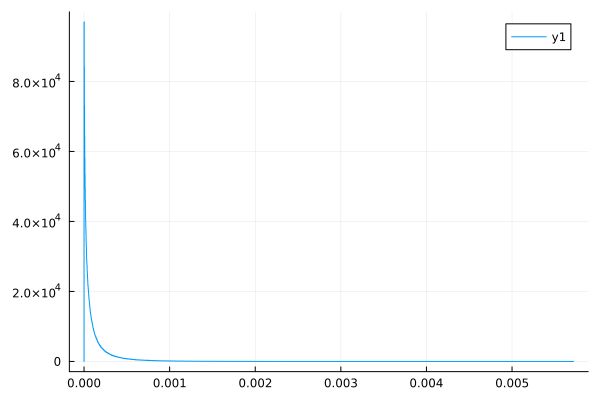

In [ ]:
histogram(ens,)

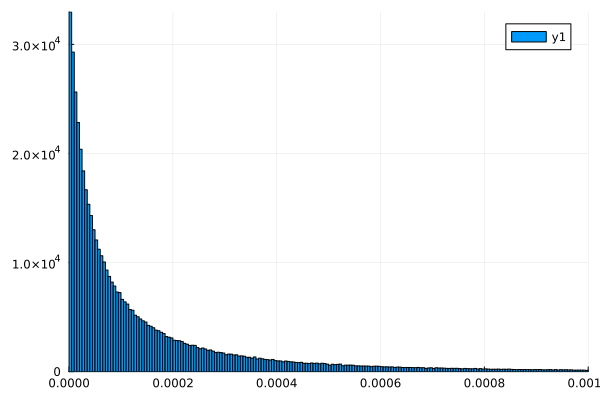

In [ ]:
histogram(ens,xlims=(0,0.001))

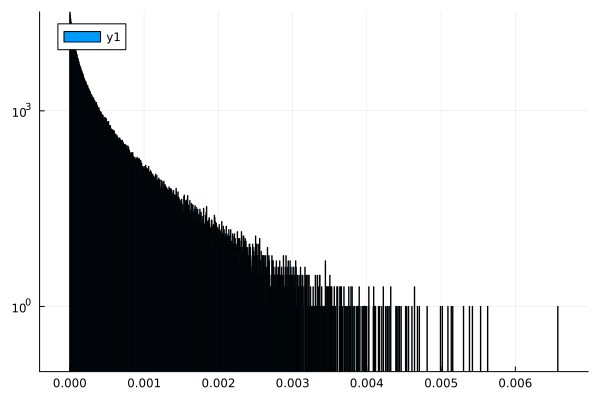

In [ ]:
histogram(ens,yscale=:log10)

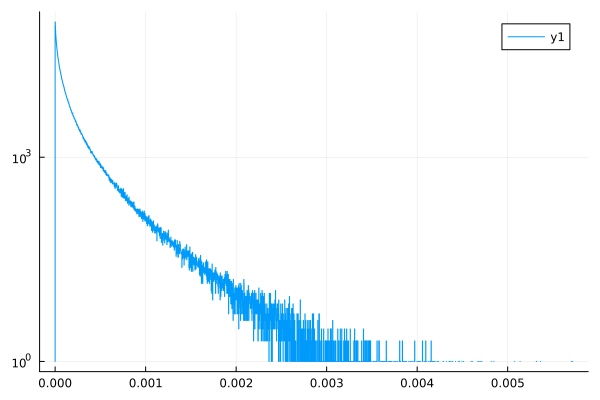

In [ ]:
histogram(ens,yscale=:log10)

In [ ]:
sum(abs.(prod(rdm)))

2.3196584781150302

In [ ]:
# rdm=CT.get_reduced_DM(dm,ct,[0,0,1,-1],[0,0,1,-1])
rdm=CT.get_reduced_DM(dm,ct,[1,-1,-1,-1,-1,-1,-1,-1,-1,-1],[1,-1,-1,-1,-1,-1,-1,-1,-1,-1],ct.L)

MPO
[1] ((dim=1|id=473|"Link,l=1"),)
[2] ((dim=2|id=126|"Qubit,Site,n=2")', (dim=2|id=126|"Qubit,Site,n=2"), (dim=4|id=624|"Link,l=2"), (dim=1|id=473|"Link,l=1"))
[3] ((dim=2|id=758|"Qubit,Site,n=3")', (dim=2|id=758|"Qubit,Site,n=3"), (dim=16|id=278|"Link,l=3"), (dim=4|id=624|"Link,l=2"))
[4] ((dim=2|id=448|"Qubit,Site,n=4")', (dim=2|id=448|"Qubit,Site,n=4"), (dim=36|id=313|"Link,l=4"), (dim=16|id=278|"Link,l=3"))
[5] ((dim=2|id=334|"Qubit,Site,n=5")', (dim=2|id=334|"Qubit,Site,n=5"), (dim=36|id=109|"Link,l=5"), (dim=36|id=313|"Link,l=4"))
[6] ((dim=2|id=924|"Qubit,Site,n=6")', (dim=2|id=924|"Qubit,Site,n=6"), (dim=36|id=316|"Link,l=6"), (dim=36|id=109|"Link,l=5"))
[7] ((dim=2|id=365|"Qubit,Site,n=7")', (dim=2|id=365|"Qubit,Site,n=7"), (dim=36|id=181|"Link,l=7"), (dim=36|id=316|"Link,l=6"))
[8] ((dim=2|id=277|"Qubit,Site,n=8")', (dim=2|id=277|"Qubit,Site,n=8"), (dim=16|id=583|"Link,l=8"), (dim=36|id=181|"Link,l=7"))
[9] ((dim=2|id=72|"Qubit,Site,n=9")', (dim=2|id=72|"Qubit,Site,n=9"), 

In [ ]:
sum(array(prod(ct.mps)))

-1.1293369322415947

In [ ]:
I=ITensor(1.)

for i in 1:ct.L
    I*=ct.mps[i]*ITensor([1.,1.],ct.qubit_site[i])
end


In [ ]:
rdm[1]

ITensor ord=1 (dim=1|id=672|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}

4-element Vector{Vector{Index{Int64}}}:
 []
 []
 [(dim=2|id=650|"Qubit,Site,n=3")']
 [(dim=2|id=686|"Qubit,Site,n=4")', (dim=2|id=686|"Qubit,Site,n=4")]

In [ ]:
CT.sum_of_norm_MPS(rdm)

0.08777937783562975

In [ ]:
CT.sum_of_norm_tensor(rdm)

In [ ]:
I=ITensor(1.)
site_idx=siteinds(rdm)
for i in 1:length(rdm)
    I*=rdm[i]
    for ind in site_idx[i]
        I*=ITensor([1.,1.],ind)
    end
    # I*=rdm[i]*ITensor([1.,1.],ct.qubit_site[i])
end


In [ ]:
scalar(I)

-0.07711648956857861

In [ ]:
sum(array(prod(rdm)))

-0.07711648956857861

In [ ]:
rdm[2].tensor.

Dim 1: (dim=2|id=333|"Qubit,Site,n=2")'
Dim 2: (dim=2|id=333|"Qubit,Site,n=2")
Dim 3: (dim=1|id=850|"Link,l=2")
Dim 4: (dim=1|id=963|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×1×1
[:, :, 1, 1] =
  0.8430389274533336  -0.3637640639915669
 -0.3637640639915793   0.15696107254667593

In [ ]:
(@doc tr)

```
tr(M)
```

Matrix trace. Sums the diagonal elements of `M`.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> tr(A)
5
```


In [ ]:
tr(dm)

1.0

In [ ]:
tr(rdm[2])

ITensor ord=2 (dim=1|id=850|"Link,l=2") (dim=1|id=963|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
rdm

MPO
[1] ((dim=1|id=963|"Link,l=1"),)
[2] ((dim=2|id=333|"Qubit,Site,n=2")', (dim=2|id=333|"Qubit,Site,n=2"), (dim=1|id=850|"Link,l=2"), (dim=1|id=963|"Link,l=1"))
[3] ((dim=1|id=772|"Link,l=3"), (dim=1|id=850|"Link,l=2"))
[4] ((dim=1|id=772|"Link,l=3"),)


In [ ]:
rdm[2]

ITensor ord=4 (dim=2|id=333|"Qubit,Site,n=2")' (dim=2|id=333|"Qubit,Site,n=2") (dim=1|id=850|"Link,l=2") (dim=1|id=963|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
tr(rdm[2])

ITensor ord=2 (dim=1|id=850|"Link,l=2") (dim=1|id=963|"Link,l=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
rdm

MPO
[1] ((dim=1|id=963|"Link,l=1"),)
[2] ((dim=2|id=333|"Qubit,Site,n=2")', (dim=2|id=333|"Qubit,Site,n=2"), (dim=1|id=850|"Link,l=2"), (dim=1|id=963|"Link,l=1"))
[3] ((dim=1|id=772|"Link,l=3"), (dim=1|id=850|"Link,l=2"))
[4] ((dim=1|id=772|"Link,l=3"),)


In [ ]:
scalar

scalar (generic function with 1 method)

In [ ]:
scalar(prod(rdm))

DimensionMismatch: DimensionMismatch: In scalar(T) or T[], ITensor T is not a scalar (it has indices ((dim=2|id=333|"Qubit,Site,n=2")', (dim=2|id=333|"Qubit,Site,n=2"))).

In [ ]:
CT.trace(rdm)

0.019396273460563843

In [ ]:
(prod(CT.trace(rdm)))[]

0.3413110277782314

In [ ]:
array(prod(CT.trace(rdm)))

0-dimensional Array{Float64, 0}:
0.3413110277782314

In [ ]:
CT.has_site(rdm[4])

false

In [ ]:
CT.has_site(rdm[2])

true

In [ ]:
# function get_reduced_DM_test(ct::CT_MPS,ket_index::Vector{Union{Nothing,Int}},bra_index::Vector{Union{Nothing,Int}})
#     rdm=MPO(ct.qubit_site)
#     for idx in 1:ct.L
#         ket_leg = ct.qubit_site[ct.phy_ram[ct.phy_list[idx]]]
#         bra_leg = ket_leg'
#         if ket_index[idx] !=  nothing
#             rdm[idx]=dm[idx]* state(ket_leg,ket_index[idx]+1)
#         else
#             rdm[idx]=dm[idx]
#         end
#         if bra_index[idx] !=  nothing
#             rdm[idx]=rdm[idx]* state(bra_leg,bra_index[idx]+1)
#         end
#     end
#     truncate!(rdm,cutoff=ct._cutoff)
#     return rdm
# end

UndefVarError: UndefVarError: `CT_MPS` not defined

In [ ]:
rdm

MPS
[1] ((dim=1|id=34|"Link,l=1"),)
[2] ((dim=1|id=86|"Link,l=2"), (dim=1|id=34|"Link,l=1"))
[3] ((dim=1|id=144|"Link,l=3"), (dim=1|id=86|"Link,l=2"))
[4] ((dim=2|id=27|"Qubit,Site,n=4")', (dim=2|id=27|"Qubit,Site,n=4"), (dim=1|id=144|"Link,l=3"))


In [ ]:
array(prod(rdm))

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  0.0

In [ ]:
rdm=ITensor(1.)
for (ket_idx,ket) in enumerate(ket_index)
    if ket!=nothing
        leg = ct.qubit_site[ct.phy_ram[ct.phy_list[ket_idx]]]
        rdm *= dm[ket_idx] * state(leg,ket+1)
    end
end
for (bra_idx,bra) in enumerate(ket_index)
    if bra!=nothing
        leg = ct.qubit_site[ct.phy_ram[ct.phy_list[bra_idx]]]
        rdm *= dm[bra_idx] * (state(leg',bra+1))
    end
end

In [ ]:
rdm

ITensor ord=8 (dim=2|id=556|"Qubit,Site,n=1")' (dim=2|id=837|"Qubit,Site,n=2")' (dim=2|id=968|"Qubit,Site,n=3")' (dim=2|id=589|"Qubit,Site,n=4")' (dim=2|id=556|"Qubit,Site,n=1") (dim=2|id=837|"Qubit,Site,n=2") (dim=2|id=968|"Qubit,Site,n=3") (dim=2|id=589|"Qubit,Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
rdm[1,1,1,2,1,1,1,2]

1.0

In [ ]:
for (idx,ket) in enumerate(ket_index)
    println(idx,' ',ket)
end

1 0
2 0
3 1
4 nothing


In [ ]:
CT.random_control!(ct,ct.L-1,0,1)

4

In [ ]:
ct.op_history

1-element Vector{Vector{Any}}:
 [Dict{String, Any}("Site" => [3, 4], "Outcome" => nothing, "Type" => "Bernoulli"), Dict{String, Any}("Site" => [3], "Outcome" => [0], "Type" => "Projection"), Dict{String, Any}("Site" => [4], "Outcome" => [1], "Type" => "Projection")]

In [ ]:
CT.display_mps_element(ct)

RAM =>Physical
0000=>0000: 2.5332176808113574e-17 + 2.271375338732468e-17im
0001=>0010: 0.0 - 0.0im
0010=>0100: 4.077532757967817e-18 + 7.435287215057786e-18im
0011=>0110: 0.0 - 0.0im
0100=>0001: -0.27577790568410315 + 0.22293783545169354im
0101=>0011: 0.0 + 0.0im
0110=>0101: 0.5128644568785712 - 0.4743825357395339im
0111=>0111: -0.0 + 0.0im
1000=>1000: -2.2189173723501103e-18 - 1.8802054402841402e-17im
1001=>1010: 0.0 + 0.0im
1010=>1100: -7.281985658380917e-18 + 2.8241426925234205e-18im
1011=>1110: 0.0 + 0.0im
1100=>1001: -0.1351360208586401 + 0.07524601230347149im
1101=>1011: 0.0 + 0.0im
1110=>1101: -0.5526266763343803 + 0.23844617216285174im
1111=>1111: 0.0 + 0.0im


In [ ]:
z[1] == "1"

true

In [ ]:
CT.dw(ct,1)

2-element Vector{Float64}:
 2.5680412792037233
 7.835889539528038

In [ ]:
inner(ct.mps',ct.dw[1][1],ct.mps)

3.0000000000000013

In [ ]:
inner(ct.mps',ct.dw[2][1],ct.mps)

9.000000000000004

In [ ]:
CT.display_mps_element(ct)

RAM =>Physical
0000=>0000: 0.0
0001=>0001: 0.0
0010=>0010: 0.0
0011=>0011: 0.0
0100=>0100: 0.0
0101=>0101: 0.0
0110=>0110: 0.0
0111=>0111: 1.0
1000=>1000: 0.0
1001=>1001: 0.0
1010=>1010: 0.0
1011=>1011: 0.0
1100=>1100: 0.0
1101=>1101: 0.0
1110=>1110: 0.0
1111=>1111: 0.0


In [ ]:
CT.mps_element(mps1,"0010")

1.0

In [ ]:
ct.mps=(ct.mps+mps1)/sqrt(2)

MPS
[1] ((dim=2|id=14|"Qubit,Site,n=1"), (dim=2|id=533|"Link,l=1"))
[2] ((dim=2|id=966|"Qubit,Site,n=2"), (dim=2|id=990|"Link,l=2"), (dim=2|id=533|"Link,l=1"))
[3] ((dim=2|id=820|"Qubit,Site,n=3"), (dim=2|id=343|"Link,l=3"), (dim=2|id=990|"Link,l=2"))
[4] ((dim=2|id=847|"Qubit,Site,n=4"), (dim=2|id=343|"Link,l=3"))


In [ ]:
i=1
for idx in 1:div(ct.L^2,4)
    # for idx in 1:1
    println(idx)
    i=CT.random_control!(ct,i,1)
    # ram_usage[idx+1]=Base.summarysize(ct.mps)
    # max_bond[idx+1]=CT.max_bond_dim(ct.mps)
end

1
2
3
4


In [ ]:
ct.ram_phy

4-element Vector{Int64}:
 1
 4
 2
 3

In [ ]:
ct.phy_ram

4-element Vector{Int64}:
 1
 3
 4
 2

In [ ]:
ct.phy_list

4-element Vector{Int64}:
 1
 2
 3
 4

In [ ]:
CT.ZZ(ct)

0.09770158787907125

In [ ]:
CT.Z(ct)

0.1703412712289321

In [ ]:
ct.xj

Set{Rational{Int64}} with 2 elements:
  2//3
  1//3

In [ ]:
CT.max_bond_dim(ct.mps)

1

In [ ]:
CT.order_parameter(ct)

0.1703412712289321

In [ ]:
opsum = OpSum()
add!(opsum,"Sz",2,)
sites = siteinds("S=1/2",2)
H = MPO(opsum,sites)

MPO
[1] ((dim=2|id=711|"Link,l=1"), (dim=2|id=438|"S=1/2,Site,n=1")', (dim=2|id=438|"S=1/2,Site,n=1"))
[2] ((dim=2|id=711|"Link,l=1"), (dim=2|id=189|"S=1/2,Site,n=2")', (dim=2|id=189|"S=1/2,Site,n=2"))


In [ ]:
H[1]

ITensor ord=3 (dim=2|id=711|"Link,l=1") (dim=2|id=438|"S=1/2,Site,n=1")' (dim=2|id=438|"S=1/2,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
Array(H[1],)

DimensionMismatch: DimensionMismatch: cannot convert an 3 dimensional ITensor to an 0-dimensional Array.

In [ ]:
H[2]

ITensor ord=3 (dim=2|id=711|"Link,l=1") (dim=2|id=189|"S=1/2,Site,n=2")' (dim=2|id=189|"S=1/2,Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
H_p=prod(H)

ITensor ord=4 (dim=2|id=417|"S=1/2,Site,n=1")' (dim=2|id=417|"S=1/2,Site,n=1") (dim=2|id=134|"S=1/2,Site,n=2")' (dim=2|id=134|"S=1/2,Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
sites

2-element Vector{Index{Int64}}:
 (dim=2|id=438|"S=1/2,Site,n=1")
 (dim=2|id=189|"S=1/2,Site,n=2")

In [ ]:
U,S,V=svd(H_p,sites[1])

ITensors.TruncSVD(ITensor ord=1
Dim 1: (dim=1|id=861|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}
 1-element
 -1.0, ITensor ord=2
Dim 1: (dim=1|id=861|"Link,u")
Dim 2: (dim=1|id=462|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}
 1×1
 1.0, ITensor ord=5
Dim 1: (dim=2|id=417|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=417|"S=1/2,Site,n=1")
Dim 3: (dim=2|id=134|"S=1/2,Site,n=2")'
Dim 4: (dim=2|id=134|"S=1/2,Site,n=2")
Dim 5: (dim=1|id=462|"Link,v")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2×1
[:, :, 1, 1, 1] =
 -0.5   0.0
  0.0  -0.5

[:, :, 2, 1, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2, 1] =
 0.5  0.0
 0.0  0.5, Spectrum{Vector{Float64}, Float64}([1.0], 0.0), (dim=1|id=861|"Link,u"), (dim=1|id=462|"Link,v"))

In [ ]:
row_indices = [prime(site, 1) for site in sites]
col_indices = [site for site in sites] 

2-element Vector{Index{Int64}}:
 (dim=2|id=417|"S=1/2,Site,n=1")
 (dim=2|id=134|"S=1/2,Site,n=2")

In [ ]:
ct.phy_ram,ct.phy_list

([1, 3, 4, 2], [1, 2, 3, 4])

In [ ]:
CT.add1(1,ct.L,ct.phy_ram,ct.phy_list)

sum(
  1.0 X(1,) S+(2,) S+(3,) S+(4,)
  1.0 S-(2,) S+(3,) S+(4,)
  1.0 S-(3,) S+(4,)
  1.0 S-(4,)
)

In [ ]:
CT.dw_FM(1,ct.L,ct.phy_ram,ct.phy_list)

sum(
  4.0 Proj1(1,)
  3.0 Proj0(1,) Proj1(2,)
  2.0 Proj0(1,) Proj0(2,) Proj1(3,)
  1.0 Proj0(1,) Proj0(2,) Proj0(3,) Proj1(4,)
)

In [ ]:
dw_mpo=MPO(CT.dw_FM(1,ct.L,ct.phy_ram,ct.phy_list,4),ct.qubit_site
)
(inner(ct.mps',dw_mpo,ct.mps,))

1.0

In [ ]:
add1_mpo=MPO(CT.add1(1,ct.L,ct.phy_ram,ct.phy_list),ct.qubit_site)

MPO
[1] ((dim=3|id=155|"Link,l=1"), (dim=2|id=14|"Qubit,Site,n=1")', (dim=2|id=14|"Qubit,Site,n=1"))
[2] ((dim=3|id=155|"Link,l=1"), (dim=3|id=369|"Link,l=2"), (dim=2|id=966|"Qubit,Site,n=2")', (dim=2|id=966|"Qubit,Site,n=2"))
[3] ((dim=3|id=369|"Link,l=2"), (dim=3|id=861|"Link,l=3"), (dim=2|id=820|"Qubit,Site,n=3")', (dim=2|id=820|"Qubit,Site,n=3"))
[4] ((dim=3|id=861|"Link,l=3"), (dim=2|id=847|"Qubit,Site,n=4")', (dim=2|id=847|"Qubit,Site,n=4"))


In [ ]:
mps1=apply(add1_mpo,ct.mps)

MPS
[1] ((dim=1|id=469|"Link,l=1"), (dim=2|id=14|"Qubit,Site,n=1"))
[2] ((dim=2|id=966|"Qubit,Site,n=2"), (dim=1|id=144|"Link,l=2"), (dim=1|id=469|"Link,l=1"))
[3] ((dim=2|id=820|"Qubit,Site,n=3"), (dim=1|id=75|"Link,l=3"), (dim=1|id=144|"Link,l=2"))
[4] ((dim=2|id=847|"Qubit,Site,n=4"), (dim=1|id=75|"Link,l=3"))


In [ ]:
[((i==i1) ? "X" : "S+",phy_ram[phy_list[i]]) for i in 1:L]

1

In [ ]:
collect(1:1)

1-element Vector{Int64}:
 1

In [ ]:
H_p

ITensor ord=4 (dim=2|id=417|"S=1/2,Site,n=1")' (dim=2|id=417|"S=1/2,Site,n=1") (dim=2|id=134|"S=1/2,Site,n=2")' (dim=2|id=134|"S=1/2,Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
zz=reshape(Array(H_p,row_indices,col_indices),4,4)

4×4 Matrix{Float64}:
 0.5  0.0   0.0   0.0
 0.0  0.5   0.0   0.0
 0.0  0.0  -0.5   0.0
 0.0  0.0   0.0  -0.5

In [ ]:
MPO(zz,sites)

DimensionMismatch: DimensionMismatch: In ITensor(::AbstractArray, inds), length of AbstractArray (16) must match total dimension of IndexSet (4)

In [ ]:
function matrix_to_mpo(matrix, sites)
    # Assume `matrix` is already in the correct Kronecker product form
    # Convert the matrix into an ITensor
    itensor_matrix = itensor(matrix, sites)

    # Convert the ITensor to an MPO
    mpo = MPO(itensor_matrix, sites)
    return mpo
end

matrix_to_mpo (generic function with 1 method)

In [ ]:

# Example setup for a two-qubit system
N = 2  # Number of sites
# sites = siteinds("S=1/2", N)  # Spin-1/2 sites

# Define your matrix (for demonstration, using an identity matrix)
# For I ⊗ σz
matrix = H_p

# Convert to MPO
mpo = matrix_to_mpo(matrix, sites)
println(mpo)

ErrorException: ITensor constructor with input arguments of types `(ITensor, Vector{Index{Int64}})` not defined.

In [ ]:
typeof(sites)

Vector{Index{Int64}} (alias for Array{Index{Int64}, 1})

In [ ]:
typeof(H_p)

ITensor

In [ ]:
MPO(H_p,sites,prime(sites))

MethodError: MethodError: Cannot `convert` an object of type ITensor to an object of type Vector{ITensor}

Closest candidates are:
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}) where {S, T, N}
   @ StaticArrays ~/.julia/packages/StaticArrays/eGKzB/src/SizedArray.jl:88
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}) where {T, S, N}
   @ StaticArrays ~/.julia/packages/StaticArrays/eGKzB/src/SizedArray.jl:82
  convert(::Type{T}, !Matched::T) where T
   @ Base Base.jl:84
  ...


In [ ]:
sites(H_p)

MethodError: MethodError: objects of type Vector{Index{Int64}} are not callable
Use square brackets [] for indexing an Array.

In [ ]:
H_p


ITensor ord=4 (dim=2|id=417|"S=1/2,Site,n=1")' (dim=2|id=417|"S=1/2,Site,n=1") (dim=2|id=134|"S=1/2,Site,n=2")' (dim=2|id=134|"S=1/2,Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
full_matrix = reshape(Array(H_p,row_indices,col_indices), row_indices, col_indices)


MethodError: MethodError: no method matching reshape(::Array{Float64, 8}, ::Vector{Index{Int64}}, ::Vector{Index{Int64}})

Closest candidates are:
  reshape(!Matched::ChainRulesCore.AbstractThunk, ::Any...)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/UrpQe/src/tangent_types/thunks.jl:58
  reshape(!Matched::ChainRulesCore.AbstractZero, ::Any...)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/UrpQe/src/tangent_types/abstract_zero.jl:45
  reshape(!Matched::Block{NT}, ::Any, ::Any) where NT
   @ NDTensors ~/.julia/packages/NDTensors/bK5Ns/src/blocksparse/blocksparsetensor.jl:613
  ...


In [ ]:
CT.mps_element(ct.mps,"01011"),CT.mps_element(ct.mps,"10101")

(-5.955012514003781e-19, -0.0)

In [ ]:
@time CT.S!(ct,1,MersenneTwister(1),builtin=true)

  0.003949 seconds (3.37 k allocations: 850.664 KiB)


In [ ]:
ct_1=CT.CT_MPS(L=10,seed=3,folded=true,store_op=true,store_vec=true,ancilla=0)

CT.CT_MPS(10, true, true, false, 3, nothing, nothing, nothing, Set(Rational{Int64}[2//3, 1//3]), 1.0e-10, 0, true, MersenneTwister(3, (0, 2004, 1002, 297)), MersenneTwister(3, (0, 2004, 1002, 297)), MersenneTwister(3, (0, 2004, 1002, 297)), Index{Int64}[(dim=2|id=592|"Qubit,Site,n=1"), (dim=2|id=297|"Qubit,Site,n=2"), (dim=2|id=694|"Qubit,Site,n=3"), (dim=2|id=81|"Qubit,Site,n=4"), (dim=2|id=643|"Qubit,Site,n=5"), (dim=2|id=971|"Qubit,Site,n=6"), (dim=2|id=847|"Qubit,Site,n=7"), (dim=2|id=502|"Qubit,Site,n=8"), (dim=2|id=724|"Qubit,Site,n=9"), (dim=2|id=653|"Qubit,Site,n=10")], [1, 3, 5, 7, 9, 10, 8, 6, 4, 2], [1, 10, 2, 9, 3, 8, 4, 7, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 10, 1.0e-10, MPS
[1] ((dim=2|id=592|"Qubit,Site,n=1"), (dim=10|id=662|"Link,l=1"))
[2] ((dim=10|id=662|"Link,l=1"), (dim=2|id=297|"Qubit,Site,n=2"), (dim=10|id=393|"Link,l=2"))
[3] ((dim=10|id=393|"Link,l=2"), (dim=2|id=694|"Qubit,Site,n=3"), (dim=10|id=301|"Link,l=3"))
[4] ((dim=10|id=301|"Link,l=3"), (dim=2|id=81

In [ ]:
@time CT.S!(ct_1,1,MersenneTwister(1),builtin=false)

  0.001401 seconds (956 allocations: 269.531 KiB)


In [ ]:
Array(CT.mps_to_tensor(ct_1.mps),ct_1.qubit_site)

In [ ]:
norm(array(prod(ct.mps))-array(prod(ct_1.mps)))

4.511147449818972e-16

In [ ]:
os=OpSum()

sum(

)

In [ ]:
function ITensors.op(::OpName"NOT",::SiteType"Qubit",s::Index) 
    mat = [0 1.; 1. 0]
    return itensor(mat,s,s')
end
function ITensors.op(::OpName"Iden",::SiteType"Qubit",s::Index) 
    mat = [1. 0; 0 1.]
    return itensor(mat,s,s')
end

In [ ]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
os=OpSum()
os+=("NOT",1)
os+=("NOT",2)
os+=("NOT",3)
os+=("NOT",4)

sum(
  1.0 NOT(1,)
  1.0 NOT(2,)
  1.0 NOT(3,)
  1.0 NOT(4,)
)

In [ ]:
tuple(([("X",i) for i in 1:4]...)...)

("X", 1, "X", 2, "X", 3, "X", 4)

In [ ]:
os=OpSum()
os.+=("NOT",1,"NOT",2)
os.+=("NOT",2,"NOT",3)
os.+=("NOT",3,"NOT",4)

sum(
  1.0 NOT(1,) NOT(2,)
  1.0 NOT(2,) NOT(3,)
  1.0 NOT(3,) NOT(4,)
)

In [ ]:
os=ops([("NOT",1),("NOT",2),("Iden",3),("Iden",4)],ct.qubit_site)

In [ ]:
os=ops([("NOT", n) for n in 1:4],ct.qubit_site)

In [ ]:
A1=OpSum()
A1+=tuple(([((i==1) ? "X" : "S+",i) for i in 1:ct.L]...)...)
for j in 2:ct.L
    A1+=tuple(([((i==j) ? "S-" : "S+",i) for i in j:ct.L]...)...)
end

In [ ]:
[1,2] .>>1

2-element Vector{Int64}:
 0
 1

In [ ]:
length(mpo)

4

In [ ]:
z=[0,1]

2-element Vector{Int64}:
 0
 1

In [ ]:
z

2-element Vector{Int64}:
 0
 1

In [ ]:
z.>>=1

2-element Vector{Int64}:
 0
 1

In [ ]:
z=fill(mpo,2)

2-element Vector{MPO}:
 MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))

 MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [ ]:
z[1]=mpo

MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [ ]:
mpos=CT.power_mpo(mpo,[3,5])

[3, 5]1:3 in [3, 5]
2:5 in [3, 5]
1:1 in [1, 2]
2:1 in [0, 1]


2-element Vector{MPO}:
 MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=591|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=3|id=305|"Link,l=2"), (dim=2|id=591|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=986|"Link,l=3"), (dim=3|id=305|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=986|"Link,l=3"))

 MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=743|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=2|id=542|"Link,l=2"), (dim=2|id=743|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=48|"Link,l=3"), (dim=2|id=542|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=48|"Link,l=3"))


In [ ]:
A1

sum(
  1.0 X(1,) S+(2,) S+(3,) S+(4,)
  1.0 S-(2,) S+(3,) S+(4,)
  1.0 S-(3,) S+(4,)
  1.0 S-(4,)
)

In [ ]:
mpo=MPO(A1,ct.qubit_site)

MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [ ]:
1*mpo
    

MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [ ]:
mpo5=power_mpo(mpo,5)

MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=643|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=2|id=560|"Link,l=2"), (dim=2|id=643|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=717|"Link,l=3"), (dim=2|id=560|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=717|"Link,l=3"))


In [ ]:
mpo3=apply(mpo,mpo,mpo)

MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=523|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=3|id=276|"Link,l=2"), (dim=2|id=523|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=714|"Link,l=3"), (dim=3|id=276|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=714|"Link,l=3"))


In [ ]:
array(mpo[3])[3,1,:,:]

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [ ]:
array(mpo[1])[1,:,:]

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [ ]:
CT.add1(1,ct.L,ct.phy_ram)

sum(
  1.0 X(1,) S+(2,) S+(3,) S+(4,)
  1.0 S-(2,) S+(3,) S+(4,)
  1.0 S-(3,) S+(4,)
  1.0 S-(4,)
)

In [ ]:
CT.add1(4,ct.L,ct.phy_ram)

sum(
  1.0 S+(1,) S+(2,) S+(3,) X(4,)
  1.0 S-(1,) S+(2,) S+(3,)
  1.0 S-(2,) S+(3,)
  1.0 S-(3,)
)

In [ ]:
ct.ram_phy

5-element Vector{Int64}:
 5
 1
 4
 2
 3

In [ ]:
CT.add1(1,ct.L,ct.phy_ram,ct.phy_list)

sum(
  1.0 X(2,) S+(4,) S+(5,) S+(3,)
  1.0 S-(4,) S+(5,) S+(3,)
  1.0 S-(5,) S+(3,)
  1.0 S-(3,)
)

In [ ]:
# adder_mpo=CT.adder_MPO(ct.xj,ct.qubit_site,ct.L)
adder_mpo= MPO(CT.add1(1,ct.L,ct.phy_ram,ct.phy_list),ct.qubit_site)

MPO
[1] ((dim=2|id=736|"Link,l=1"), (dim=2|id=182|"Qubit,Site,n=1")', (dim=2|id=182|"Qubit,Site,n=1"))
[2] ((dim=2|id=736|"Link,l=1"), (dim=3|id=4|"Link,l=2"), (dim=2|id=942|"Qubit,Site,n=2")', (dim=2|id=942|"Qubit,Site,n=2"))
[3] ((dim=3|id=4|"Link,l=2"), (dim=4|id=464|"Link,l=3"), (dim=2|id=571|"Qubit,Site,n=3")', (dim=2|id=571|"Qubit,Site,n=3"))
[4] ((dim=4|id=464|"Link,l=3"), (dim=4|id=695|"Link,l=4"), (dim=2|id=310|"Qubit,Site,n=4")', (dim=2|id=310|"Qubit,Site,n=4"))
[5] ((dim=4|id=695|"Link,l=4"), (dim=2|id=248|"Qubit,Site,n=5")', (dim=2|id=248|"Qubit,Site,n=5"))


In [ ]:
ct.mps=apply(adder_mpo,ct.mps;cutoff=ct._cutoff)
normalize!(ct.mps)
truncate!(ct.mps, cutoff=ct._cutoff)

MPS
[1] ((dim=2|id=182|"Qubit,Site,n=1"), (dim=1|id=775|"Link,l=1"))
[2] ((dim=2|id=942|"Qubit,Site,n=2"), (dim=1|id=954|"Link,l=2"), (dim=1|id=775|"Link,l=1"))
[3] ((dim=2|id=571|"Qubit,Site,n=3"), (dim=1|id=839|"Link,l=3"), (dim=1|id=954|"Link,l=2"))
[4] ((dim=2|id=310|"Qubit,Site,n=4"), (dim=1|id=992|"Link,l=4"), (dim=1|id=839|"Link,l=3"))
[5] ((dim=2|id=248|"Qubit,Site,n=5"), (dim=1|id=992|"Link,l=4"))


In [ ]:
CT.display_mps_element(ct)

RAM =>Physical
0000=>0000: 0.0
0001=>0001: 1.0
0010=>0010: 0.0
0011=>0011: 0.0
0100=>0100: 0.0
0101=>0101: 0.0
0110=>0110: 0.0
0111=>0111: 0.0
1000=>1000: 0.0
1001=>1001: 0.0
1010=>1010: 0.0
1011=>1011: 0.0
1100=>1100: 0.0
1101=>1101: 0.0
1110=>1110: 0.0
1111=>1111: 0.0


In [ ]:
for i in 1:2^(ct.L+ct.ancilla)
    bitstring=lpad(string(i-1,base=2),ct.L+ct.ancilla,"0")
    matele=CT.mps_element(ct.mps,bitstring)
    println(bitstring, "=>", bitstring[ct.phy_ram],": ",matele)
end

0000=>0000: 0.0
0001=>0001: 1.0
0010=>0010: 0.0
0011=>0011: 0.0
0100=>0100: 0.0
0101=>0101: 0.0
0110=>0110: 0.0
0111=>0111: 0.0
1000=>1000: 0.0
1001=>1001: 0.0
1010=>1010: 0.0
1011=>1011: 0.0
1100=>1100: 0.0
1101=>1101: 0.0
1110=>1110: 0.0
1111=>1111: 0.0


In [ ]:
array(op("I",ct.qubit_site[1]))

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [ ]:
CT.mps_element(ct.mps,"0000001000")

1.0000000000000004

In [ ]:
mpo_c=copy(mpo)

MPO
[1] ((dim=3|id=224|"Link,l=1"), (dim=2|id=654|"Qubit,Site,n=1")', (dim=2|id=654|"Qubit,Site,n=1"))
[2] ((dim=3|id=224|"Link,l=1"), (dim=3|id=945|"Link,l=2"), (dim=2|id=440|"Qubit,Site,n=2")', (dim=2|id=440|"Qubit,Site,n=2"))
[3] ((dim=3|id=945|"Link,l=2"), (dim=3|id=43|"Link,l=3"), (dim=2|id=190|"Qubit,Site,n=3")', (dim=2|id=190|"Qubit,Site,n=3"))
[4] ((dim=3|id=43|"Link,l=3"), (dim=3|id=981|"Link,l=4"), (dim=2|id=277|"Qubit,Site,n=4")', (dim=2|id=277|"Qubit,Site,n=4"))
[5] ((dim=3|id=981|"Link,l=4"), (dim=3|id=601|"Link,l=5"), (dim=2|id=640|"Qubit,Site,n=5")', (dim=2|id=640|"Qubit,Site,n=5"))
[6] ((dim=3|id=601|"Link,l=5"), (dim=3|id=201|"Link,l=6"), (dim=2|id=656|"Qubit,Site,n=6")', (dim=2|id=656|"Qubit,Site,n=6"))
[7] ((dim=3|id=201|"Link,l=6"), (dim=3|id=446|"Link,l=7"), (dim=2|id=933|"Qubit,Site,n=7")', (dim=2|id=933|"Qubit,Site,n=7"))
[8] ((dim=3|id=446|"Link,l=7"), (dim=3|id=43|"Link,l=8"), (dim=2|id=745|"Qubit,Site,n=8")', (dim=2|id=745|"Qubit,Site,n=8"))
[9] ((dim=3|id=43|

In [ ]:
let
    L=4
    bin(i)=lpad(string(i,base=2),L,"0")
    bin(trunc(Int,2^L/6)+1),bin(trunc(Int,2^L/3))
end

("0011", "0101")

In [ ]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 2.22045e-16  -1.82461e-48
 1.0          -8.2173e-33

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

"0001"

In [ ]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
U=ITensor(reshape(collect(1:16),4,4),ct.qubit_site[1],ct.qubit_site[4],ct.qubit_site[1]',ct.qubit_site[4]')

ITensor ord=4 (dim=2|id=366|"Qubit,Site,n=1") (dim=2|id=378|"Qubit,Site,n=4") (dim=2|id=366|"Qubit,Site,n=1")' (dim=2|id=378|"Qubit,Site,n=4")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
CT.apply_op!(ct.mps,U,1e-10)

LoadError: UndefVarError: `U` not defined

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site)

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 -1.02333  -0.144472
 -4.02572   0.629657

[:, :, 2, 1] =
 0.942505  2.43831
 1.65148   4.62549

[:, :, 1, 2] =
  -7.02811  1.40379
 -10.0305   2.17791

[:, :, 2, 2] =
 2.36046  6.81267
 3.06944  8.99985

In [ ]:
function ITensors.op(::OpName"U1",::SiteType"Qubit",s::Index) 
    mat = [1. 2; 3 4]
    return itensor(mat,s,s')
end

In [ ]:
function ITensors.op(::OpName"CX",::SiteType"Qubit",s1::Index, s2::Index) 
    mat =  reshape(collect(1:16),4,4)
    return itensor(mat,s1,s2,s1',s2',   )
end

In [ ]:
op("U",ct.qubit_site[1])

ITensor ord=2 (dim=2|id=164|"Qubit,Site,n=1")' (dim=2|id=164|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
os = OpSum()+("U", ct.qubit_site[1])


sum(
  1.0 U((dim=2|id=164|"Qubit,Site,n=1"),)
)

In [ ]:
U_gate_eq=op(("CX"),ct_2.qubit_site[1],ct_2.qubit_site[2])

ITensor ord=4 (dim=2|id=293|"Qubit,Site,n=2")' (dim=2|id=706|"Qubit,Site,n=1")' (dim=2|id=293|"Qubit,Site,n=2") (dim=2|id=706|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
ct_2=CT.CT_MPS(L=4,seed=3,folded=false,store_op=true,store_vec=true,ancilla=0)

CT.CT_MPS(4, true, true, false, 3, nothing, nothing, nothing, Set(Rational{Int64}[2//3, 1//3]), 1.0e-10, 0, false, MersenneTwister(3, (0, 1002, 0, 104)), MersenneTwister(3, (0, 1002, 0, 104)), MersenneTwister(3, (0, 1002, 0, 104)), Index{Int64}[(dim=2|id=706|"Qubit,Site,n=1"), (dim=2|id=293|"Qubit,Site,n=2"), (dim=2|id=370|"Qubit,Site,n=3"), (dim=2|id=853|"Qubit,Site,n=4")], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], 10, 1.0e-10, MPS
[1] ((dim=2|id=706|"Qubit,Site,n=1"), (dim=8|id=540|"Link,l=1"))
[2] ((dim=8|id=540|"Link,l=1"), (dim=2|id=293|"Qubit,Site,n=2"), (dim=4|id=662|"Link,l=2"))
[3] ((dim=4|id=662|"Link,l=2"), (dim=2|id=370|"Qubit,Site,n=3"), (dim=2|id=430|"Link,l=3"))
[4] ((dim=2|id=430|"Link,l=3"), (dim=2|id=853|"Qubit,Site,n=4"))
, MPS[], Vector{Any}[], false)

In [ ]:
U_gate=op(("CX", 1,4),ct_2.qubit_site)

ITensor ord=4 (dim=2|id=853|"Qubit,Site,n=4")' (dim=2|id=706|"Qubit,Site,n=1")' (dim=2|id=853|"Qubit,Site,n=4") (dim=2|id=706|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
mps_new=apply(U_gate,ct_2.mps)

MPS
[1] ((dim=2|id=706|"Qubit,Site,n=1"), (dim=2|id=885|"Link,n=1"))
[2] ((dim=2|id=885|"Link,n=1"), (dim=2|id=293|"Qubit,Site,n=2"), (dim=4|id=76|"Link,n=1"))
[3] ((dim=4|id=76|"Link,n=1"), (dim=2|id=370|"Qubit,Site,n=3"), (dim=2|id=375|"Link,n=1"))
[4] ((dim=2|id=375|"Link,n=1"), (dim=2|id=853|"Qubit,Site,n=4"))


In [ ]:
Array(CT.mps_to_tensor(mps_new),ct_2.qubit_site)

LoadError: In `permute(::ITensor, inds...)`, the input ITensor has indices: 

((dim=2|id=705|"Qubit,Site,n=1"), (dim=2|id=464|"Qubit,Site,n=2"), (dim=2|id=850|"Qubit,Site,n=3"), (dim=2|id=775|"Qubit,Site,n=4"))

but the desired Index ordering is: 

Index{Int64}[(dim=2|id=753|"Qubit,Site,n=1"), (dim=2|id=760|"Qubit,Site,n=2"), (dim=2|id=109|"Qubit,Site,n=3"), (dim=2|id=493|"Qubit,Site,n=4")]

In [ ]:
1. test the speed of using apply and apply_op! in 
    (a) normal nearest neighbor sites
    (b) long range sites

2. test how to get MPO work here? thought this example seems that apply is already sufficient?
https://itensor.github.io/ITensors.jl/stable/tutorials/MPSTimeEvolution.html

In [ ]:
os=OpSum() + ("CX",1,4)

sum(
  1.0 CX(1, 4)
)

In [ ]:
MPO(os,ct.qubit_site)

In [ ]:
MPO(os,ct.qubit_site[1:1])

LoadError: MethodError: no method matching isless(::Int64, ::Index{Int64})

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m
[0m  isless(::Real, [91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m)
[0m[90m   @[39m [33mStatsBase[39m [90m~/.julia/packages/StatsBase/WLz8A/src/[39m[90m[4mstatmodels.jl:91[24m[39m
[0m  ...


In [ ]:
N = 4
sites = siteinds("S=1/2",N)
os = OpSum()
for n=1:2
  os += "Sz",n
end
P = MPO(os,sites)

MPO
[1] ((dim=2|id=358|"Link,l=1"), (dim=2|id=927|"S=1/2,Site,n=1")', (dim=2|id=927|"S=1/2,Site,n=1"))
[2] ((dim=2|id=358|"Link,l=1"), (dim=2|id=1|"Link,l=2"), (dim=2|id=274|"S=1/2,Site,n=2")', (dim=2|id=274|"S=1/2,Site,n=2"))
[3] ((dim=2|id=1|"Link,l=2"), (dim=2|id=121|"Link,l=3"), (dim=2|id=676|"S=1/2,Site,n=3")', (dim=2|id=676|"S=1/2,Site,n=3"))
[4] ((dim=2|id=121|"Link,l=3"), (dim=2|id=342|"S=1/2,Site,n=4")', (dim=2|id=342|"S=1/2,Site,n=4"))


In [ ]:
os

sum(
  1.0 Sz(1,)
  1.0 Sz(2,)
)

In [ ]:
ct_f=CT.CT_MPS(L=8,seed=3,folded=false,store_op=false,store_vec=false,ancilla=0,debug=false,)
# print((ct_f.mps))
ram_usage=zeros(div(ct_f.L^2,4)+1)
max_bond=zeros(Int64,div(ct_f.L^2,4)+1)
ram_usage[1]=Base.summarysize(ct_f.mps)
max_bond[1]=CT.max_bond_dim(ct_f.mps)
i=1
for idx in 1:div(ct_f.L^2,4)
# for idx in 1:1
    println(idx)
    i=CT.random_control!(ct_f,i,.3)
    ram_usage[idx+1]=Base.summarysize(ct_f.mps)
    max_bond[idx+1]=CT.max_bond_dim(ct_f.mps)
end

1
2
3
4
5
6
7
8
9
10


11
12
13
14
15
16
17
18


19
20
21
22
23
24
25


26
27


28
29
30
31
32
33
34
35
36
37


38
39
40


41
42
43
44
45
46
47


48
49


50
51


52
53


54
55


56
57


58
59


60


61
62


63
64
65


66
67
68
69
70
71


72
73
74


75


76


77


78


79
80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96
97
98
99


100


101


102


103


104


105
106
107
108


109


110
111
112


113


114


115
116


117
118


119


120


121


122


123
124
125


126


127
128
129


130


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146
147
148
149
150
151
152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174
175


176


177
178
179
180


181


182


183


184
185
186


187
188


189
190
191
192


193


In [ ]:
x=collect(0:div(ct_f.L^2,4))
p1=plot(x,ram_usage/1024^3,marker=:circle,xlabel="t",ylabel="RAM (GB)",color=:gray)
p1 = plot!(y_guidefontcolor=:gray,  y_foreground_color_axis=:gray, y_foreground_color_border=:gray, y_foreground_color_text=:gray)

p2=plot!(twinx(),x,max_bond,marker=:circle,ylabel="Max bond dim",color=:black,label="L=$(ct_f.L)")


In [ ]:
ram_usage[1]/1024^1,ram_usage[end]/1024^2, max_bond[end]

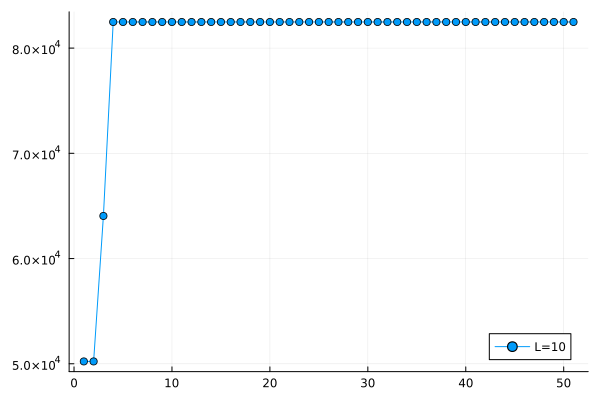

In [ ]:
plot(ram_usage,marker=:circle,label="L=$(ct_f.L)")

In [ ]:
ct_f.mps

MPS
[1] ((dim=2|id=20|"Qubit,Site,n=1"), (dim=2|id=165|"Link,l=1"))
[2] ((dim=2|id=165|"Link,l=1"), (dim=2|id=374|"Qubit,Site,n=2"), (dim=4|id=26|"Link,l=2"))
[3] ((dim=4|id=26|"Link,l=2"), (dim=8|id=775|"Link,l=3"), (dim=2|id=544|"Qubit,Site,n=3"))
[4] ((dim=2|id=697|"Qubit,Site,n=4"), (dim=16|id=693|"Link,l=4"), (dim=8|id=775|"Link,l=3"))
[5] ((dim=32|id=631|"Link,l=5"), (dim=2|id=646|"Qubit,Site,n=5"), (dim=16|id=693|"Link,l=4"))
[6] ((dim=2|id=188|"Qubit,Site,n=6"), (dim=32|id=24|"Link,l=6"), (dim=32|id=631|"Link,l=5"))
[7] ((dim=16|id=82|"Link,l=7"), (dim=2|id=943|"Qubit,Site,n=7"), (dim=32|id=24|"Link,l=6"))
[8] ((dim=2|id=287|"Qubit,Site,n=8"), (dim=8|id=842|"Link,l=8"), (dim=16|id=82|"Link,l=7"))
[9] ((dim=4|id=345|"Link,l=9"), (dim=2|id=171|"Qubit,Site,n=9"), (dim=8|id=842|"Link,l=8"))
[10] ((dim=2|id=880|"Qubit,Site,n=10"), (dim=2|id=128|"Link,l=10"), (dim=4|id=345|"Link,l=9"))
[11] ((dim=2|id=77|"Qubit,Site,n=11"), (dim=2|id=128|"Link,l=10"))


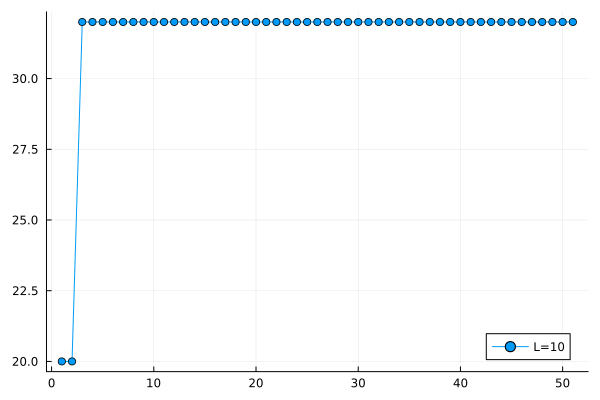

In [ ]:
plot(max_bond,marker=:circle,label="L=$(ct_f.L)")

In [ ]:
CT.random_control!(ct_f,1,0)

2

In [ ]:
reset_timer!(CT.to)
@show i=CT.random_control!(ct_f,i,0)

print_timer(CT.to)

InterruptException: InterruptException:

In [ ]:
Base.summarysize(ct_f.mps)/1024^3

0.07292763888835907

In [ ]:
using TimerOutputs

In [ ]:
reset_timer!(CT.to)

 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:      802ms /   0.0%           22.9MiB /   0.0%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 ────────────────────────────────────────────────────────────────────

In [ ]:
CT.to

 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:      844ms /   0.0%           23.3MiB /   0.0%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 ────────────────────────────────────────────────────────────────────

In [ ]:
@btime CT.inner_prob(ct_f,[0])

MethodError: MethodError: no method matching inner_prob(::CT.CT_MPS, ::Vector{Int64})

Closest candidates are:
  inner_prob(::CT.CT_MPS, ::Vector{Int64}, !Matched::Vector{Int64})
   @ CT /mnt/d/Rutgers/control_transition/CT/src/CT.jl:338


In [ ]:
@code_warntype CT.S!(ct_f,10,rng=ct_f.rng_C)

In [ ]:
@code_warntype CT.projector(ct_f,[0],[10])

In [ ]:
@code_warntype CT.inner_prob(ct_f,[0],[10])

In [ ]:
ct_f.phy_ram

In [ ]:
ct_f.phy_list

In [ ]:
sort(ct.phy_ram[ct.phy_list])

In [ ]:
(ct.phy_ram[ct.L+1])

In [ ]:
(ct_f.phy_ram[[ct_f.L+1]])

In [ ]:
ct_f.phy_ram[ct_f.phy_list]

In [ ]:
ct_f.phy_ram

In [ ]:
ct_f.mps

In [ ]:
CT.ZZ(ct)

In [ ]:
CT.ZZ(ct_f)

In [ ]:
ct.mps

In [ ]:
ct.ram_phy, ct.phy_ram, ct.phy_list

In [ ]:
CT.mps_element(ct.mps,"00000")

In [ ]:
v0=prod(ct.mps[1:5])* state(siteind(ct.mps,5),"0")
v1=prod(ct.mps[1:5])* state(siteind(ct.mps,5),"1")

In [ ]:
v0=prod(ct.mps[1:5])* state(siteind(ct.mps,1),"0")
v1=prod(ct.mps[1:5])* state(siteind(ct.mps,1),"1")

In [ ]:
norm(ct.mps)

In [ ]:
print(conj(v0)*v1)

In [ ]:
CT.Z(ct)

In [ ]:
ct.phy_ram

In [ ]:
ct.phy_list

In [ ]:
CT.ZZ(ct)

In [ ]:
ct.ram_phy

In [ ]:
ct.qubit_site

In [ ]:
CT.ZZ(ct)

# Obs-del

In [ ]:
mutable struct CT
    L::Int
    store_vec::Bool
    store_op::Bool
    store_prob::Bool
    seed::Union{Int, Nothing}
    seed_vec::Union{Int, Nothing}
    seed_C::Union{Int, Nothing}
    x0::Union{Rational{Int}, Nothing}
    xj::Set
    _eps::Float64
    ancilla::Bool
    folded::Bool
    rng::Random.AbstractRNG
    rng_vec::Random.AbstractRNG
    rng_C::Random.AbstractRNG
    qubit_site::Vector{Index{Int64}}
    phy_ram::Vector{Int}
    ram_phy::Vector{Int}
    _maxdim::Int
    _cutoff::Float64
    mps::Union{MPS,Nothing}
end

In [ ]:
function CT(; L::Int, store_vec::Bool=false, store_op::Bool=false, store_prob::Bool=false, seed::Union{Nothing,Int}=nothing, seed_vec::Union{Nothing,Int}=nothing, seed_C::Union{Nothing,Int}=nothing, x0::Union{Rational{Int},Nothing}=nothing, xj::Set=Set([1 // 3, 2 // 3]), _eps::Float64=1e-10, ancilla::Bool=false, folded::Bool=false, _maxdim::Int=10, _cutoff::Float64=1e-10)
    rng = MersenneTwister(seed)
    rng_vec = seed_vec === nothing ? rng : MersenneTwister(seed_vec)
    rng_C = seed_C === nothing ? rng : MersenneTwister(seed_C)

    ct = CT(L, store_vec, store_op, store_prob, seed, seed_vec, seed_C, x0, xj, _eps, ancilla, folded, rng, rng_vec, rng_C, [], [], [], _maxdim, _cutoff, nothing)


    ct.qubit_site, ct.ram_phy, ct.phy_ram = _initialize_basis(ct)

    ct.mps = _initialize_vector(ct)

    return ct
end


In [ ]:
function _initialize_basis(ct::CT)

    qubit_site = siteinds("Qubit", ct.L)
    # ram_phy[actual in ram] = physical 
    ram_phy = ct.folded ? [i for pairs in zip(1:(ct.L÷2), reverse((ct.L÷2+1):ct.L)) for i in pairs] : 1:ct.L    
    
    # phy_ram[physical] = actual in ram
    phy_ram = fill(0, ct.L)
    for (ram, phy) in enumerate(ram_phy)
        phy_ram[phy] = ram
    end
    return qubit_site, ram_phy, phy_ram
end

In [ ]:
function _initialize_vector(ct::CT)
    if !ct.ancilla
        if ct.x0 !== nothing
            vec_int = dec2bin(ct.x0, ct.L)
            vec_int_pos =[string(s) for s in lpad(string(vec_int, base=2), ct.L, "0")] # physical index
            return MPS(ct.qubit_site,[vec_int_pos[ct.ram_phy[i]] for i in 1:ct.L])
        else
            return randomMPS(ct.rng_C,ct.qubit_site,linkdims=10)
        end
    else
        nothing
    end
    # return MPS(vec, ct.qubit_site; cutoff=ct._eps, maxdim=ct._maxdim)

end

In [ ]:
function dec2bin(x::Real, L::Int)
    @assert 0 <= x < 1 "$x is not in [0,1)"
    
    return BigInt(floor(x * (BigInt(1) << L)))
end

In [ ]:
"""
apply the operator `op` to `mps`, the `op` should have indices of (i,i+1,.. i',i+1',..)
"""
function apply_op!(mps::MPS, op::Union{ITensor};cutoff::Float64=1e-8)
    i=parse(Int,replace(string(op.tensor.inds[1].tags),"\""=>"","Site,n=" => ""))
    j=parse(Int,replace(string(op.tensor.inds[end].tags),"\""=>"","Site,n=" => ""))
    orthogonalize!(mps,i)
    mps_ij = mps[i]
    for idx in i+1:j
        mps_ij *= mps[idx]
    end
    mps_ij *= op
    noprime!(mps_ij)

    if i==j
        mps[i]=mps_ij
    else
        for idx in i:j-1
            inds1=uniqueinds(mps[i],mps[i+1])
            U,S,V=svd(mps_ij,inds1,cutoff=cutoff)
            mps[idx]=U
            mps_ij=S*V
        end
        mps[j]=mps_ij
    end
    return 
end

In [ ]:
"""
compute the entanglement entropy of 1...i, i+1...L (ram sites)
"""
function von_Neumann_entropy(mps::MPS, i::Int)
    mps_=orthogonalize(mps,i)
    # _,S = svd(mps_[i], (linkind(mps_, i-1), siteind(mps_,i)))
    _,S = svd(mps_[i], (linkind(mps_, i), ))
    SvN=0.
    print(S)
    for n=1:dim(S,1)
        p = S[n,n]^2
        SvN-=p * log(p)
    end
    return SvN
end

In [ ]:
function mps_to_tensor(mps; array=false, vector=false, column_first=true)
    # Start with the first tensor
    psi = mps[1]
    
    # Sequentially contract the tensors
    for i = 2:length(mps)
        psi = psi * mps[i]
    end
    # Convert the resulting tensor to a dense array
    # print(psi)
    if array
        psi=array(psi)
        if vector
            if column_first
                return vec(psi)
            else
                return vec(permutedims(psi, reverse(1:ndims(psi))))
            end
        else
            return psi
        end
    else
        return psi
    end
end

In [ ]:
function mps_element(mps::MPS, x::String)
    @assert length(x) == length(mps)
    x=[string(s) for s in x]
    V=ITensor(1.)
    for i = 1:length(mps)
        V *= (mps[i] * state(siteind(mps,i),x[i]))
    end
    return scalar(V)
end

In [ ]:
randomMPS(ct.rng_C,ct.qubit_site,linkdims=10)

In [ ]:
mps_element(ct.mps,"00101010")

In [ ]:
ct.ram_phy

In [ ]:
"00101010"[ct.ram_phy]

In [ ]:
mps_element(ct.mps,"00101010"[ct.ram_phy])

In [ ]:
state(ct.qubit_site[1],"0")

In [ ]:
print(state(ct.qubit_site[1],"0"))

In [ ]:
von_Neumann_entropy(M,N÷2)

In [ ]:
ss=svdvals(reshape(Array(T,idx),(2^(N ÷ 2),2^(N ÷ 2))))

In [ ]:
pp=ss.^2

In [ ]:
sum(-pp.*log.(pp))

In [ ]:
b=2
orthogonalize!(M, b)
(linkind(M, b-1), siteind(M,b))

In [ ]:
using LinearAlgebra

In [ ]:
svd

In [ ]:
S

In [ ]:
V

In [ ]:
array(UU)

In [ ]:
array(U)

In [ ]:
UU,SS=svd(M[b], (linkind(M, b-1), siteind(M,b)),)

In [ ]:
U,S,V=svd(M[b], (linkind(M, b-1), siteind(M,b)),)

In [ ]:
linkind(M, b-1)

In [ ]:
print(von_Neumann_entropy(M,2))

In [ ]:
idx=siteinds("Qubit", 5)

In [ ]:
# U1=randomITensor([idx[2],idx[2]'])

In [ ]:
U2=ITensor(reshape(collect(1:16.),(2,2,2,2)),idx[2],idx[4],idx[2]',idx[4]')
# U2=randomITensor([idx[3],idx[4],idx[3]',idx[4]'])

In [ ]:
U3=randomITensor([idx[1],idx[2],idx[3],idx[1]',idx[2]',idx[3]'])

In [ ]:
# print(apply_op!(M,U1))
# print(apply_op!(M,U2))
print(apply_op!(M,U3))

In [ ]:
mps_to_tensor(M)

In [ ]:
T

In [ ]:
T*U2

In [ ]:
array(permute(noprime!(U2*T),idx)-mps_to_tensor(M))

In [ ]:
noprime!(U1*T)

In [ ]:
array(permute(noprime!(U3*T),idx)-mps_to_tensor(M))

In [ ]:
permute(noprime!(U2*T),idx)≈ mps_to_tensor(M)

In [ ]:
print(permute(noprime!(U2*T),idx))

In [ ]:
T_arr=array(T)
U2_arr=array(U2)
r=zeros(2,2,2,2)
for i in 1:2
    for j in 1:2
        for k in 1:2
            for l in 1:2
                # println([U2_arr[s1,s2,i,j] * T_arr[s1,s2,k,l] for s1 in 1:2 for s2 in 1:2])
                r[i,j,k,l]=sum([U2_arr[s1,s2,i,j] * T_arr[s1,s2,k,l] for s1 in 1:2 for s2 in 1:2])
            end
        end
    end
end

In [ ]:
r

In [ ]:
mps_to_tensor(M)-r

In [ ]:
_initialize_vector(ct)

In [ ]:
ct=CT(L=4,seed=0,folded=false,x0=1//3)

In [ ]:
ct_f=CT(L=4,seed=0,folded=true,x0=1//3,)

In [ ]:
ct.mps

In [ ]:
zz=_initialize_vector(ct)

In [ ]:
tt=mps_to_tensor(ct.mps)

In [ ]:
size(tt)

In [ ]:
tt[1,2,1,2]

In [ ]:
tt_f=mps_to_tensor(ct_f.mps)

In [ ]:
size(tt_f)

In [ ]:
tt_f[1,2,2,1]

In [ ]:
_initialize_basis(ct)

In [ ]:
fill(0,10)

In [ ]:
typeof(siteinds(2,2)[])

In [ ]:
[0,1]

In [ ]:
methods(state)

In [ ]:
qubit_site=siteinds("Qubit", 4)

In [ ]:
split("0110","")

In [ ]:
typeof(qubit_site)

In [ ]:
MPS(qubit_site,[string(s) for s in "0110"])

In [ ]:
typeof(ct.qubit_site)

In [ ]:
typeof(siteinds("Qubit", ct.L))

In [ ]:
using ITensors

In [ ]:
CT.greet()

In [ ]:
ct.ram_phy

In [ ]:
ct.phy_ram

In [ ]:
ct.phy_list

In [ ]:
CT.Z(ct)

In [ ]:
ct.

In [ ]:
i=1
for idx in 1:2*ct.L^2
    i=CT.random_control!(ct,i,0.5,)
end

In [ ]:
CT.von_Neumann_entropy(ct.mps,2)

In [ ]:
ct.ram_phy

In [ ]:
function run_example(L,p,seed)
    # ct=CT.CT_MPS(L=L,seed=seed,x0=0//32,folded=true,store_op=true,store_vec=true)
    ct=CT.CT_MPS(L=L,seed=seed,folded=true,store_op=false,store_vec=false,ancilla=0,xj=Set([0]))
    # ct=CT.CT_MPS(L=L,seed=seed,folded=false,store_op=false,store_vec=true,ancilla=1,xj=Set([0]))
    i=1
    # println(ct.mps)
    tf=(ct.ancilla ==0) ? 2*ct.L^2 : div(ct.L^2,2)
    for idx in 1:tf
        # println("Run:$idx")
        i=CT.random_control!(ct,i,p,)
        # println(ct.mps)
    end
    O=CT.order_parameter(ct)
    if ct.ancilla==0
        EE=CT.von_Neumann_entropy(ct.mps,ct.L÷2)
    else
        EE=CT.von_Neumann_entropy(ct.mps,1)
    end
    dw=CT.dw(ct,i)
    return O,EE,dw
end


run_example (generic function with 1 method)

In [ ]:
zz=zeros(3,2)

3×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [ ]:
collect((1,2))

2-element Vector{Int64}:
 1
 2

In [ ]:
zz[1,:]=collect((1,1))

2-element Vector{Int64}:
 1
 1

In [ ]:
1<<2

4

In [ ]:
1//int(2^(6//2-1))

UndefVarError: UndefVarError: `int` not defined

In [ ]:
2^(6÷2-1)

4

In [ ]:
(6//2-1)

2//1

In [ ]:
1 << (6//2)

MethodError: MethodError: no method matching <<(::Int64, ::Rational{Int64})

Closest candidates are:
  <<(::Integer, !Matched::Static.StaticInteger{N}) where N
   @ Static ~/.julia/packages/Static/dLrtk/src/Static.jl:478
  <<(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::BitIntegers.AbstractBitUnsigned)
   @ BitIntegers ~/.julia/packages/BitIntegers/VJRl1/src/BitIntegers.jl:355
  <<(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::Union{UInt128, UInt16, UInt32, UInt64, UInt8})
   @ Base int.jl:529
  ...


In [ ]:
function run_dw_t(L,p_ctrl,p_proj,seed)
    ct=CT.CT_MPS(L=L,seed=seed,folded=true,store_op=false,store_vec=false,ancilla=0,xj=Set([0]),x0=1//2^(L÷2+1))
    # ct=CT.CT_MPS(L=L,seed=seed,folded=true,store_op=false,store_vec=false,ancilla=0,xj=Set([0]),x0=2//2^(L),)
    i=L
    # println(ct.mps)
    tf=(ct.ancilla ==0) ? 2*ct.L^2 : div(ct.L^2,2)
    
    dw_list=zeros(tf+1,2)
    # CT.display_mps_element(ct)
    dw_list[1,:]=collect(CT.dw(ct,1))
    for idx in 1:tf
    # for idx in 1:2
        # println("Run:$idx")
        i=CT.random_control!(ct,i,p_ctrl,p_proj,)
        # CT.display_mps_element(ct)
        dw_list[idx+1,:]=collect(CT.dw(ct,(i%ct.L)+1))
        # println(ct.mps)
    end
    return dw_list
end


run_dw_t (generic function with 2 methods)

In [ ]:
zz,ct=run_dw_t(8,0.5 ,  0,4)

129×2 Matrix{Float64}:
 4.0       16.0
 5.0       25.0
 6.0       36.0
 7.0       49.0
 6.0       36.0
 7.0       49.0
 8.0       64.0
 7.0       49.0
 6.0       36.0
 5.0       25.0
 ⋮         
 2.46361    6.74773
 1.55106    2.8437
 0.571951   0.571951
 1.84865    3.56215
 2.75296    8.03399
 1.81748    3.56595
 0.823304   0.823304
 1.92237    3.82417
 0.923771   0.923771

In [ ]:
CT.display_mps_element(ct)

RAM     =>Physical
00000000=>00000000: 0.08587047534995848 + 0.26240363440877706im
00000001=>00001000: -5.32162685862837e-18 - 3.2579132057671803e-18im
00000010=>00010000: 0.0 + 0.0im
00000011=>00011000: 0.0 + 0.0im
00000100=>00000100: 0.11133058746514957 + 0.9546601983988345im
00000101=>00001100: -1.590038297648294e-17 - 1.479824651106112e-17im
00000110=>00010100: 0.0 + 0.0im
00000111=>00011100: 0.0 + 0.0im
00001000=>00100000: 0.0 + 0.0im
00001001=>00101000: -0.0 + 0.0im
00001010=>00110000: 0.0 + 0.0im
00001011=>00111000: 0.0 + 0.0im
00001100=>00100100: 0.0 + 0.0im
00001101=>00101100: -0.0 + 0.0im
00001110=>00110100: 0.0 + 0.0im
00001111=>00111100: 0.0 + 0.0im
00010000=>00000010: -2.57250930139808e-19 + 8.380014032305627e-19im
00010001=>00001010: -7.848442386954495e-36 - 1.8189834857105558e-35im
00010010=>00010010: 0.0 + 0.0im
00010011=>00011010: 0.0 + 0.0im
00010100=>00000110: -1.4576822383100299e-18 + 2.680887472908446e-18im
00010101=>00001110: -1.4185533577326347e-35 - 6.7489378350

In [ ]:
zz=run_dw_t(8,0.5 ,  0,4)

129×2 Matrix{Float64}:
 4.0      16.0
 5.0      25.0
 6.0      36.0
 7.0      49.0
 6.0      36.0
 5.0      25.0
 6.0      36.0
 5.0      25.0
 4.0      16.0
 5.0      25.0
 ⋮        
 5.63258  32.3356
 4.62902  22.0256
 5.62881  32.2846
 4.63001  22.0145
 5.63004  32.2746
 6.62981  44.5342
 7.62982  58.7939
 6.97257  49.3964
 6.00014  36.6888

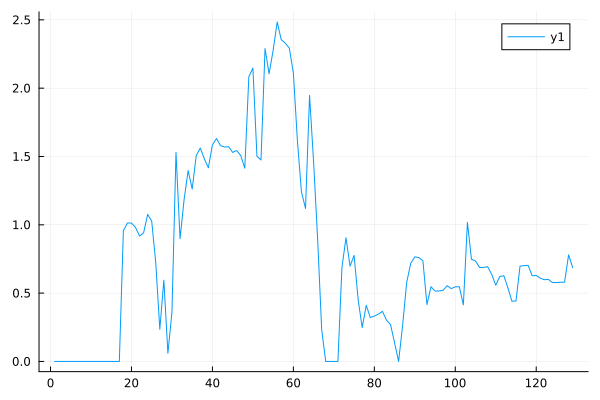

In [ ]:
plot()
# plot!(zz[:,1].^2)
# plot!(zz[:,2])
plot(zz[:,2]-zz[:,1].^2)

In [ ]:
zz[]

33×2 Matrix{Float64}:
 2.0           4.0
 1.0           1.0
 2.72317       9.65681
 0.280091      0.280091
 5.49848e-37   1.64954e-36
 3.66566e-37   7.33131e-37
 1.83283e-37   1.83283e-37
 0.0           0.0
 0.0           0.0
 0.0           0.0
 ⋮            
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 3.49355      13.5789
 0.832581      0.832581
 0.0           0.0
 3.1793       11.5368
 0.664483      0.664483

In [ ]:
run_example(6, 0.0,  10)

(0.01788010979669975, 0.6905101193822021, (4.984877601216623, 26.34305137259481))

In [ ]:
run_example(6, 0.0,  10)

(-0.03560297480591558, 1.6230018035812372, (5.03450023270998, 27.125211891866975))

In [ ]:
run_example(10, 0.1,  10)

(0.07683647134510535, 0.6896784878870977)

In [ ]:
run_example(10, 0.1,  10)

(0.022770900741377036, 2.656397327950044, (9.02234184325933, 83.72480153926217))

In [ ]:
run_dw_t(8, 0.9,  4)

129×2 Matrix{Float64}:
 4.0          16.0
 7.0          49.0
 8.0          64.0
 7.0          49.0
 6.0          36.0
 5.0          25.0
 4.0          16.0
 3.0           9.0
 2.0           4.0
 1.0           1.0
 ⋮            
 0.62744       0.980188
 1.48587       3.4806
 0.531957      0.863142
 0.220346      0.220346
 1.09432e-33   7.66027e-33
 9.37992e-34   5.62795e-33
 0.749312      1.39101
 0.19431       0.19431
 7.83248e-34   3.91624e-33

In [ ]:
p_list=0:0.1:1
seed_list=1:50
L_list=[6,8,10]
O_list=zeros(length(L_list),length(p_list),length(seed_list))
EE_list=zeros(length(L_list),length(p_list),length(seed_list))
last_p=0
last_L=8
last_seed=-1
for (L_idx,L) in enumerate(L_list)
    for (p_idx,p) in enumerate(p_list)
        println("Now computing $p,$L")
        for (seed_idx,seed) in enumerate(seed_list)
            O,EE=run_example(L,p,seed)
            O_list[L_idx,p_idx,seed_idx]=O
            EE_list[L_idx,p_idx,seed_idx]=EE
            last_p=p
            last_L=L
            last_seed=seed
        end
    end
end


Now computing 0.0,6
Now computing 0.1,6
Now computing 0.2,6
Now computing 0.3,6
Now computing 0.4,6
Now computing 0.5,6
Now computing 0.6,6
Now computing 0.7,6
Now computing 0.8,6
Now computing 0.9,6
Now computing 1.0,6
Now computing 0.0,8
Now computing 0.1,8
Now computing 0.2,8
Now computing 0.3,8
Now computing 0.4,8
Now computing 0.5,8
Now computing 0.6,8
Now computing 0.7,8
Now computing 0.8,8
Now computing 0.9,8
Now computing 1.0,8
Now computing 0.0,10
Now computing 0.1,10
Now computing 0.2,10
Now computing 0.3,10
Now computing 0.4,10
Now computing 0.5,10
Now computing 0.6,10
Now computing 0.7,10
Now computing 0.8,10
Now computing 0.9,10
Now computing 1.0,10


In [ ]:
mean(EE_list[1,:,:],dims=2)

11×1 Matrix{Float64}:
 1.582817627742337
 1.322628237751369
 1.0612242428666452
 0.8533484649647075
 0.5264988524212812
 0.257762808489318
 0.12347565276907335
 0.058277935428217666
 0.044250646316025294
 0.03835816975785012
 0.0

In [ ]:
mean(EE_list[2,:,:],dims=2)

11×1 Matrix{Float64}:
 2.2774902005600377
 1.8908904516446718
 1.4680376092157328
 1.104630267947677
 0.6385823448119663
 0.3657375229890944
 0.14347617272982136
 0.10926095612121484
 0.04420229970525431
 0.030695678325509786
 0.0

In [ ]:
size(O_list)

(3, 11, 50)

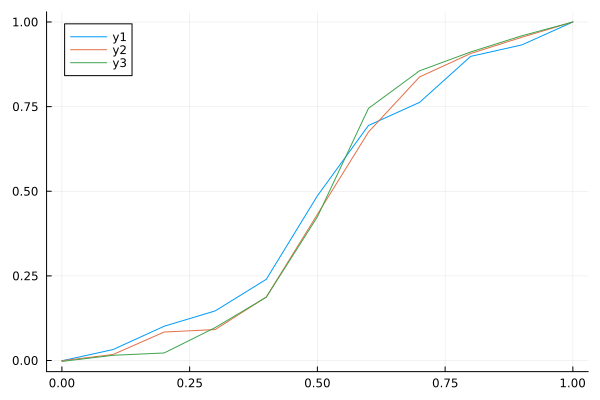

In [ ]:
plot()
plot!(p_list,mean(O_list[1,:,:],dims=2))
plot!(p_list,mean(O_list[2,:,:],dims=2))
plot!(p_list,mean(O_list[3,:,:],dims=2))

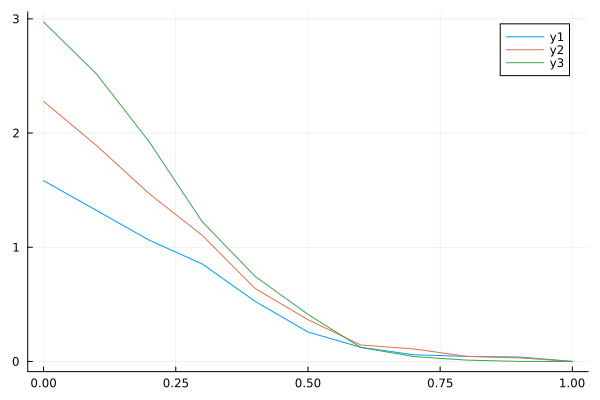

In [ ]:
plot()
plot!(p_list,mean(EE_list[1,:,:],dims=2))
plot!(p_list,mean(EE_list[2,:,:],dims=2))
plot!(p_list,mean(EE_list[3,:,:],dims=2))

In [ ]:
Dict{Integer, Any}()

Dict{Integer, Any}()

In [ ]:
2*6^2+1

73

In [ ]:
dw_list[8][end,:,:,1]

200×129 Matrix{Float64}:
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0   

In [ ]:
p_ctrl_list=[0.5]
p_proj_list=[0,0.25,0.5,0.75]
seed_list=1:1000
L_list=[8,]
dw_list=Dict{Int, Any}()
# EE_list=zeros(length(L_list),length(p_ctrl_list),length(seed_list))
for (L_idx,L) in enumerate(L_list)
    dw_list[L]=zeros(length(p_ctrl_list),length(p_proj_list),length(seed_list),(2*L^2+1),2)
    for (p_ctrl_idx,p_ctrl) in enumerate(p_ctrl_list)
        for (p_proj_idx,p_proj) in enumerate(p_proj_list)
            println("Now computing $(p_ctrl), $(p_proj) ,$L")
            flush(stdout)
            for (seed_idx,seed) in enumerate(seed_list)
                dw=run_dw_t(L,p_ctrl,p_proj,seed)
                dw_list[L][p_ctrl_idx,p_proj_idx,seed_idx,:,:]=dw
            end
        end
    end
end


Now computing 0.5, 0.0 ,8
Now computing 0.5, 0.25 ,8
Now computing 0.5, 0.5 ,8
Now computing 0.5, 0.75 ,8


In [ ]:
size(dw_list[8])

(1, 4, 1000, 129, 2)

In [ ]:
size(z_mean)

(1, 5, 1, 129, 2)

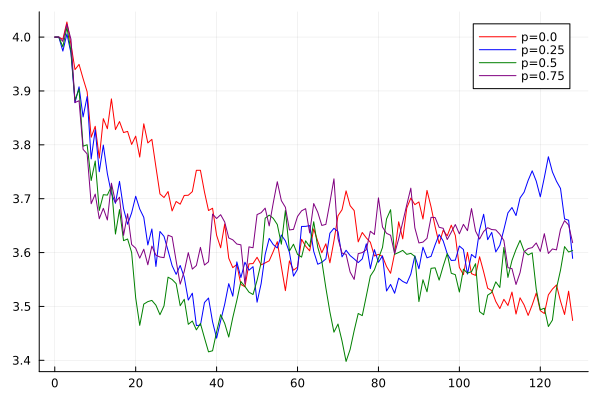

In [ ]:
L=8
z_mean=mean(dw_list[L],dims=3)
# z2_mean=mean(dw_list[L].^2,dims=2)

plt=plot()
colors = [:red, :blue, :green, :purple, :orange, :yellow, :pink, :brown, :black, :cyan, :magenta]

for i in 1:4
# for i in [3]
    # t=sqrt.(collect(range(0,size(z_mean)[end-1]-1)))./L
    t=(collect(range(0,size(z_mean)[end-1]-1)))
    # plot!(t,z_mean[i,1,:,1],label="p=$(p_list[i])",color=colors[i],)
    plot!(t,z_mean[1,i,1,:,1],label="p=$(p_proj_list[i])",color=colors[i],)
end
# xlims!(plt, 1, 12)
display(plt)

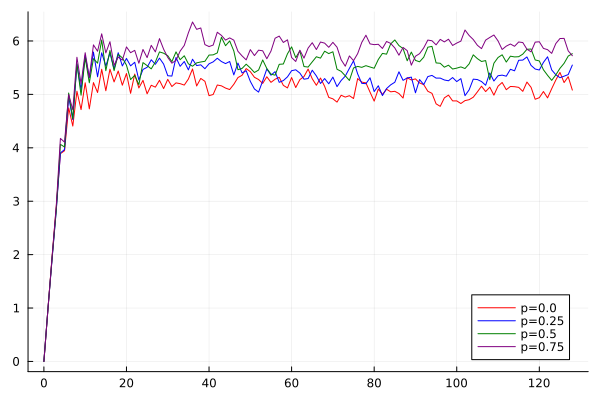

In [ ]:
L=8
z_mean=mean(dw_list[L],dims=3)
z2_mean=mean(dw_list[L].^2,dims=3)

plt=plot()
colors = [:red, :blue, :green, :purple, :orange, :yellow, :pink, :brown, :black, :cyan, :magenta]

var_map=zeros(size(z_mean)[2],2*L^2+1)
for i in 1:4
# for i in [1,]
    # t=sqrt.(collect(range(0,size(z_mean)[end-1]-1)))./L
    t=(collect(range(0,size(z_mean)[end-1]-1)))
    var_list=z2_mean[1,i,1,:,1]-z_mean[1,i,1,:,1].^2
    # @show size(var_list), size(t)
    plot!(t,var_list,label="p=$(p_proj_list[i])",color=colors[i],)
    var_map[i,:]=var_list
end
# xlims!(plt, 0,8)
display(plt)

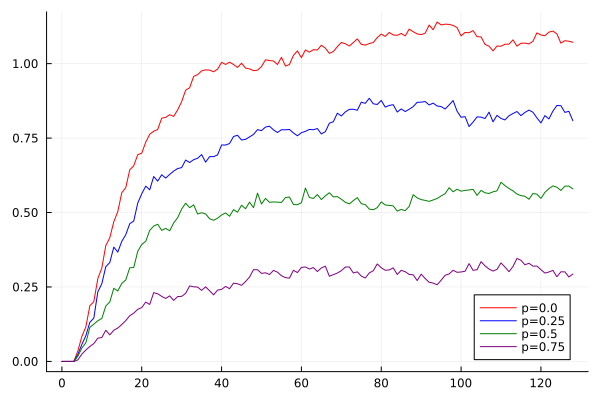

In [ ]:
L=8
z_mean=mean(dw_list[L],dims=3)
z2_mean=mean(dw_list[L].^2,dims=3)

plt=plot()
colors = [:red, :blue, :green, :purple, :orange, :yellow, :pink, :brown, :black, :cyan, :magenta]

var_map=zeros(size(z_mean)[2],2*L^2+1)
for i in 1:4
# for i in [1,]
    # t=sqrt.(collect(range(0,size(z_mean)[end-1]-1)))./L
    t=(collect(range(0,size(z_mean)[end-1]-1)))
    var_list=z_mean[1,i,1,:,2]-z2_mean[1,i,1,:,1]
    # @show size(var_list), size(t)
    plot!(t,var_list,label="p=$(p_proj_list[i])",color=colors[i],)
    var_map[i,:]=var_list
end
# xlims!(plt, 0,8)
display(plt)

In [ ]:
using Polynomials


In [ ]:
slope=zeros(5)
for i in 1:5
    p=fit(collect(0:4),var_map[i,1:5],1)
    slope[i]=p.coeffs[2]
end

In [ ]:
p_=0:0.01:1
dd=4*p_.*(1 .-p_)

101-element Vector{Float64}:
 0.0
 0.0396
 0.0784
 0.11639999999999999
 0.1536
 0.19
 0.22559999999999997
 0.2604
 0.2944
 0.3276
 ⋮
 0.2944
 0.2604
 0.22559999999999997
 0.19
 0.1536
 0.11639999999999999
 0.0784
 0.0396
 0.0

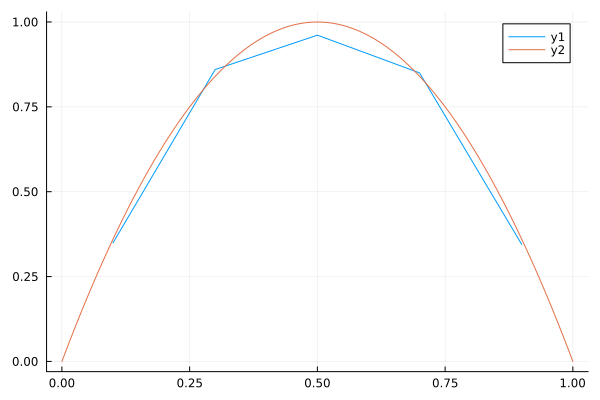

In [ ]:
pl2=plot()
plot!(p_list,slope)
plot!(p_,dd)
# display(pl2)

In [ ]:
p_list

0.1:0.2:0.9

In [ ]:
slope

3-element Vector{Float64}:
 0.34924840000000157
 0.8600658624878695
 0.9611729042110095

In [ ]:
plt=plot()
p_ctrl=range(0,1,11)
for i in 1:11
    plot!(zz[i,1,:,1],label="p=$(p_ctrl[i])")
end
display(plt)

In [ ]:
using Profile


In [ ]:
Profile.clear()
@profile run_example(8, 1,  10)
Profile.print()

In [ ]:
using BenchmarkTools

In [ ]:
@btime run_example(8, 1,  10)

In [ ]:
using ProgressMeter

In [ ]:
size(O_list)

In [ ]:
mean(O_list,dims=2)

In [ ]:
run_example(10,0.1,3)

In [ ]:
CT.Z(ct)

In [ ]:
for history in ct.op_history
    println(history)
end

In [ ]:
CT.Z(ct)

In [ ]:
CT.Z(ct)

In [ ]:
keyword, parameter
check folded?

In [ ]:
CT.inner_prob(ct,[0,],[4])

In [ ]:
expect(ct.mps,"ProjUp",sites=[3])

In [ ]:
rand(ct.rng)

In [ ]:
CT.R!(ct,[1],[1])

In [ ]:
CT.Z(ct)

In [ ]:
1 in [1,2,3]

In [ ]:
ct.xj in [Set([1 // 3, 2 // 3]),Set([0])]

In [ ]:
CT.Z(ct)

In [ ]:
CT.X!(ct,1)

In [ ]:
CT.Z(ct)

In [ ]:
CT.P!(ct,[1],[2])

In [ ]:
CT.Z(ct)

In [ ]:
CT.X!(ct,2)

In [ ]:
CT.Z(ct)

In [ ]:
norm(ct.mps)

In [ ]:
CT.P!(ct,[1],[2])

In [ ]:
CT.Z(ct)

In [ ]:
norm(ct.mps)

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site[ct.phy_ram])

In [ ]:
ct.mps

In [ ]:
CT.Z(ct)

In [ ]:
CT.von_Neumann_entropy(ct.mps,2)

In [ ]:
uniqueinds(ct.mps[2],ct.mps[3])

In [ ]:
svd(mps_ij)

In [ ]:
for i in 1:3
    CT.S(ct,i;rng=ct.rng_C)
end

In [ ]:
norm(CT.mps_to_tensor(ct.mps))

In [ ]:
ct.mps

In [ ]:
ct.mps[2]

In [ ]:
ct.mps

In [ ]:
ct.qubit_site

In [ ]:
inds(ct.mps)

In [ ]:
linkind(ct.mps,1)

In [ ]:
uniqueinds(ct.mps[1],ct.mps[2])

In [ ]:
ct.mps

In [ ]:
linkind(ct.mps,2)

In [ ]:
linkind(ct.mps,2)

In [ ]:
CT.von_Neumann_entropy(ct.mps,2)

In [ ]:
ψ′=MPS(insert!(copy(ITensors.data(ψ)), b, ψb))

In [ ]:
lb=(linkind(ψ,1))

In [ ]:
l′b=sim(linkind(ψ,1))

In [ ]:
δlb=δ(dag(lb), l′b)

In [ ]:
ψ′[1]

In [ ]:
ψ′[1]*δlb

In [ ]:
ψ′[2]*(δlb)

In [ ]:
ψ′[3]

In [ ]:
state()

In [ ]:
function insert(ψ::MPS, b::Integer, ψb::ITensor)
    dataψ′ = insert!(copy(ITensors.data(ψ)), b, ψb)
    # return dataψ′
    ψ′ = MPS(dataψ′)
    lb = linkind(ψ, b - 1)
    l′b = sim(lb)
    δlb = δ(dag(lb), l′b)
    ψ′[b - 1] *= δlb
    # ψ′[b] *= dag(δlb)
    ψ′[b] *= (δlb)
    return ψ′
  end
  
 

In [ ]:
N = 4
s = siteinds("S=1/2", N; )
ψ = randomMPS(s, n -> isodd(n) ? "↑" : "↓")

In [ ]:
expect(ψ, "Sz",)

In [ ]:
b = 2
sb = siteind("S=1/2"; )
ψb = onehot(sb => 1)

In [ ]:

ψ′ = insert(ψ, 2, ψb)


In [ ]:
expect(ψ', "Sz",)

In [ ]:
show norm(prod(ψ) * ψb - prod(ψ′))

In [ ]:
n=5
s1 = siteinds("Qubit", n)
# s2 = siteinds("Qubit", 1)
psi1= randomMPS(MersenneTwister(1),ComplexF64,s1[1:n-1];linkdims=2)
psi2= randomMPS(MersenneTwister(3),ComplexF64,s1[1:n-1];linkdims=2)
psi3=psi2- inner(psi1,psi2)*psi1
psi3=psi3/norm(psi3)

anc_0=  MPS(s1[n:n], ["0",])
anc_1=  MPS(s1[n:n], ["1",])

# psi1 = MPS(s1, ["0", "0", "0", "0"])
# psi2 = MPS(s1, ["1", "1", "1", "1"])

In [ ]:

CT.attach_mps(anc_0,psi1)

In [ ]:
psi1_new=CT.attach_mps(anc_0,psi1)

In [ ]:
psi2_new=CT.attach_mps(anc_1,psi3)

In [ ]:
psi2_new

In [ ]:
CT.mps_element(psi2_new,"10100")

In [ ]:
CT.mps_element(psi3,"0100")

In [ ]:
psi_sum=(psi1_new+psi2_new)/sqrt(2)

In [ ]:
inner(psi_sum',psi_sum)

In [ ]:
zz=MPS([1 0 ; 0 im],s1[1:2])

In [ ]:
inner(conj(zz),zz)

In [ ]:
inner(psi1,psi1)

In [ ]:
v0=prod(psi_sum[1:5])* state(siteind(psi_sum,5),"0")
v1=prod(psi_sum[1:5])* state(siteind(psi_sum,5),"1")

In [ ]:
print(conj(v0)*v1)

In [ ]:
inds(mps1[4])

In [ ]:
vcat(siteinds(psi1),siteinds(anc_0))

In [ ]:
orthogonalize!(psi1,n-1)
mps_=psi1[n-1]*anc_0[1]
U,S,V=svd(mps_,inds(psi1[n-1]),cutoff=1e-10,lefttags=replace(string(tags((findinds(inds(mps_),"Link")[1]))),r"l=[\d]+"=>"l=$(n-1)",'"'=>""))
psi_new=MPS(s1,)
for i in 1:n
    if i < n-1
        psi_new[i]=psi1[i]
    elseif i==n-1
        psi_new[i]=U
    elseif i==n
        psi_new[i]=S*V
    end
end

In [ ]:
push!(psi1,S*V)

In [ ]:
psi1[n]=S*V

In [ ]:
print(S*V)

In [ ]:
CT.mps_element(psi1,"0000")

In [ ]:
print(state(s1[1],"0"))

In [ ]:
print(array(S*V)[1,:,:])

In [ ]:
print(psi1[1])

In [ ]:
psi01=MPS(s1,"0")


In [ ]:
vcat(s1,s2)

In [ ]:
mps=MPS(vcat(s1,s2),"0")



In [ ]:
s1=siteinds("Qubit", 10)

In [ ]:
mps=randomMPS(s1,linkdims=10)

In [ ]:
truncate(mps,cutoff=1e-10)

In [ ]:
mps=MPS(vcat(s1,s2),"0")

for idx in 2:n
    if idx == 2
        arr=array(mps1[idx-1])

        mps[idx] = ITensor(reshape(arr,(1,size(arr)...)),inds(mps[idx]))
    else
        mps[idx]=ITensor( array(psi1[idx-1]) , inds(mps[idx]))
    end
end

In [ ]:
arr=array(psi1[1])

In [ ]:
(reshape(arr,(1,size(arr)...)))

In [ ]:
storage(psi01[2])

In [ ]:
ITensor(reshape(arr,(1,size(arr)...)),inds(psi01[2]))

In [ ]:
inds(psi01[2])

In [ ]:
pp=array(psi1[2-1])

In [ ]:
reshape(pp,(1,size(pp)...))

In [ ]:
ITensor(array(psi1[2-1]),inds(psi1[2]))

In [ ]:
(linkind(psi01,1))

In [ ]:
typeof(s[1])

In [ ]:
s1=siteinds("Qubit", 4)
mps1= randomMPS(s;linkdims=3)

s2=siteinds("Qubit", 1)
mps2 = MPS(s2, ["0"])   

In [ ]:
# mps = kron(mps2, mps1) ?

In [ ]:
N = 3

s = siteinds("Qubit", N; )

states = [n<=2 ? "Dn" : "Up" for n=1:N-1]

r = randomMPS(s[2:N], states; linkdims=2)
psi_temp = MPS(s,"0")

for i in 2:N
   psi_temp[i]=r[i-1] 
end

psi1 = psi_temp

In [ ]:
psi1

In [ ]:
i = Index(3,"index_i")
j = Index(2,"index_j")
k = Index(4,"index_k")

T = ITensor(i,j,k)

In [ ]:
T[i=>2,j=>1,k=>3]=1.

In [ ]:
psi01[2]

In [ ]:
print(psi01[1])

In [ ]:
print(psi1[1])

In [ ]:
Array(psi1[1],[site])

In [ ]:
ITensor([psi[1]])

In [ ]:
psi01[2]=ITensor([psi[1]])

In [ ]:
print(psi01[2])

In [ ]:
print(psi1[1])

In [ ]:
psi01

In [ ]:
CT.mps_to_tensor(psi01)

In [ ]:
psi1

In [ ]:
psi3

In [ ]:
inner(psi1, psi3)

In [ ]:
psi0=add(psi1,psi2;cutoff=1e-10)

In [ ]:
psi12=add(psi1,psi2;alg="directsum")

In [ ]:
Array(CT.mps_to_tensor(psi1),s1)

In [ ]:
Array(CT.mps_to_tensor(psi2),s1)

In [ ]:
Array(CT.mps_to_tensor(psi12),s1)

In [ ]:
add(ψ1,ψ1) 

In [ ]:
[ψ[n] * ψ[n + 1] for n in 1:2:(n - 1)]

In [ ]:
ψ2 = MPS([ψ[n] * ψ[n + 1] for n in 1:2:(n - 1)])


In [ ]:
ct=CT.CT_MPS(L=4,seed=1,x0=0//16,folded=false)

In [ ]:
ct.mps

In [ ]:
CT.S!(ct,4;rng=MersenneTwister(1))

In [ ]:
ct.mps

In [ ]:
inds(ct.mps[2])

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site)

In [ ]:
CT.Z(ct)

In [ ]:
M_new=orthogonalize(M,2)

In [ ]:
U2

In [ ]:
mps_ij=(M_new[2]*M_new[3]*M_new[4])*U2

In [ ]:
CT.apply_op!(M,U2)

In [ ]:
ITensor(CT.U(4),ct.qubit_site[2],ct.qubit_site[4],ct.qubit_site[2]',ct.qubit_site[4]')

In [ ]:
Array(CT.mps_to_tensor(M),idx)

In [ ]:
isapprox(Array(noprime!(T*U2),idx),Array(CT.mps_to_tensor(M),idx))

In [ ]:
CT.mps_element(ct.mps,"00001")

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site)[1,1,1,1,2]

In [ ]:
let i=4
    ct.phy_ram[[ct.phy_list[i],ct.phy_list[(i)%ct.L+1]]]
    
end

In [ ]:
CT.U(4,rng=ct.rng_C)

In [ ]:
zz=CT.U(4)

In [ ]:
reshape(zz,2,2,2,2)

In [ ]:
CT.Z(ct)

In [ ]:
CT.ZZ(ct)

In [ ]:
CT.von_Neumann_entropy(ct.mps,div(ct.L,2))

In [ ]:
expect(ct.mps,"Sz")[ct.phy_ram]

In [ ]:
Q

In [ ]:
function U(n;rng::Random.AbstractRNG=MersenneTwister(nothing))
    z=randn(rng,4,4)+randn(rng,4,4)*im
    Q,R=qr(z)
    r_diag=diag(R)
    Lambda=Diagonal(r_diag./abs.(r_diag))
    Q*=Lambda
    return Q
end

In [ ]:
U_map=zeros(Complex,100,4,4)
for i in 1:100
    U_map[i,:,:]=U(4)
end

In [ ]:
qq=U(4)

In [ ]:
(qq[:,1])' * qq[:,1]

In [ ]:
(U_map[1,:,1])' * U_map[1,:,2]

In [ ]:
sum(abs.(U_map).^2,dims=[1,2])

In [ ]:
ct.mps

In [ ]:
using Random

In [ ]:
randn(4,4)+randn(4,4)*im

In [ ]:
Q

4×4 Matrix{ComplexF64}:
  0.241388-0.445579im  -0.378112+0.254543im   …   0.198841+0.0531314im
   0.61911+0.232944im   0.514138+0.10812im       -0.160158+0.33377im
 0.0630687+0.147585im   0.472232-0.0991936im      0.566715-0.555979im
  0.238078+0.472432im  -0.529014-0.0592682im      0.419537-0.11957im

In [ ]:
using LinearAlgebra

In [ ]:
Lambda

4-element Vector{ComplexF64}:
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im

In [ ]:
Diagonal(Lambda)

4×4 Diagonal{ComplexF64, Vector{ComplexF64}}:
 -1.0+0.0im      ⋅           ⋅          ⋅    
      ⋅      1.0+0.0im       ⋅          ⋅    
      ⋅          ⋅      -1.0+0.0im      ⋅    
      ⋅          ⋅           ⋅      1.0+0.0im

In [ ]:
Q

4-element Vector{ComplexF64}:
   0.279558410221431 - 0.3205567810049119im
 -0.7417840765323529 + 0.5731761757664646im
  1.1107684390167805 - 0.460624395867162im
  0.7860659376728949 - 0.9361810098531589im

In [ ]:
diagm([1,3,])

LoadError: UndefVarError: `diagm` not defined

In [ ]:
isapprox(Q*R,z)

true

In [ ]:
Matrix(
Q
)

4×4 Matrix{ComplexF64}:
  -0.649365+0.597974im  0.00396232+0.0927084im  …   0.170378-0.186357im
   0.195642+0.225327im   -0.152302+0.285702im       0.122146+0.822459im
  -0.171775+0.291146im   -0.146135-0.232503im       0.414225+0.219354im
 -0.0668647+0.113845im    0.891284+0.129489im      -0.114906+0.109461im

In [ ]:
diag(R)

4-element Vector{ComplexF64}:
  3.568613493742204 + 0.0im
  2.303632184469375 + 0.0im
  -2.64876097164952 + 0.0im
 -1.532561276392839 + 0.0im

In [ ]:
expect(ct.mps,[1 0;0 -1])

4-element Vector{Float64}:
 -1.0
  1.0
 -1.0
  1.0

In [ ]:
os = OpSum()
for j=1:ct.L-1
os += "Sz",j,"Sz",j+1
end
os += "Sz",ct.L,"Sz",1

sum(
  1.0 Sz(1,) Sz(2,)
  1.0 Sz(2,) Sz(3,)
  1.0 Sz(3,) Sz(4,)
  1.0 Sz(4,) Sz(5,)
  1.0 Sz(5,) Sz(6,)
  1.0 Sz(6,) Sz(7,)
  1.0 Sz(7,) Sz(8,)
  1.0 Sz(8,) Sz(1,)
)

In [ ]:
ct.phy_list[1:end-1]

7-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7

In [ ]:
zz=MPO(os,ct.qubit_site)

MPO
[1] ((dim=3|id=585|"Link,l=1"), (dim=2|id=75|"Qubit,Site,n=1")', (dim=2|id=75|"Qubit,Site,n=1"))
[2] ((dim=3|id=585|"Link,l=1"), (dim=4|id=23|"Link,l=2"), (dim=2|id=960|"Qubit,Site,n=2")', (dim=2|id=960|"Qubit,Site,n=2"))
[3] ((dim=4|id=23|"Link,l=2"), (dim=4|id=962|"Link,l=3"), (dim=2|id=82|"Qubit,Site,n=3")', (dim=2|id=82|"Qubit,Site,n=3"))
[4] ((dim=4|id=962|"Link,l=3"), (dim=4|id=136|"Link,l=4"), (dim=2|id=937|"Qubit,Site,n=4")', (dim=2|id=937|"Qubit,Site,n=4"))
[5] ((dim=4|id=136|"Link,l=4"), (dim=4|id=349|"Link,l=5"), (dim=2|id=526|"Qubit,Site,n=5")', (dim=2|id=526|"Qubit,Site,n=5"))
[6] ((dim=4|id=349|"Link,l=5"), (dim=4|id=868|"Link,l=6"), (dim=2|id=75|"Qubit,Site,n=6")', (dim=2|id=75|"Qubit,Site,n=6"))
[7] ((dim=4|id=868|"Link,l=6"), (dim=3|id=824|"Link,l=7"), (dim=2|id=791|"Qubit,Site,n=7")', (dim=2|id=791|"Qubit,Site,n=7"))
[8] ((dim=3|id=824|"Link,l=7"), (dim=2|id=244|"Qubit,Site,n=8")', (dim=2|id=244|"Qubit,Site,n=8"))


In [ ]:
-inner(ct.mps',zz,ct.mps)*4/ct.L

0.9999999999999998

In [ ]:
ct.xj in [Set([1//3,2//3])]

true

In [ ]:
using ITensors

In [ ]:
rng = MersenneTwister(nothing)

MersenneTwister(0xe9fd1d667ccf06752598584e16024d68)

In [ ]:
zz=randomITensor(rng,siteinds(2,2))

ITensor ord=2 (dim=2|id=262|"Site,n=1") (dim=2|id=253|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
T=

In [ ]:
print(zz)

ITensor ord=2
Dim 1: (dim=2|id=262|"Site,n=1")
Dim 2: (dim=2|id=253|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -0.4529424277094967  1.9115524850366077
  0.5052402424188795  0.1857076924423848

In [ ]:
ct.L

4

In [ ]:
typeof(1//2)

Rational{Int64}

In [ ]:
Set([1,2])

Set{Int64} with 2 elements:
  2
  1

In [ ]:
function initialize(N::Int, d::Int)
    sites = siteinds(d,N)
    psi = randomMPS(sites, d)
    return psi
end

In [ ]:
print(sqrt.(T*conj(T)))

ITensor ord=0
NDTensors.Dense{Float64, Vector{Float64}}
 0-dimensional
4.226020188649009

In [ ]:
N = 4  # number of sites
d = 2   # local degree of freedom for each site
idx = siteinds(d,N)
# T=randomITensor(MersenneTwister(1),ComplexF64,idx)
# T/=sqrt.(T*conj(T))
T = emptyITensor(idx)
# T[1,1,1,1,1]=1
# T[fill(1,N)...]=1
T[fill(1, N)...]=1/sqrt(2)
T[fill(2, N)...]=1/sqrt(2)
M=MPS(T,idx;cutoff=1e-10,maxdim=20)

MPS
[1] ((dim=2|id=733|"Site,n=1"), (dim=2|id=130|"Link,n=1"))
[2] ((dim=2|id=130|"Link,n=1"), (dim=2|id=411|"Site,n=2"), (dim=2|id=584|"Link,n=2"))
[3] ((dim=2|id=584|"Link,n=2"), (dim=2|id=509|"Site,n=3"), (dim=2|id=217|"Link,n=3"))
[4] ((dim=2|id=217|"Link,n=3"), (dim=2|id=312|"Site,n=4"))


In [ ]:
print(M[1])

ITensor ord=2
Dim 1: (dim=2|id=733|"Site,n=1")
Dim 2: (dim=2|id=130|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -1.0  -0.0
 -0.0   1.0

In [ ]:
print(M[2])

ITensor ord=3
Dim 1: (dim=2|id=130|"Link,n=1")
Dim 2: (dim=2|id=411|"Site,n=2")
Dim 3: (dim=2|id=584|"Link,n=2")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  1.0

In [ ]:
proj_0 = ITensor([1 0;0 0],idx[1],idx[1]')

ITensor ord=2 (dim=2|id=733|"Site,n=1") (dim=2|id=733|"Site,n=1")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
CT.apply_op!(M,proj_0)

[1]


In [ ]:
print(M[1])

ITensor ord=2
Dim 1: (dim=2|id=835|"Link,n=1")
Dim 2: (dim=2|id=733|"Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 0.7071067811865475  0.0
 0.0                 0.0

In [ ]:
print(M[2])

ITensor ord=3
Dim 1: (dim=2|id=411|"Site,n=2")
Dim 2: (dim=2|id=506|"Link,n=2")
Dim 3: (dim=2|id=835|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  1.0

In [ ]:
truncate!(M,cutoff=1e-10)

MPS
[1] ((dim=2|id=733|"Site,n=1"), (dim=1|id=653|"Link,n=1"))
[2] ((dim=2|id=411|"Site,n=2"), (dim=1|id=720|"Link,n=2"), (dim=1|id=653|"Link,n=1"))
[3] ((dim=2|id=509|"Site,n=3"), (dim=1|id=246|"Link,n=3"), (dim=1|id=720|"Link,n=2"))
[4] ((dim=2|id=312|"Site,n=4"), (dim=1|id=246|"Link,n=3"))


In [ ]:
print(M[1])

ITensor ord=2
Dim 1: (dim=2|id=733|"Site,n=1")
Dim 2: (dim=1|id=653|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×1
 0.7071067811865475
 0.0

In [ ]:
# U2=ITensor(reshape(collect(1:16.),(2,2,2,2)),idx[2],idx[4],idx[2]',idx[4]')
# U2=randomITensor(MersenneTwister(1),ComplexF64,idx[3],idx[4],idx[3]',idx[4]')
U2=ITensor(reshape(CT.U(4,rng=MersenneTwister(1)),2,2,2,2),idx[6],idx[1],idx[6]',idx[1]')
# U2_array=reshape(CT.U(4,rng=MersenneTwister(1)),2,2,2,2)
# idx[4],idx[1],idx[4]',idx[1]'

ITensor ord=4 (dim=2|id=662|"Site,n=6") (dim=2|id=336|"Site,n=1") (dim=2|id=662|"Site,n=6")' (dim=2|id=336|"Site,n=1")'
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [ ]:
Array(noprime!(U2*T),idx)

2×2×2×2×2×2 Array{ComplexF64, 6}:
[:, :, 1, 1, 1, 1] =
 0.135578-0.316341im  0.0+0.0im
 0.267593-0.193374im  0.0+0.0im

[:, :, 2, 1, 1, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 2, 1, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 2, 1, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 1, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 1, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 2, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 2, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 1, 1, 2] =
 -0.187246-0.641857im  0.0+0.0im
  0.224307+0.524588im  0.0+0.0im

[:, :, 2, 1, 1, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 2, 1, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 2, 1, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 1, 2, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 1, 2, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im



In [ ]:
ITensors.op(::OpName"U2",::SiteType"Qubit")=U_array

In [ ]:
os=OpSum()
os+="U2",2,3

sum(
  1.0 U2(2, 3)
)

In [ ]:
MPO(os,idx)

In [ ]:
_,SS=svd(reshape(Array(noprime!(T*U2),idx),4,4))

LinearAlgebra.SVD{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
U factor:
4×4 Matrix{ComplexF64}:
 0.104526+0.212572im   0.757525-0.608312im   …   3.85223e-17+9.0885e-17im
      0.0+0.0im             0.0+0.0im               0.179291-0.983796im
 0.181988+0.954341im  -0.217436+0.0939914im     -4.50434e-17-2.35156e-17im
      0.0+0.0im             0.0+0.0im                    0.0+0.0im
singular values:
4-element Vector{Float64}:
 0.8983322669889429
 0.43931667176025396
 0.0
 0.0
Vt factor:
4×4 Matrix{ComplexF64}:
 -0.778889+0.0im  0.588114-0.217839im  -0.0+0.0im  -0.0+0.0im
  0.627162+0.0im  0.730394-0.27054im   -0.0+0.0im  -0.0+0.0im
       0.0+0.0im       0.0+0.0im        0.0+0.0im   1.0+0.0im
       0.0+0.0im       0.0+0.0im        1.0+0.0im   0.0+0.0im

In [ ]:
SS

4-element Vector{Float64}:
 0.8983322669889429
 0.43931667176025396
 0.0
 0.0

In [ ]:
T=emptyITensor(idx,)
# T[1,1]=1/sqrt(2)
# T[2,2]=1im/sqrt(2)
# T=ITensor([1 0; 0 im]/sqrt(2),idx)

ITensor ord=4 (dim=2|id=733|"Site,n=1") (dim=2|id=411|"Site,n=2") (dim=2|id=509|"Site,n=3") (dim=2|id=312|"Site,n=4")
NDTensors.EmptyStorage{NDTensors.EmptyNumber, NDTensors.Dense{NDTensors.EmptyNumber, Vector{NDTensors.EmptyNumber}}}

In [ ]:
T[[1,2]...,[1,2]...]=1

1

In [ ]:
mm=MPS(T,idx)

MPS
[1] ((dim=2|id=626|"Site,n=1"), (dim=2|id=978|"Link,n=1"))
[2] ((dim=2|id=978|"Link,n=1"), (dim=2|id=871|"Site,n=2"))


In [ ]:
print(mm[2])

ITensor ord=2
Dim 1: (dim=2|id=978|"Link,n=1")
Dim 2: (dim=2|id=871|"Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.7071067811865475 + 0.0im                  0.0 + 0.0im
                0.0 + 0.0im  -0.7071067811865475 + 0.0im0.7071067811865475 + 0.0im                  0.0 + 0.0im
                0.0 + 0.0im  -0.7071067811865475 + 0.0im

In [ ]:
print(mm[1])

ITensor ord=2
Dim 1: (dim=2|id=626|"Site,n=1")
Dim 2: (dim=2|id=978|"Link,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 1.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  0.0 - 1.0im

In [ ]:
CT.von_Neumann_entropy(mm,1)

ITensor ord=2
Dim 1: (dim=2|id=108|"Link,u")
Dim 2: (dim=2|id=796|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}
 2×2
 0.7071067811865475  0.0
 0.0                 0.7071067811865475

0.6931471805599454

In [ ]:
T[1,1,2,2]

-1.7542505415619625

In [ ]:
U=reshape(collect(1:4.),(2,2))

2×2 Matrix{Float64}:
 1.0  3.0
 2.0  4.0

In [ ]:
U=ITensor([1 2; 3 4],idx[1]',idx[1])

ITensor ord=2 (dim=2|id=159|"Site,n=1")' (dim=2|id=159|"Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
U_mps=MPS(U,[idx[1],idx'[1]];cutoff=1e-8,maxdim=10)

MPS
[1] ((dim=2|id=984|"Site,n=1"), (dim=2|id=56|"Link,n=1"))
[2] ((dim=2|id=56|"Link,n=1"), (dim=2|id=984|"Site,n=1")')


In [ ]:
U_mps

MPS
[1] ((dim=2|id=984|"Site,n=1"), (dim=2|id=56|"Link,n=1"))
[2] ((dim=2|id=56|"Link,n=1"), (dim=2|id=984|"Site,n=1")')


In [ ]:
print(U)

ITensor ord=2
Dim 1: (dim=2|id=984|"Site,n=1")
Dim 2: (dim=2|id=984|"Site,n=1")'
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 1.0  2.0
 3.0  4.0

In [ ]:
M

MPS
[1] ((dim=2|id=159|"Site,n=1"), (dim=1|id=756|"Link,n=1"))
[2] ((dim=1|id=756|"Link,n=1"), (dim=2|id=820|"Site,n=2"), (dim=1|id=859|"Link,n=2"))
[3] ((dim=1|id=859|"Link,n=2"), (dim=2|id=944|"Site,n=3"), (dim=1|id=788|"Link,n=3"))
[4] ((dim=1|id=788|"Link,n=3"), (dim=2|id=560|"Site,n=4"))


In [ ]:
M_=U*M[1]
# noprime

ITensor ord=2 (dim=2|id=159|"Site,n=1")' (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(M_)

ITensor ord=2
Dim 1: (dim=2|id=159|"Site,n=1")'
Dim 2: (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×1
 -1.0
 -3.0

In [ ]:
noprime!(M_)

ITensor ord=2 (dim=2|id=159|"Site,n=1") (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M[1]=M_

ITensor ord=2 (dim=2|id=159|"Site,n=1") (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(M)

MPS
[1] ((dim=2|id=159|"Site,n=1"), (dim=1|id=756|"Link,n=1"))
[2] ((dim=1|id=756|"Link,n=1"), (dim=2|id=820|"Site,n=2"), (dim=1|id=859|"Link,n=2"))
[3] ((dim=1|id=859|"Link,n=2"), (dim=2|id=944|"Site,n=3"), (dim=1|id=788|"Link,n=3"))
[4] ((dim=1|id=788|"Link,n=3"), (dim=2|id=560|"Site,n=4"))


In [ ]:
function tensor_to_vector(T; column_first=true)
    T=array(T)
    if column_first
        return vec(T)
    else
        return vec(permutedims(T, reverse(1:ndims(T))))
    end
end

tensor_to_vector (generic function with 1 method)

In [ ]:
T * C

ITensor ord=1 (dim=16|id=560|"CMB,Link")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M_vec=mps_to_tensor(M;vector=true,)

16-element Vector{Float64}:
  2.626454673344112
  0.6318633586241813
 -0.9146966779403515
 -0.6494897789717653
 -0.7905550510036554
 -0.2607660031611783
 -0.5696859455477894
 -0.7951319617634217
  1.2206202922741127
  0.13144861731863627
  0.6343338110762631
  0.7816893931786344
 -1.7542505415619636
 -0.8835602177260125
 -1.2210472457017596
 -1.5075951948789563

In [ ]:
print(M_tensor)

ITensor ord=4
Dim 1: (dim=2|id=159|"Site,n=1")
Dim 2: (dim=2|id=820|"Site,n=2")
Dim 3: (dim=2|id=944|"Site,n=3")
Dim 4: (dim=2|id=560|"Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  0.0
 3.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
M_tensor

ITensor ord=4 (dim=2|id=159|"Site,n=1") (dim=2|id=820|"Site,n=2") (dim=2|id=944|"Site,n=3") (dim=2|id=560|"Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
vec(array(M_tensor,idx))

16-element Vector{Float64}:
 1.0
 3.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
array(U)

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

In [ ]:
array(M_tensor)

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  0.0
 3.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
(M_tensor)

In [ ]:
M_tensor[1,1,1,1]^2+M_tensor[2,1,1,1]^2

1.0000000000000002

In [ ]:
print(M_tensor)

ITensor ord=4
Dim 1: (dim=2|id=433|"Link,n=1")
Dim 2: (dim=2|id=471|"Site,n=2")
Dim 3: (dim=2|id=136|"Site,n=3")
Dim 4: (dim=2|id=908|"Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
  0.5760484367663208  0.0
 -0.8174155604703633  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
U2=ITensor(reshape(collect(1:16.),(2,2,2,2)),idx[2],idx[3],idx[2]',idx[3]')

ITensor ord=4 (dim=2|id=457|"Site,n=2") (dim=2|id=506|"Site,n=3") (dim=2|id=457|"Site,n=2")' (dim=2|id=506|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
I2=ITensor(reshape(fill(1,16),(2,2,2,2)),idx[3],idx[4],idx[3]',idx[4]')

ITensor ord=4 (dim=2|id=59|"Site,n=3") (dim=2|id=629|"Site,n=4") (dim=2|id=59|"Site,n=3")' (dim=2|id=629|"Site,n=4")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
U2*I2

ITensor ord=8 (dim=2|id=461|"Site,n=1") (dim=2|id=117|"Site,n=2") (dim=2|id=461|"Site,n=1")' (dim=2|id=117|"Site,n=2")' (dim=2|id=59|"Site,n=3") (dim=2|id=629|"Site,n=4") (dim=2|id=59|"Site,n=3")' (dim=2|id=629|"Site,n=4")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(U2)

ITensor ord=4
Dim 1: (dim=2|id=461|"Site,n=1")
Dim 2: (dim=2|id=117|"Site,n=2")
Dim 3: (dim=2|id=461|"Site,n=1")'
Dim 4: (dim=2|id=117|"Site,n=2")'
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  3.0
 2.0  4.0

[:, :, 2, 1] =
 5.0  7.0
 6.0  8.0

[:, :, 1, 2] =
  9.0  11.0
 10.0  12.0

[:, :, 2, 2] =
 13.0  15.0
 14.0  16.0Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  3.0
 2.0  4.0

[:, :, 2, 1] =
 5.0  7.0
 6.0  8.0

[:, :, 1, 2] =
  9.0  11.0
 10.0  12.0

[:, :, 2, 2] =
 13.0  15.0
 14.0  16.0

In [ ]:
C= combiner(idx[1],idx[2],idx[3],idx[4])

ITensor ord=5 (dim=16|id=560|"CMB,Link") (dim=2|id=461|"Site,n=1") (dim=2|id=117|"Site,n=2") (dim=2|id=59|"Site,n=3") (dim=2|id=629|"Site,n=4")
NDTensors.Combiner

In [ ]:
C'

ITensor ord=5 (dim=16|id=560|"CMB,Link")' (dim=2|id=461|"Site,n=1")' (dim=2|id=117|"Site,n=2")' (dim=2|id=59|"Site,n=3")' (dim=2|id=629|"Site,n=4")'
NDTensors.Combiner

In [ ]:
UT=C*(U2*I2)*C'

ITensor ord=2 (dim=16|id=560|"CMB,Link") (dim=16|id=560|"CMB,Link")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
array(UT)

In [ ]:
vv=T * C * UT 

ITensor ord=1 (dim=16|id=560|"CMB,Link")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
array(vv)

16-element Vector{Float64}:
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026

In [ ]:
print(UT)

ITensor ord=2
Dim 1: (dim=4|id=689|"CMB,Link")
Dim 2: (dim=4|id=689|"CMB,Link")'
NDTensors.Dense{Float64, Vector{Float64}}
 4×4
 1.0  5.0   9.0  13.0
 2.0  6.0  10.0  14.0
 3.0  7.0  11.0  15.0
 4.0  8.0  12.0  16.0

In [ ]:
typeof(U2)

ITensor

In [ ]:
orthogonalize!(M,2)

MPS
[1] ((dim=2|id=944|"Site,n=1"), (dim=2|id=546|"Link,n=1"))
[2] ((dim=2|id=546|"Link,n=1"), (dim=2|id=457|"Site,n=2"), (dim=4|id=729|"Link,n=2"))
[3] ((dim=2|id=506|"Site,n=3"), (dim=2|id=767|"Link,n=3"), (dim=4|id=729|"Link,n=2"))
[4] ((dim=2|id=108|"Site,n=4"), (dim=2|id=767|"Link,n=3"))


In [ ]:
using ITensors

In [ ]:
U2

ITensor ord=4 (dim=2|id=301|"Site,n=2") (dim=2|id=18|"Site,n=3") (dim=2|id=301|"Site,n=2")' (dim=2|id=18|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M[1]

ITensor ord=2 (dim=2|id=247|"Site,n=1") (dim=2|id=831|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M

MPS
[1] ((dim=2|id=944|"Site,n=1"), (dim=2|id=546|"Link,n=1"))
[2] ((dim=2|id=546|"Link,n=1"), (dim=2|id=457|"Site,n=2"), (dim=4|id=729|"Link,n=2"))
[3] ((dim=2|id=506|"Site,n=3"), (dim=2|id=767|"Link,n=3"), (dim=4|id=729|"Link,n=2"))
[4] ((dim=2|id=108|"Site,n=4"), (dim=2|id=767|"Link,n=3"))


In [ ]:
M[2]*M[3]

ITensor ord=4 (dim=2|id=546|"Link,n=1") (dim=2|id=457|"Site,n=2") (dim=2|id=506|"Site,n=3") (dim=2|id=767|"Link,n=3")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
U2

ITensor ord=4 (dim=2|id=457|"Site,n=2") (dim=2|id=506|"Site,n=3") (dim=2|id=457|"Site,n=2")' (dim=2|id=506|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M12=(M[2]*M[3])*U2

ITensor ord=4 (dim=2|id=546|"Link,n=1") (dim=2|id=767|"Link,n=3") (dim=2|id=457|"Site,n=2")' (dim=2|id=506|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
noprime!(M12)

ITensor ord=3 (dim=4|id=982|"Link,n=2") (dim=2|id=461|"Site,n=1") (dim=2|id=117|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
uniqueinds(M[1],M[2])

1-element Vector{Index{Int64}}:
 (dim=2|id=944|"Site,n=1")

In [ ]:
inds1=uniqueinds(M[1],M[2])

1-element Vector{Index{Int64}}:
 (dim=2|id=461|"Site,n=1")

In [ ]:
U,S,V=svd(M12,inds1,cutoff=1e-8)

ITensors.TruncSVD(ITensor ord=2
Dim 1: (dim=2|id=461|"Site,n=1")
Dim 2: (dim=2|id=209|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -0.5574424161643299  -0.8302156061294405
 -0.8302156061294403   0.5574424161643298, ITensor ord=2
Dim 1: (dim=2|id=209|"Link,u")
Dim 2: (dim=2|id=349|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}
 2×2
 126.0238246062552   0.0
   0.0              11.70240173378359, ITensor ord=3
Dim 1: (dim=4|id=982|"Link,n=2")
Dim 2: (dim=2|id=117|"Site,n=2")
Dim 3: (dim=2|id=349|"Link,v")
NDTensors.Dense{Float64, Vector{Float64}}
 4×2×2
[:, :, 1] =
 -0.30221113453970927   -0.8585431864099768
  0.1733708247491792     0.3750806976664458
 -0.009750924109032895  -0.027078095373318144
 -3.79905627430529e-5    0.0008656672327050867

[:, :, 2] =
  0.9159220523533731     -0.2617678897409614
 -0.19703423314645505     0.22996199645634108
  0.027810289760299423   -0.008869306991845426
 -0.0026073140144209565  -0.0006943760608791726, Spectrum{Vector{Float64}, Float64

In [ ]:
U

ITensor ord=3 (dim=1|id=626|"Link,n=1") (dim=2|id=451|"Site,n=2") (dim=2|id=246|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
S*V

ITensor ord=3 (dim=2|id=246|"Link,u") (dim=1|id=840|"Link,n=3") (dim=2|id=375|"Site,n=3")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M[1]=U
M[2]=S*V

ITensor ord=3 (dim=2|id=209|"Link,u") (dim=4|id=982|"Link,n=2") (dim=2|id=117|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(U2)

ITensor ord=4
Dim 1: (dim=2|id=461|"Site,n=1")
Dim 2: (dim=2|id=117|"Site,n=2")
Dim 3: (dim=2|id=461|"Site,n=1")'
Dim 4: (dim=2|id=117|"Site,n=2")'
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  3.0
 2.0  4.0

[:, :, 2, 1] =
 5.0  7.0
 6.0  8.0

[:, :, 1, 2] =
  9.0  11.0
 10.0  12.0

[:, :, 2, 2] =
 13.0  15.0
 14.0  16.0

In [ ]:
U2[1,1,1,1]

1.0

In [ ]:
vec(permutedims(array(mps_to_tensor(M)),reverse(1:4)))

In [ ]:
mps_to_tensor(M;vector=true,)

16-element Vector{Float64}:
  -1.4518677591156464
   5.324658541109053
  12.101184841333753
  18.877711141558454
  -6.2016727410230645
 -15.866228586927242
 -25.530784432831414
 -35.1953402787356
   6.513276532854706
  17.58564498824528
  28.658013443635873
  39.73038189902645
 -13.214893493635087
 -34.68070629310985
 -56.14651909258461
 -77.61233189205937

In [ ]:
methods(vector)

# 4 methods for generic function "vector" from NDTensors:
 [1] vector(T::ITensor)
     @ ITensors ~/.julia/packages/ITensors/UHeB1/src/tensor_operations/permutations.jl:218
 [2] vector(T::ITensor, inds...)
     @ ITensors ~/.julia/packages/ITensors/UHeB1/src/tensor_operations/permutations.jl:244
 [3] vector(T::NDTensors.DiagBlockSparseTensor{<:Number, 1})
     @ ~/.julia/packages/NDTensors/YyzwN/src/blocksparse/diagblocksparse.jl:368
 [4] vector(T::NDTensors.Tensor{<:Number, 1})
     @ ~/.julia/packages/NDTensors/YyzwN/src/tensor/tensor.jl:278

In [ ]:
"""
Returns x if x>0 else returns 0
"""
function test3(x)
    if x>0
        return x
    else
        return 0
    end
end

test3

In [ ]:
@code_warntype test3(2.0)

MethodInstance for test3(::Float64)
  from test3(x) @ Main In[624]:4
Arguments
  #self#::Core.Const(test3)
  x::Float64
Body::Union{Float64, Int64}
1 ─ %1 = (x > 0)::Bool
└──      goto #3 if not %1
2 ─      return x
3 ─      return 0



In [ ]:
@code_warntype test3(2)

MethodInstance for test3(::Int64)
  from test3(x) @ Main In[624]:4
Arguments
  #self#::Core.Const(test3)
  x::Int64
Body::Int64
1 ─ %1 = (x > 0)::Bool
└──      goto #3 if not %1
2 ─      return x
3 ─      return 0



In [ ]:
function test5()
    r=0.
    for i in 1:10
        r+=sin(i)
    end
    return r
end

test5 (generic function with 1 method)

In [ ]:
@code_warntype test5()

MethodInstance for test5()
  from test5() @ Main In[640]:1
Arguments
  #self#::Core.Const(test5)
Locals
  @_2::Union{Nothing, Tuple{Int64, Int64}}
  r::Float64
  i::Int64
Body::Float64
1 ─       (r = 0.0)
│   %2  = (1:10)::Core.Const(1:10)
│         (@_2 = Base.iterate(%2))
│   %4  = (@_2::Core.Const((1, 1)) === nothing)::Core.Const(false)
│   %5  = Base.not_int(%4)::Core.Const(true)
└──       goto #4 if not %5
2 ┄ %7  = @_2::Tuple{Int64, Int64}
│         (i = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Int64
│   %10 = r::Float64
│   %11 = Main.sin(i)::Float64
│         (r = %10 + %11)
│         (@_2 = Base.iterate(%2, %9))
│   %14 = (@_2 === nothing)::Bool
│   %15 = Base.not_int(%14)::Bool
└──       goto #4 if not %15
3 ─       goto #2
4 ┄       return r



In [ ]:
i=Index(2)
j=Index(2)
# T=ITensor()

In [ ]:
T=Itensor(i,j)

In [ ]:
U,S,V=svd(T,(i,j))